In [1]:
from mcbj import *

date = "21_05_21"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
import numpy as np

In [25]:
cmap_geo32 = ListedColormap(np.array([[255 / 255, 255 / 255, 255 / 255, 1],
                                       [255 / 255, 235 / 255, 235 / 255, 1],
                                       [255 / 255, 215 / 255, 215 / 255, 1],
                                       [255 / 255, 196 / 255, 196 / 255, 1],
                                       [245 / 255, 179 / 255, 174 / 255, 1],
                                       [255 / 255, 158 / 255, 158 / 255, 1],
                                       [255 / 255, 124 / 255, 124 / 255, 1],
                                       [255 / 255, 90 / 255, 90 / 255, 1],
                                       [238 / 255, 80 / 255, 78 / 255, 1],
                                       [244 / 255, 117 / 255, 75 / 255, 1],
                                       [255 / 255, 160 / 255, 69 / 255, 1],
                                       [255 / 255, 189 / 255, 87 / 255, 1],
                                       [247 / 255, 215 / 255, 104 / 255, 1],
                                       [240 / 255, 236 / 255, 121 / 255, 1],
                                       [223 / 255, 245 / 255, 141 / 255, 1],
                                       [205 / 255, 255 / 255, 162 / 255, 1],
                                       [172 / 255, 245 / 255, 168 / 255, 1],
                                       [138 / 255, 236 / 255, 174 / 255, 1],
                                       [124 / 255, 235 / 255, 200 / 255, 1],
                                       [106 / 255, 235 / 255, 225 / 255, 1],
                                       [97 / 255, 225 / 255, 240 / 255, 1],
                                       [68 / 255, 202 / 255, 255 / 255, 1],
                                       [50 / 255, 190 / 255, 255 / 255, 1],
                                       [25 / 255, 175 / 255, 255 / 255, 1],
                                       [13 / 255, 129 / 255, 248 / 255, 1],
                                       [26 / 255, 102 / 255, 240 / 255, 1],
                                       [0 / 255, 40 / 255, 224 / 255, 1],
                                       [0 / 255, 25 / 255, 212 / 255, 1],
                                       [0 / 255, 10 / 255, 200 / 255, 1],
                                       [20 / 255, 5 / 255, 175 / 255, 1],
                                       [40 / 255, 0 / 255, 150 / 255, 1],
                                       [10 / 255, 0 / 255, 121 / 255, 1]]))

In [89]:
def plot_correlation(n, correlation, axis=None, text_pos=(0.15, 0.15), **kwargs):

    if axis is None:
        fig, ax = plt.subplots(1, figsize=utils.cm2inch(6, 4), dpi=600)
    else:
        ax = axis
    ax.plot(n, correlation, **kwargs)
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$C(\log(iPSD/G_{\mathrm{avg}}^{n}), \log(G_{\mathrm{avg}}))$')
    ax.axhline(y=0, xmin=0, xmax=1, ls='--', lw=0.5, c='k')
    ax.axvline(x=n[abs(correlation) == min(abs(correlation))][0], ymin=0, ymax=1,
               ls='--', lw=0.5, c='k')
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.text(x=0.15, y=0.15, s=f"n = {np.round(n[abs(correlation) == min(abs(correlation))][0], 2)}",
            transform=ax.transAxes, fontsize='xx-small', ha='left', va='bottom')

    return ax, n[abs(correlation) == min(abs(correlation))][0]

def plot_noise_power_2dhist(conductance_avgs: np.ndarray, noise_power: np.ndarray, n: Union[float, Tuple[float, float]],
                            text_pos=(0.85, 0.15),
                            xrange: Optional[Tuple[float, float]] = (1e-5, 0.1),
                            yrange: Optional[Tuple[float, float]] = (1e-12, 1e-5),
                            num_bins: Optional[Tuple[int, int]] = (10, 10),
                            shift: Union[float, Tuple[float, float]] = 0,
                            normalize: bool = False,
                            axis=None, **kwargs):

    num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
    num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(num_bins[0] * num_of_decs_x))
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(num_bins[0] * num_of_decs_y))

    h, xedges, yedges = np.histogram2d(conductance_avgs.flatten(), noise_power.flatten(), bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    
    h = h.T  # need to take the tarnspose of h
    
    if normalize:
        x, avg_cond_hist = utils.calc_hist_1d_single(data=conductance_avgs,
                                                     xrange=xrange,
                                                     xbins_num=num_bins[0],
                                                     log_scale=True)
        
        h = h/avg_cond_hist

    if axis is None:
        fig, ax = plt.subplots(1, figsize=utils.cm2inch(4, 4), dpi=600)
    else:
        ax = axis

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(xrange[0], xrange[1])
    ax.set_ylim(yrange[0], yrange[1])

    ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=9))
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

    ax.set_xlabel(r'$\langle G \rangle [G_0]$')
    
    if isinstance(n, float):
        ax.plot(xbins, 10 ** (n * np.log10(xbins) + shift), lw=0.5, ls='--', c='k')
        ax.text(x=text_pos[0], y=text_pos[1], s=f"n = {np.round(n, 2)}",
                transform=ax.transAxes, fontsize='xx-small', ha='right', va='bottom')
    elif isinstance(n, tuple):
        x_array = np.vstack((xbins[np.bitwise_and((xbins>1e-4), (xbins<1e-3))],
                             xbins[np.bitwise_and((xbins>1e-3), (xbins<1e-2))]))
        colors = ['cornflowerblue', 'firebrick']
        for i, N in enumerate(n):
            ax.plot(x_array[i], 10 ** (N * np.log10(x_array[i]) + shift[i]), lw=0.5, ls='-', c=colors[i])
            ax.text(x=text_pos[0], y=text_pos[1]+i*0.15, s=f"n = {np.round(N, 2)}",
                    transform=ax.transAxes, fontsize='xx-small', ha='right', va='bottom', c=colors[i])

    im = ax.pcolormesh(x_mesh, y_mesh, h, **kwargs)

    return ax

In [67]:
xbins = np.logspace(np.log10(1e-5), np.log10(1e-1), num=int(10 * 4))

In [73]:
for i in :
    print(i)
    print('-----')

[0.00010608 0.00013434 0.00017013 0.00021544 0.00027283 0.00034551
 0.00043755 0.0005541  0.0007017  0.00088862]
-----
[0.00112534 0.0014251  0.00180472 0.00228546 0.00289427 0.00366524
 0.00464159 0.00587802 0.0074438  0.00942668]
-----


In [2]:
import pandas as pd

In [3]:
noise_stat_pull_2 = pd.read_csv(home_folder.joinpath("results/noise_stats_pull_2.csv"), skiprows=[1])
noise_stat_push_2 = pd.read_csv(home_folder.joinpath("results/noise_stats_push_2.csv"), skiprows=[1])

In [8]:
noise_stat_pull_2

trace_index  avg_cond_on_step_1  avg_current_on_step_1  noise_power_1  \
0            1632           -0.000437          -5.425954e-11   3.624358e-08   
1            1633           -0.000190          -2.361637e-11   1.555098e-08   
2            1634           -0.000179          -2.215239e-11   8.447034e-09   
3            1635           -0.000105          -1.305768e-11   5.847855e-09   
4            1636           -0.000208          -2.574061e-11   8.084879e-09   
...           ...                 ...                    ...            ...   
9704        12644            0.000010           9.894483e-13   1.347006e-08   
9705        12645           -0.000011          -1.488370e-12   7.270447e-09   
9706        12646            0.000042           4.946940e-12   1.154207e-08   
9707        12647           -0.000011          -1.410920e-12   6.334708e-09   
9708        12648           -0.000017          -2.135663e-12   7.684224e-09   

      conductance_noise_1  current_noise_1  avg_cond_on_step_2  \
0               -0.435340        -0.431622            0.004809   
1               -0.656358        -0.649575            0.008472   
2               -0.513222        -0.510382            0.001499   
3               -0.725903        -0.720437            0.000182   
4               -0.431957        -0.429716            0.002078   
...                   ...              ...                 ...   
9704            11.808433        14.429634            0.000327   
9705            -8.007792        -7.047471            0.001219   
9706             2.571176         2.671584            0.000788   
9707            -7.373084        -6.939445            0.000718   
9708            -5.252853        -5.049299            0.000627   

      avg_current_on_step_2  noise_power_2  conductance_noise_2  ...  \
0              3.650251e-08   2.736961e-08             0.034401  ...   
1              6.259257e-08   1.739452e-07             0.049227  ...   
2              1.166734e-08   1.423045e-09             0.025170  ...   
3              1.430581e-09   1.499900e-10             0.067323  ...   
4              1.610109e-08   9.658935e-09             0.047292  ...   
...                     ...            ...                  ...  ...   
9704           2.568801e-09   1.967011e-10             0.042888  ...   
9705           9.511594e-09   1.268686e-09             0.029215  ...   
9706           6.164656e-09   2.215495e-10             0.018898  ...   
9707           5.622293e-09   8.346492e-10             0.040243  ...   
9708           4.915683e-09   1.061047e-09             0.051921  ...   

      avg_cond_on_step_9  avg_current_on_step_9  noise_power_9  \
0               0.001260           1.949789e-08   1.611182e-09   
1               0.001088           1.685586e-08   1.028184e-09   
2               0.000542           8.441234e-09   2.044574e-10   
3               0.000165           2.576522e-09   3.379963e-11   
4               0.002330           3.576347e-08   1.567003e-09   
...                  ...                    ...            ...   
9704            0.000017           2.625451e-10   9.018609e-13   
9705            0.000561           8.730664e-09   3.630780e-10   
9706            0.000352           5.487583e-09   1.370069e-10   
9707            0.000163           2.550338e-09   1.539324e-10   
9708            0.000042           6.582296e-10   1.994176e-12   

      conductance_noise_9  current_noise_9  avg_cond_on_step_10  \
0                0.031848         0.032172             0.000989   
1                0.029479         0.029729             0.001055   
2                0.026361         0.026472             0.000366   
3                0.035217         0.035263             0.000095   
4                0.016991         0.017298             0.002172   
...                   ...              ...                  ...   
9704             0.056521         0.056528             0.000016   
9705             0.033959         0.034108             0.000508   
970

In [9]:
noise_stat_pre_filt_pull = noise_stat_pull_2.where(noise_stat_pull_2['avg_cond_on_step_2'] > 1e-5).dropna(how='any')
noise_stat_pre_filt_push = noise_stat_push_2.where(noise_stat_push_2['avg_cond_on_step_2'] > 1e-5).dropna(how='any')

In [10]:
noise_stat_pre_filt_pull

trace_index  avg_cond_on_step_1  avg_current_on_step_1  noise_power_1  \
0          1632.0           -0.000437          -5.425954e-11   3.624358e-08   
1          1633.0           -0.000190          -2.361637e-11   1.555098e-08   
2          1634.0           -0.000179          -2.215239e-11   8.447034e-09   
3          1635.0           -0.000105          -1.305768e-11   5.847855e-09   
4          1636.0           -0.000208          -2.574061e-11   8.084879e-09   
...           ...                 ...                    ...            ...   
9704      12644.0            0.000010           9.894483e-13   1.347006e-08   
9705      12645.0           -0.000011          -1.488370e-12   7.270447e-09   
9706      12646.0            0.000042           4.946940e-12   1.154207e-08   
9707      12647.0           -0.000011          -1.410920e-12   6.334708e-09   
9708      12648.0           -0.000017          -2.135663e-12   7.684224e-09   

      conductance_noise_1  current_noise_1  avg_cond_on_step_2  \
0               -0.435340        -0.431622            0.004809   
1               -0.656358        -0.649575            0.008472   
2               -0.513222        -0.510382            0.001499   
3               -0.725903        -0.720437            0.000182   
4               -0.431957        -0.429716            0.002078   
...                   ...              ...                 ...   
9704            11.808433        14.429634            0.000327   
9705            -8.007792        -7.047471            0.001219   
9706             2.571176         2.671584            0.000788   
9707            -7.373084        -6.939445            0.000718   
9708            -5.252853        -5.049299            0.000627   

      avg_current_on_step_2  noise_power_2  conductance_noise_2  ...  \
0              3.650251e-08   2.736961e-08             0.034401  ...   
1              6.259257e-08   1.739452e-07             0.049227  ...   
2              1.166734e-08   1.423045e-09             0.025170  ...   
3              1.430581e-09   1.499900e-10             0.067323  ...   
4              1.610109e-08   9.658935e-09             0.047292  ...   
...                     ...            ...                  ...  ...   
9704           2.568801e-09   1.967011e-10             0.042888  ...   
9705           9.511594e-09   1.268686e-09             0.029215  ...   
9706           6.164656e-09   2.215495e-10             0.018898  ...   
9707           5.622293e-09   8.346492e-10             0.040243  ...   
9708           4.915683e-09   1.061047e-09             0.051921  ...   

      avg_cond_on_step_9  avg_current_on_step_9  noise_power_9  \
0               0.001260           1.949789e-08   1.611182e-09   
1               0.001088           1.685586e-08   1.028184e-09   
2               0.000542           8.441234e-09   2.044574e-10   
3               0.000165           2.576522e-09   3.379963e-11   
4               0.002330           3.576347e-08   1.567003e-09   
...                  ...                    ...            ...   
9704            0.000017           2.625451e-10   9.018609e-13   
9705            0.000561           8.730664e-09   3.630780e-10   
9706            0.000352           5.487583e-09   1.370069e-10   
9707            0.000163           2.550338e-09   1.539324e-10   
9708            0.000042           6.582296e-10   1.994176e-12   

      conductance_noise_9  current_noise_9  avg_cond_on_step_10  \
0                0.031848         0.032172             0.000989   
1                0.029479         0.029729             0.001055   
2                0.026361         0.026472             0.000366   
3                0.035217         0.035263             0.000095   
4                0.016991         0.017298             0.002172   
...                   ...              ...                  ...   
9704             0.056521         0.056528             0.000016   
9705             0.033959         0.034108             0.000508   
970

In [12]:
noise_stat_filt_pull = noise_stat_pre_filt_pull.where(np.log10(noise_stat_pre_filt_pull['avg_cond_on_step_2']/noise_stat_pre_filt_pull['avg_cond_on_step_10']) < np.log10(2)).dropna(how='any')
noise_stat_filt_push = noise_stat_pre_filt_push.where(np.log10(noise_stat_pre_filt_push['avg_cond_on_step_2']/noise_stat_pre_filt_push['avg_cond_on_step_10']) < np.log10(2)).dropna(how='any')

In [17]:
ind = np.array(noise_stat_filt_pull['trace_index'].astype(int))

12270
bias_steps [0.00241691 0.10242302 0.20242913 0.30243522 0.5024169  0.7024291
 1.0024168  0.5024169  0.20242913 0.10242302]
bias_steps [0.00241691 0.10242302 0.20242913 0.30243522 0.5024169  0.7024291
 1.0024168  0.5024169  0.20242913 0.10242302]


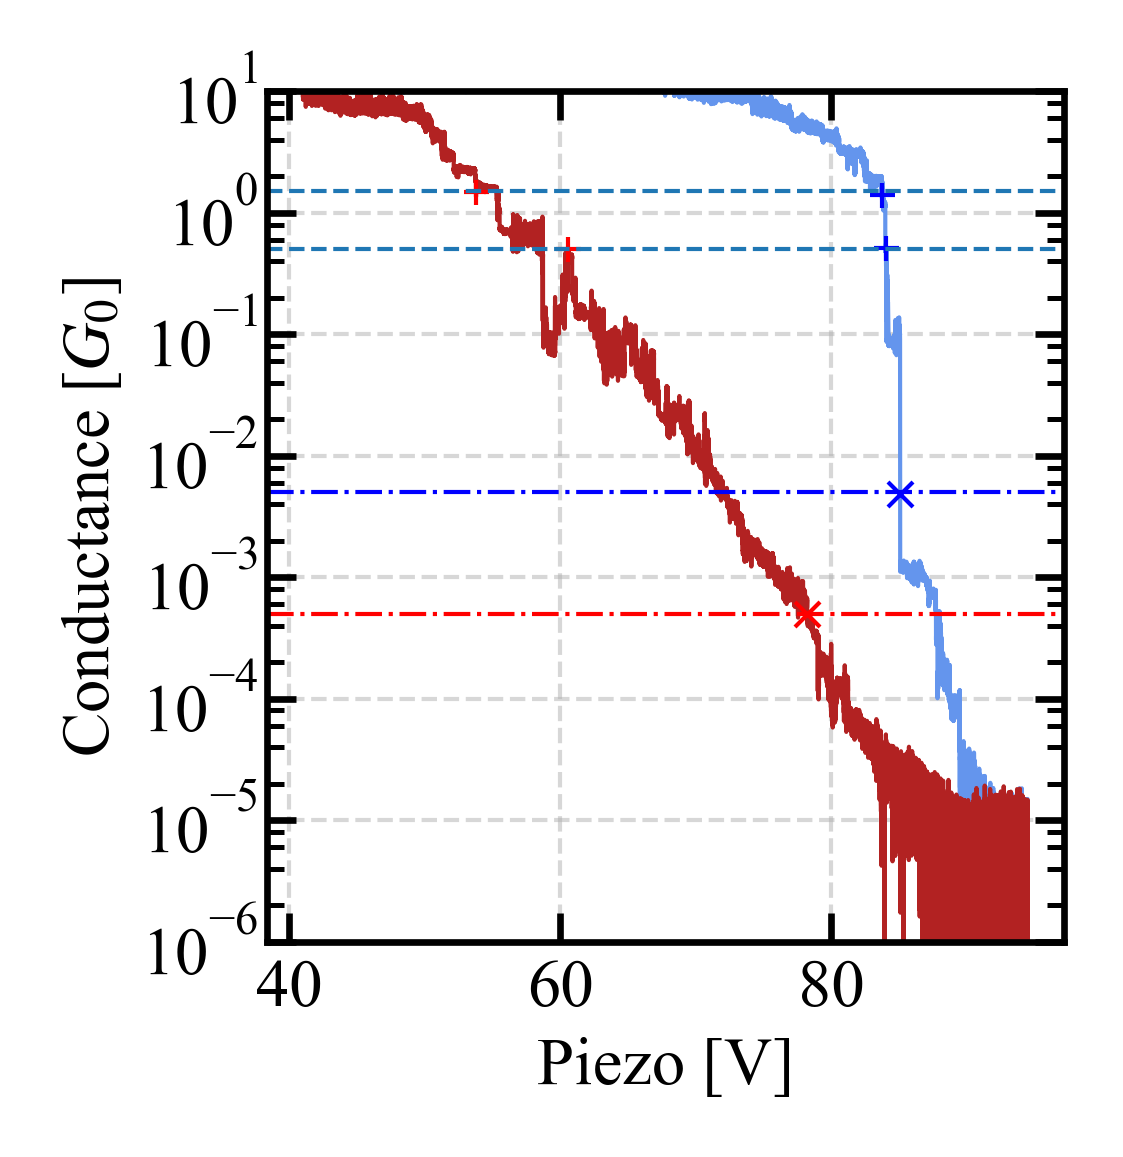

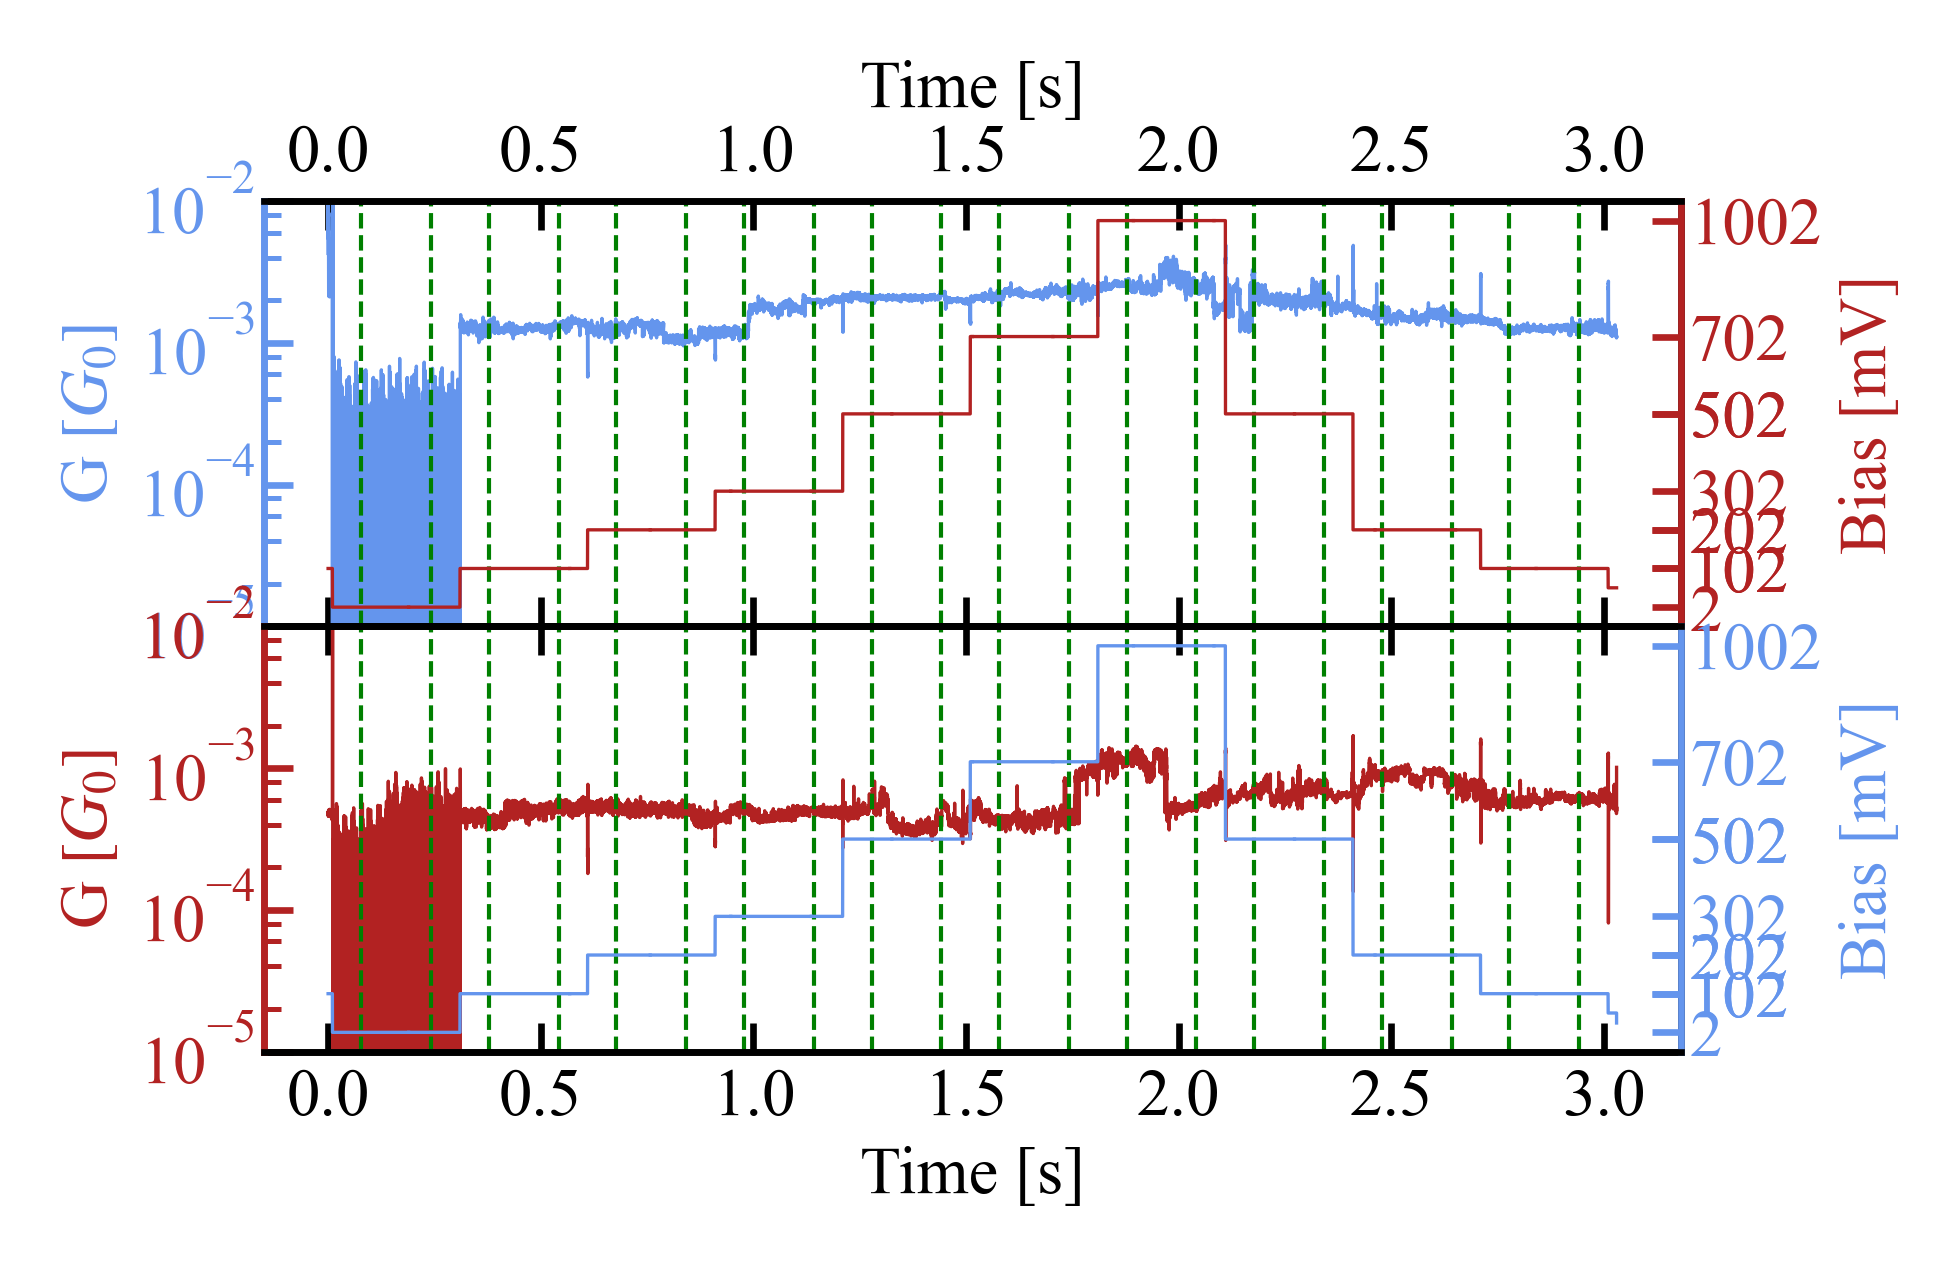

In [22]:
num=np.random.choice(ind, 1)[0]
print(num)
fig = plt.figure(figsize=utils.cm2inch(4.5, 4.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=1,
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax = fig.add_subplot(gs[0])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

trace_pair = TracePair(num, home_folder)
trace_pair.plot_trace_pair(ax=ax)  # , xlim=(138.5, 140.2)

plt.savefig(home_folder.joinpath(f'results/trace_pair_{num}.png'), bbox_inches='tight')

fig = plt.figure(figsize=utils.cm2inch(8, 4.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=1,
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_pull = fig.add_subplot(gs[0])
ax_push = fig.add_subplot(gs[1])

ax_pull.xaxis.tick_top()
ax_pull.xaxis.set_label_position('top')
ax_pull.xaxis.set_ticks_position('both')
ax_push.xaxis.set_ticks_position('both')

hold_trace = HoldTrace(num, load_from=home_folder, min_step_len=None, bias_offset=0.00243)
hold_trace.analyse_hold_trace(num_of_fft=1)

ax_pull = hold_trace.plot_hold_traces(plot_step_ranges=False, plot_psd_intervals=True, conductance=True, ax=ax_pull,
                            ax_colors=('cornflowerblue', 'firebrick'))
ax_push = hold_trace.plot_hold_traces(plot_step_ranges=False, plot_psd_intervals=True, conductance=True, ax=ax_push,
                            ax_colors=('cornflowerblue', 'firebrick'),
                            pull=False, push=True)

ax_pull.set_ylim((1e-5, 1e-2))
ax_push.set_ylim((1e-5, 1e-2))

plt.savefig(home_folder.joinpath(f'results/hold_trace_{num}.png'), bbox_inches='tight')

In [56]:
noise_stat_filt_push[f'noise_power_{step}'][push_low_ind]

0       1.290299e-11
1       9.071661e-11
2       4.052157e-10
3       3.431864e-11
5       7.582550e-11
            ...     
9700    2.617339e-10
9701    2.327355e-10
9703    1.730111e-10
9704    3.733133e-09
9705    3.036990e-10
Name: noise_power_4, Length: 6477, dtype: float64

In [108]:
step=3
bias = 200

noise_stat_pre_filt_pull = noise_stat_pull_2.where(noise_stat_pull_2[f'avg_cond_on_step_{step}'] > 1e-5).dropna(how='any')
noise_stat_pre_filt_push = noise_stat_push_2.where(noise_stat_push_2[f'avg_cond_on_step_{step}'] > 1e-5).dropna(how='any')
noise_stat_filt_pull = noise_stat_pre_filt_pull.where(np.log10(noise_stat_pre_filt_pull[f'avg_cond_on_step_{step}']/noise_stat_pre_filt_pull['avg_cond_on_step_4']) < np.log10(2)).dropna(how='any')
noise_stat_filt_push = noise_stat_pre_filt_push.where(np.log10(noise_stat_pre_filt_push[f'avg_cond_on_step_{step}']/noise_stat_pre_filt_push['avg_cond_on_step_4']) < np.log10(2)).dropna(how='any')

pull_low_ind = noise_stat_filt_pull[f'avg_cond_on_step_{step}'].where(np.bitwise_and((noise_stat_filt_pull[f'avg_cond_on_step_{step}'] > 1e-4),
                                                                      (noise_stat_filt_pull[f'avg_cond_on_step_{step}'] < 1e-3))).dropna(how='any').index
pull_high_ind = noise_stat_filt_pull[f'avg_cond_on_step_{step}'].where(np.bitwise_and((noise_stat_filt_pull[f'avg_cond_on_step_{step}'] > 1e-3),
                                                                      (noise_stat_filt_pull[f'avg_cond_on_step_{step}'] < 1e-2))).dropna(how='any').index

push_low_ind = noise_stat_filt_push[f'avg_cond_on_step_{step}'].where(np.bitwise_and((noise_stat_filt_push[f'avg_cond_on_step_{step}'] > 1e-4),
                                                                      (noise_stat_filt_push[f'avg_cond_on_step_{step}'] < 1e-3))).dropna(how='any').index

push_high_ind = noise_stat_filt_push[f'avg_cond_on_step_{step}'].where(np.bitwise_and((noise_stat_filt_push[f'avg_cond_on_step_{step}'] > 1e-3),
                                                                      (noise_stat_filt_push[f'avg_cond_on_step_{step}'] < 1e-2))).dropna(how='any').index

N = np.linspace(0.8, 2.2, num=1000)
pull_corr_low = np.zeros_like(N)
pull_corr_high = np.zeros_like(N)
push_corr_low = np.zeros_like(N)
push_corr_high = np.zeros_like(N)

for i, n in enumerate(N):
    pull_corr_low[i] = utils.calc_correlation(np.log10(noise_stat_filt_pull[f'noise_power_{step}'][pull_low_ind]/ \
                                                       noise_stat_filt_pull[f'avg_cond_on_step_{step}'][pull_low_ind]**n),
                                              np.log10(noise_stat_filt_pull[f'avg_cond_on_step_{step}'][pull_low_ind]))
    pull_corr_high[i] = utils.calc_correlation(np.log10(noise_stat_filt_pull[f'noise_power_{step}'][pull_high_ind]/ \
                                                        noise_stat_filt_pull[f'avg_cond_on_step_{step}'][pull_high_ind]**n),
                                               np.log10(noise_stat_filt_pull[f'avg_cond_on_step_{step}'][pull_high_ind]))
    
    push_corr_low[i] = utils.calc_correlation(np.log10(noise_stat_filt_push[f'noise_power_{step}'][push_low_ind]/ \
                                                       noise_stat_filt_push[f'avg_cond_on_step_{step}'][push_low_ind]**n),
                                              np.log10(noise_stat_filt_push[f'avg_cond_on_step_{step}'][push_low_ind]))
    push_corr_high[i] = utils.calc_correlation(np.log10(noise_stat_filt_push[f'noise_power_{step}'][push_high_ind]/ \
                                                        noise_stat_filt_push[f'avg_cond_on_step_{step}'][push_high_ind]**n),
                                               np.log10(noise_stat_filt_push[f'avg_cond_on_step_{step}'][push_high_ind]))

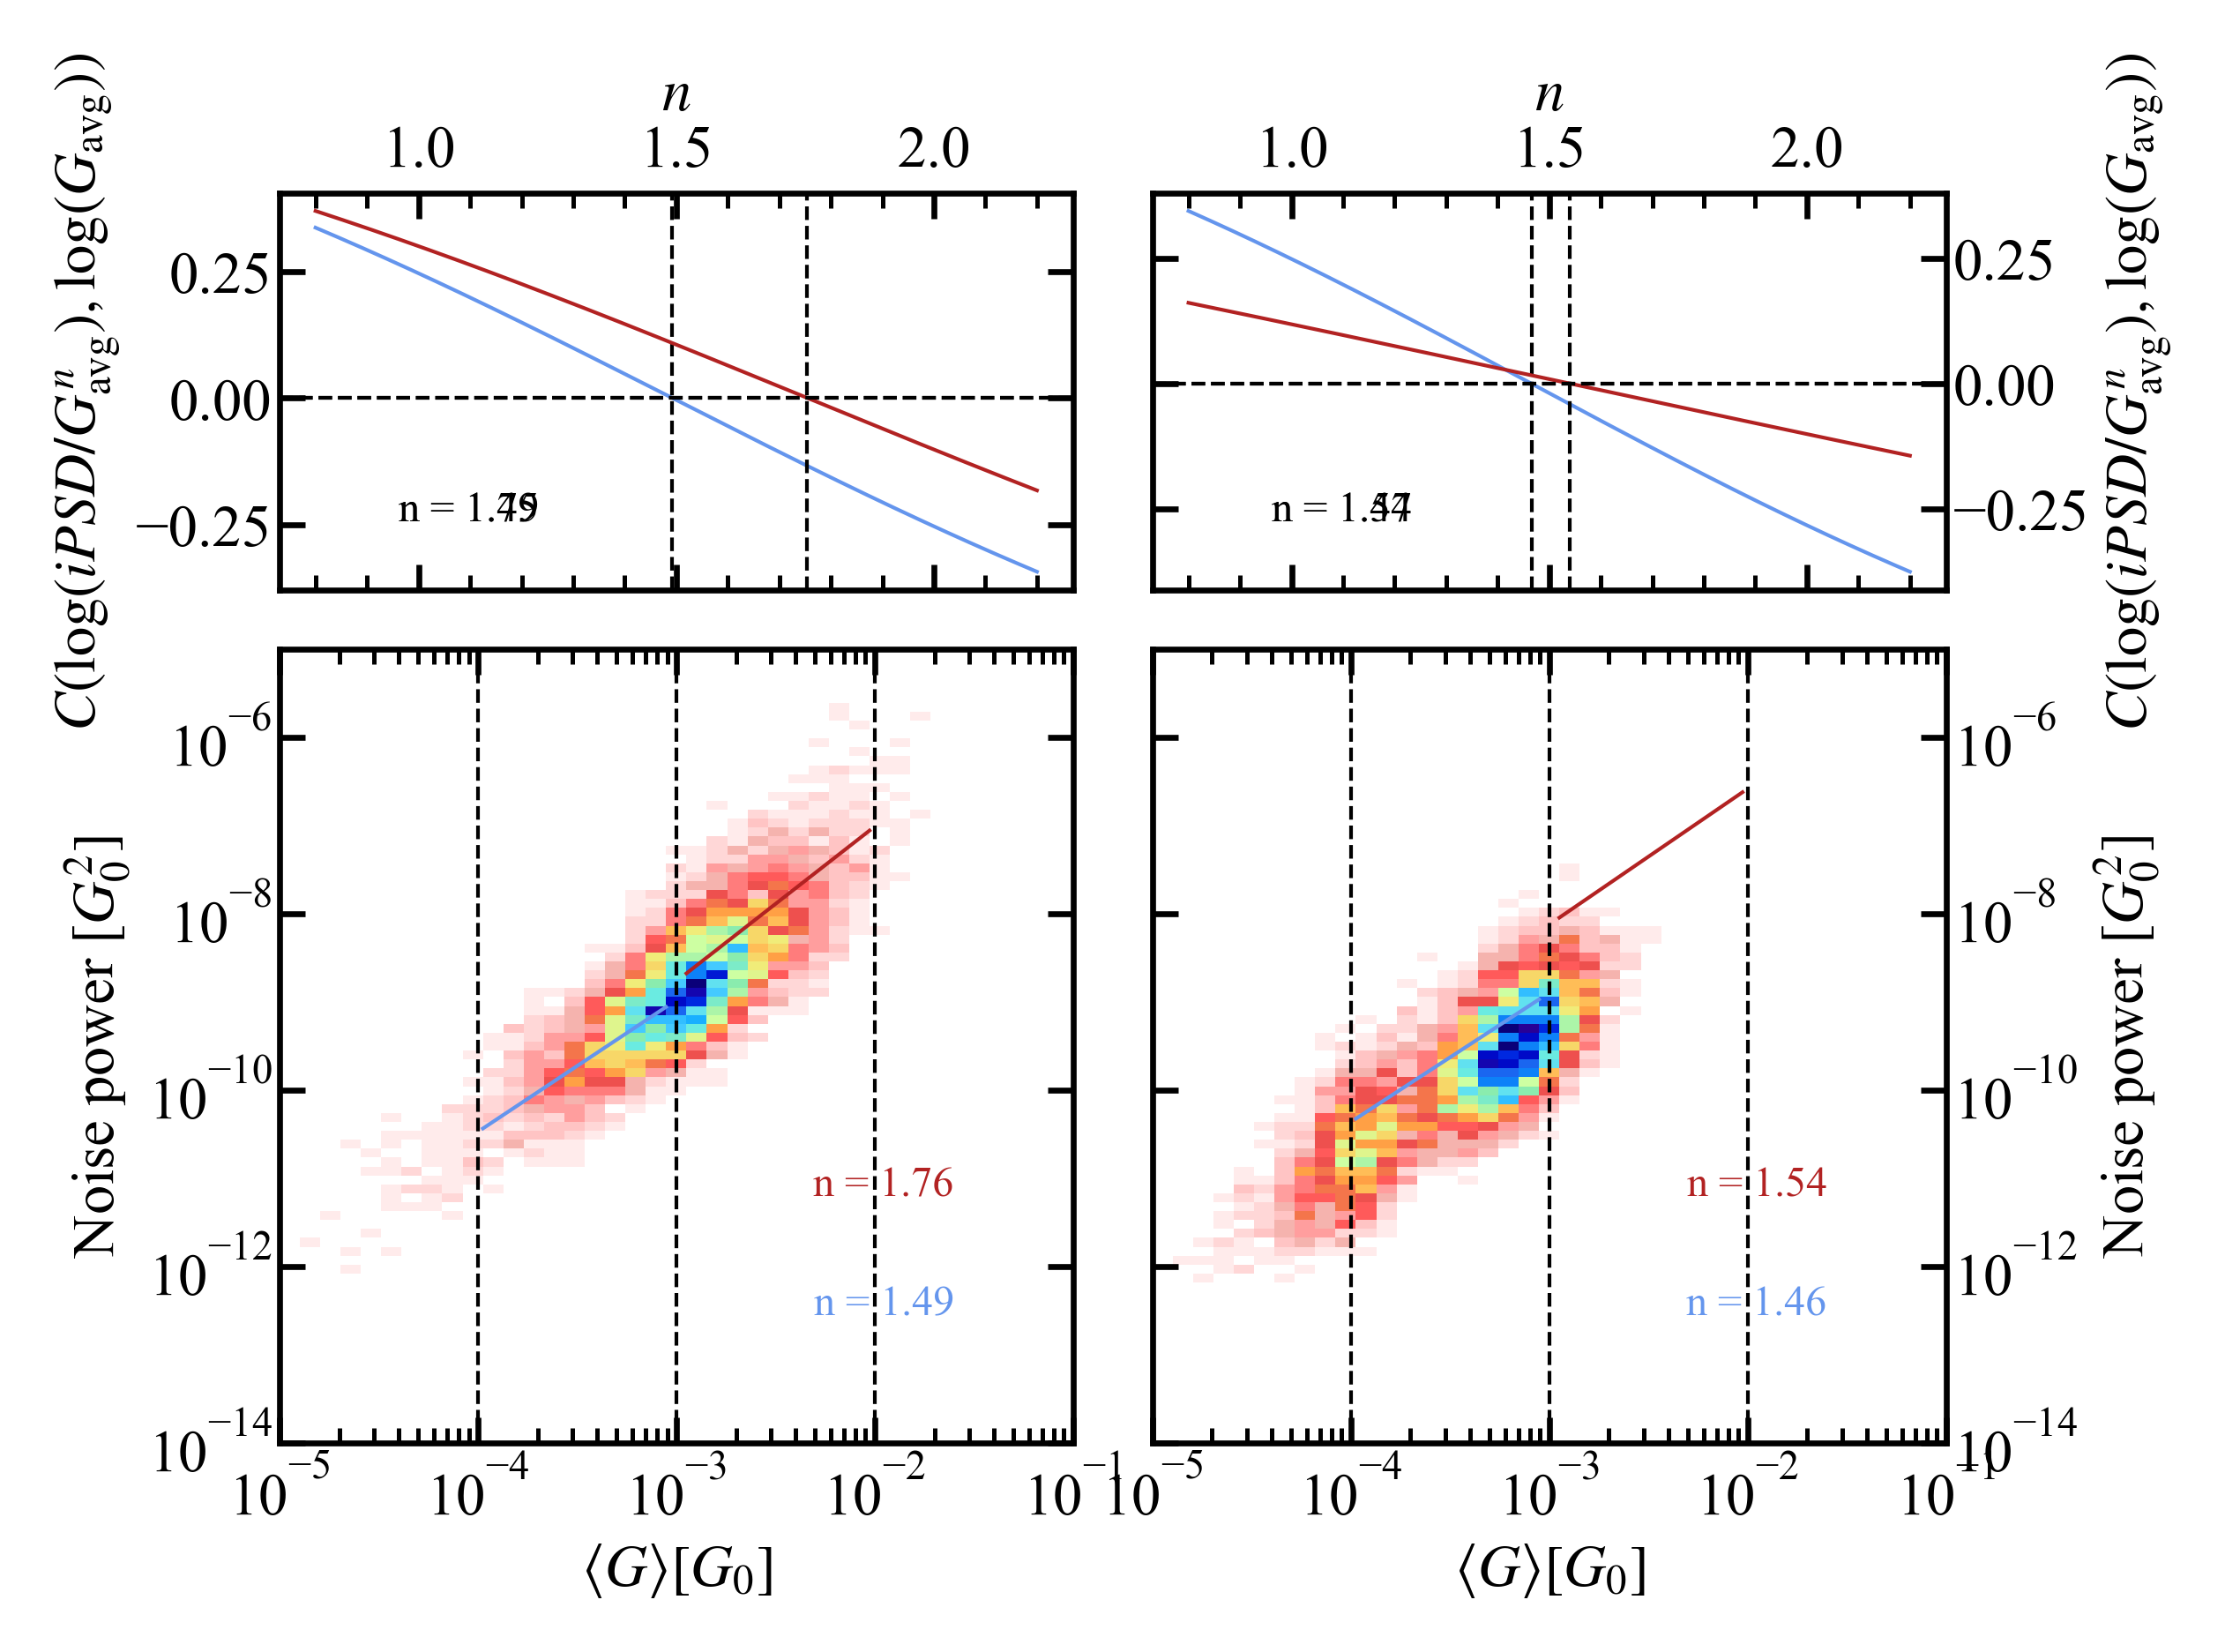

In [109]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax_corr_pull = fig.add_subplot(gs[0, 0])
ax_corr_push = fig.add_subplot(gs[0, 1])
ax_corrhist_pull = fig.add_subplot(gs[1, 0])
ax_corrhist_push = fig.add_subplot(gs[1, 1], sharey=ax_corrhist_pull)

ax_corr_pull.xaxis.tick_top()
ax_corr_pull.xaxis.set_label_position('top')
ax_corr_pull.xaxis.set_ticks_position('both')
ax_corr_pull.yaxis.set_ticks_position('both')

ax_corr_push.xaxis.tick_top()
ax_corr_push.xaxis.set_label_position('top')
ax_corr_push.yaxis.tick_right()
ax_corr_push.yaxis.set_label_position('right')
ax_corr_push.xaxis.set_ticks_position('both')
ax_corr_push.yaxis.set_ticks_position('both')

ax_corrhist_pull.xaxis.set_ticks_position('both')
ax_corrhist_pull.yaxis.set_ticks_position('both')

ax_corrhist_push.yaxis.tick_right()
ax_corrhist_push.yaxis.set_label_position('right')
ax_corrhist_push.xaxis.set_ticks_position('both')
ax_corrhist_push.yaxis.set_ticks_position('both')

ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_pull)
ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_high, lw=0.5, c='firebrick', axis=ax_corr_pull)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_push)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_high, lw=0.5, c='firebrick', axis=ax_corr_push)


plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_pull[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_pull[f'noise_power_{step}']),
                        n = (np.mean((N[pull_corr_low<0][0], N[pull_corr_low>0][-1])),
                             np.mean((N[pull_corr_high<0][0], N[pull_corr_high>0][-1]))),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-14, 1e-5),
                        num_bins=(10, 10),
                        shift=(-4.5, -3.5),
                        normalize=False,
                        cmap=cmap_geo32, axis=ax_corrhist_pull)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_push[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_push[f'noise_power_{step}']),
                        n = (np.mean((N[push_corr_low<0][0], N[push_corr_low>0][-1])),
                             np.mean((N[push_corr_high<0][0], N[push_corr_high>0][-1]))),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-14, 1e-5),
                        num_bins=(10, 10),
                        shift=(-4.5, -3.5),
                        normalize=False,
                        cmap=cmap_geo32, axis=ax_corrhist_push)

ax_corrhist_pull.set_ylabel(r'Noise power [$G_{0}^{2}]$')
ax_corrhist_push.set_ylabel(r'Noise power [$G_{0}^{2}$]')

ax_corrhist_pull.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-2, ls='--', lw=0.5, c='k')

ax_corrhist_push.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-2, ls='--', lw=0.5, c='k')

plt.savefig(home_folder.joinpath(f'results/noise_power_{bias}_FILTERED.png'), bbox_inches='tight')

C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_15300/1291252123.py:45: RuntimeWarning: invalid value encountered in true_divide
  h = h/avg_cond_hist
C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_15300/1291252123.py:45: RuntimeWarning: invalid value encountered in true_divide
  h = h/avg_cond_hist


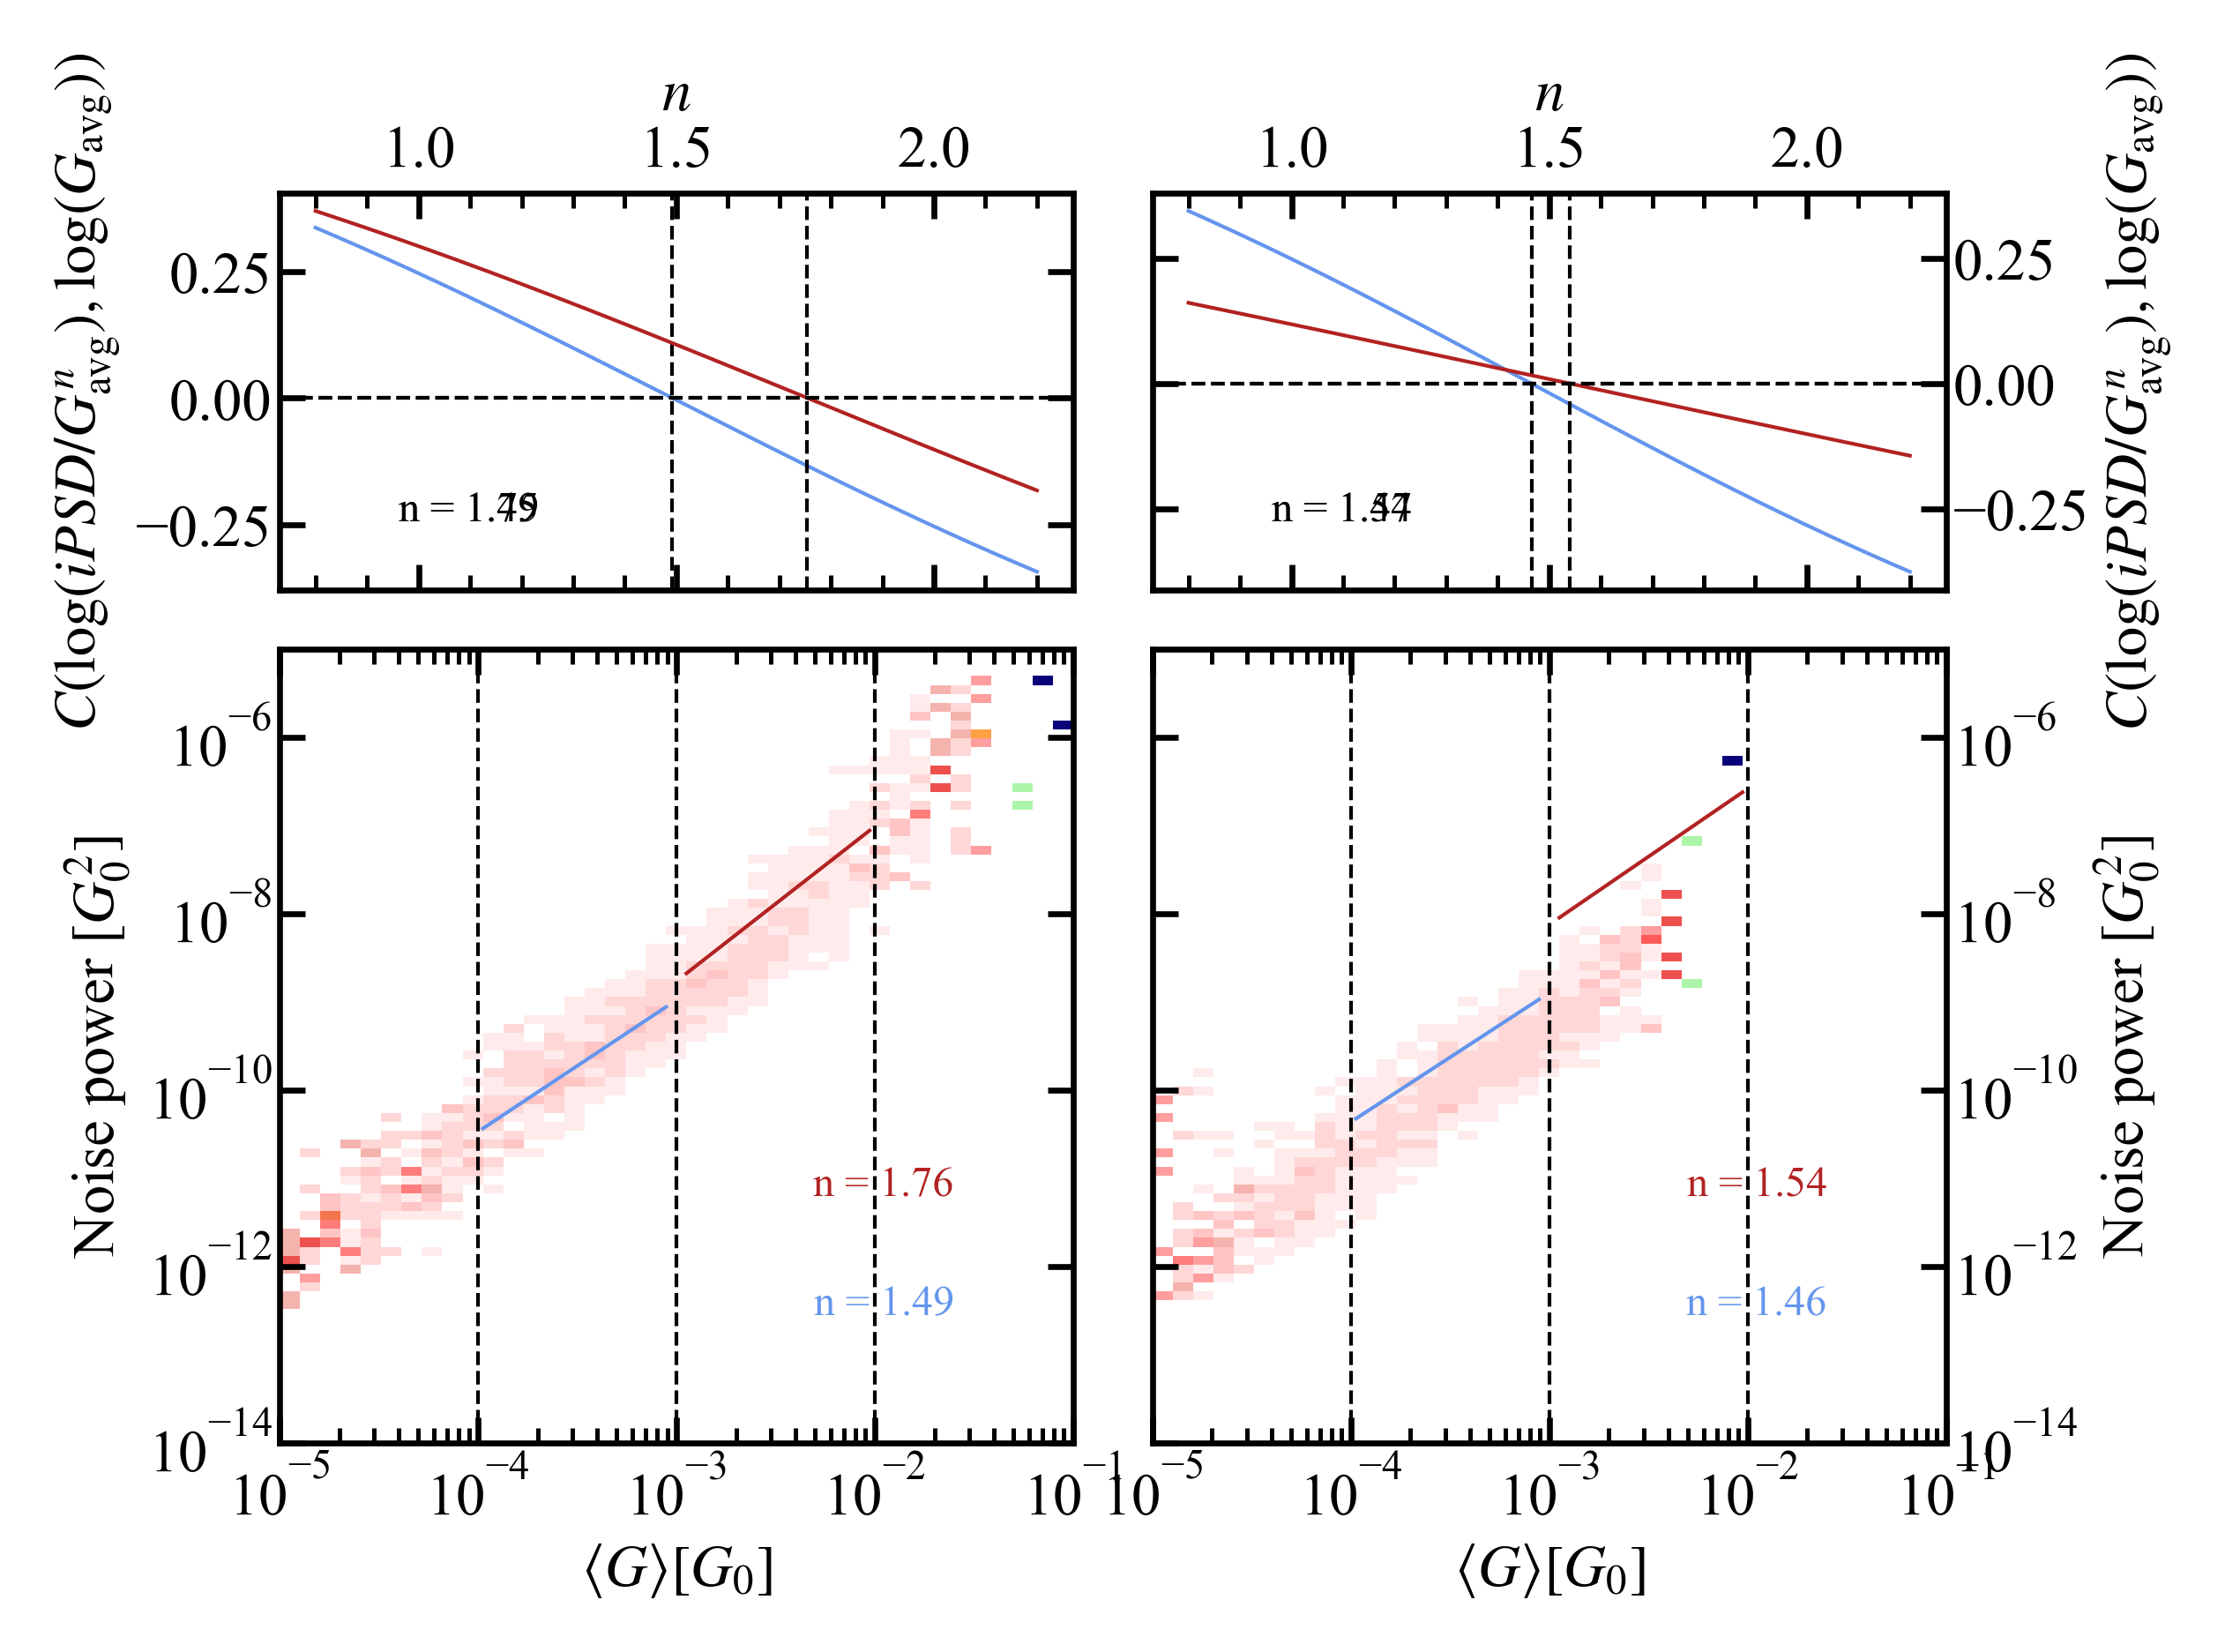

In [110]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax_corr_pull = fig.add_subplot(gs[0, 0])
ax_corr_push = fig.add_subplot(gs[0, 1])
ax_corrhist_pull = fig.add_subplot(gs[1, 0])
ax_corrhist_push = fig.add_subplot(gs[1, 1], sharey=ax_corrhist_pull)

ax_corr_pull.xaxis.tick_top()
ax_corr_pull.xaxis.set_label_position('top')
ax_corr_pull.xaxis.set_ticks_position('both')
ax_corr_pull.yaxis.set_ticks_position('both')

ax_corr_push.xaxis.tick_top()
ax_corr_push.xaxis.set_label_position('top')
ax_corr_push.yaxis.tick_right()
ax_corr_push.yaxis.set_label_position('right')
ax_corr_push.xaxis.set_ticks_position('both')
ax_corr_push.yaxis.set_ticks_position('both')

ax_corrhist_pull.xaxis.set_ticks_position('both')
ax_corrhist_pull.yaxis.set_ticks_position('both')

ax_corrhist_push.yaxis.tick_right()
ax_corrhist_push.yaxis.set_label_position('right')
ax_corrhist_push.xaxis.set_ticks_position('both')
ax_corrhist_push.yaxis.set_ticks_position('both')

ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_pull)
ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_high, lw=0.5, c='firebrick', axis=ax_corr_pull)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_push)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_high, lw=0.5, c='firebrick', axis=ax_corr_push)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_pull[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_pull[f'noise_power_{step}']),
                        n = (np.mean((N[pull_corr_low<0][0], N[pull_corr_low>0][-1])),
                             np.mean((N[pull_corr_high<0][0], N[pull_corr_high>0][-1]))),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-14, 1e-5),
                        num_bins=(10, 10),
                        shift=(-4.5, -3.5),
                        normalize=True,
                        cmap=cmap_geo32, axis=ax_corrhist_pull)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_push[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_push[f'noise_power_{step}']),
                        n = (np.mean((N[push_corr_low<0][0], N[push_corr_low>0][-1])),
                             np.mean((N[push_corr_high<0][0], N[push_corr_high>0][-1]))),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-14, 1e-5),
                        num_bins=(10, 10),
                        shift=(-4.5, -3.5),
                        normalize=True,
                        cmap=cmap_geo32, axis=ax_corrhist_push)

ax_corrhist_pull.set_ylabel(r'Noise power [$G_{0}^{2}]$')
ax_corrhist_push.set_ylabel(r'Noise power [$G_{0}^{2}$]')

ax_corrhist_pull.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-2, ls='--', lw=0.5, c='k')

ax_corrhist_push.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-2, ls='--', lw=0.5, c='k')

plt.savefig(home_folder.joinpath(f'results/noise_power_{bias}_FILTERED_normalized.png'), bbox_inches='tight')

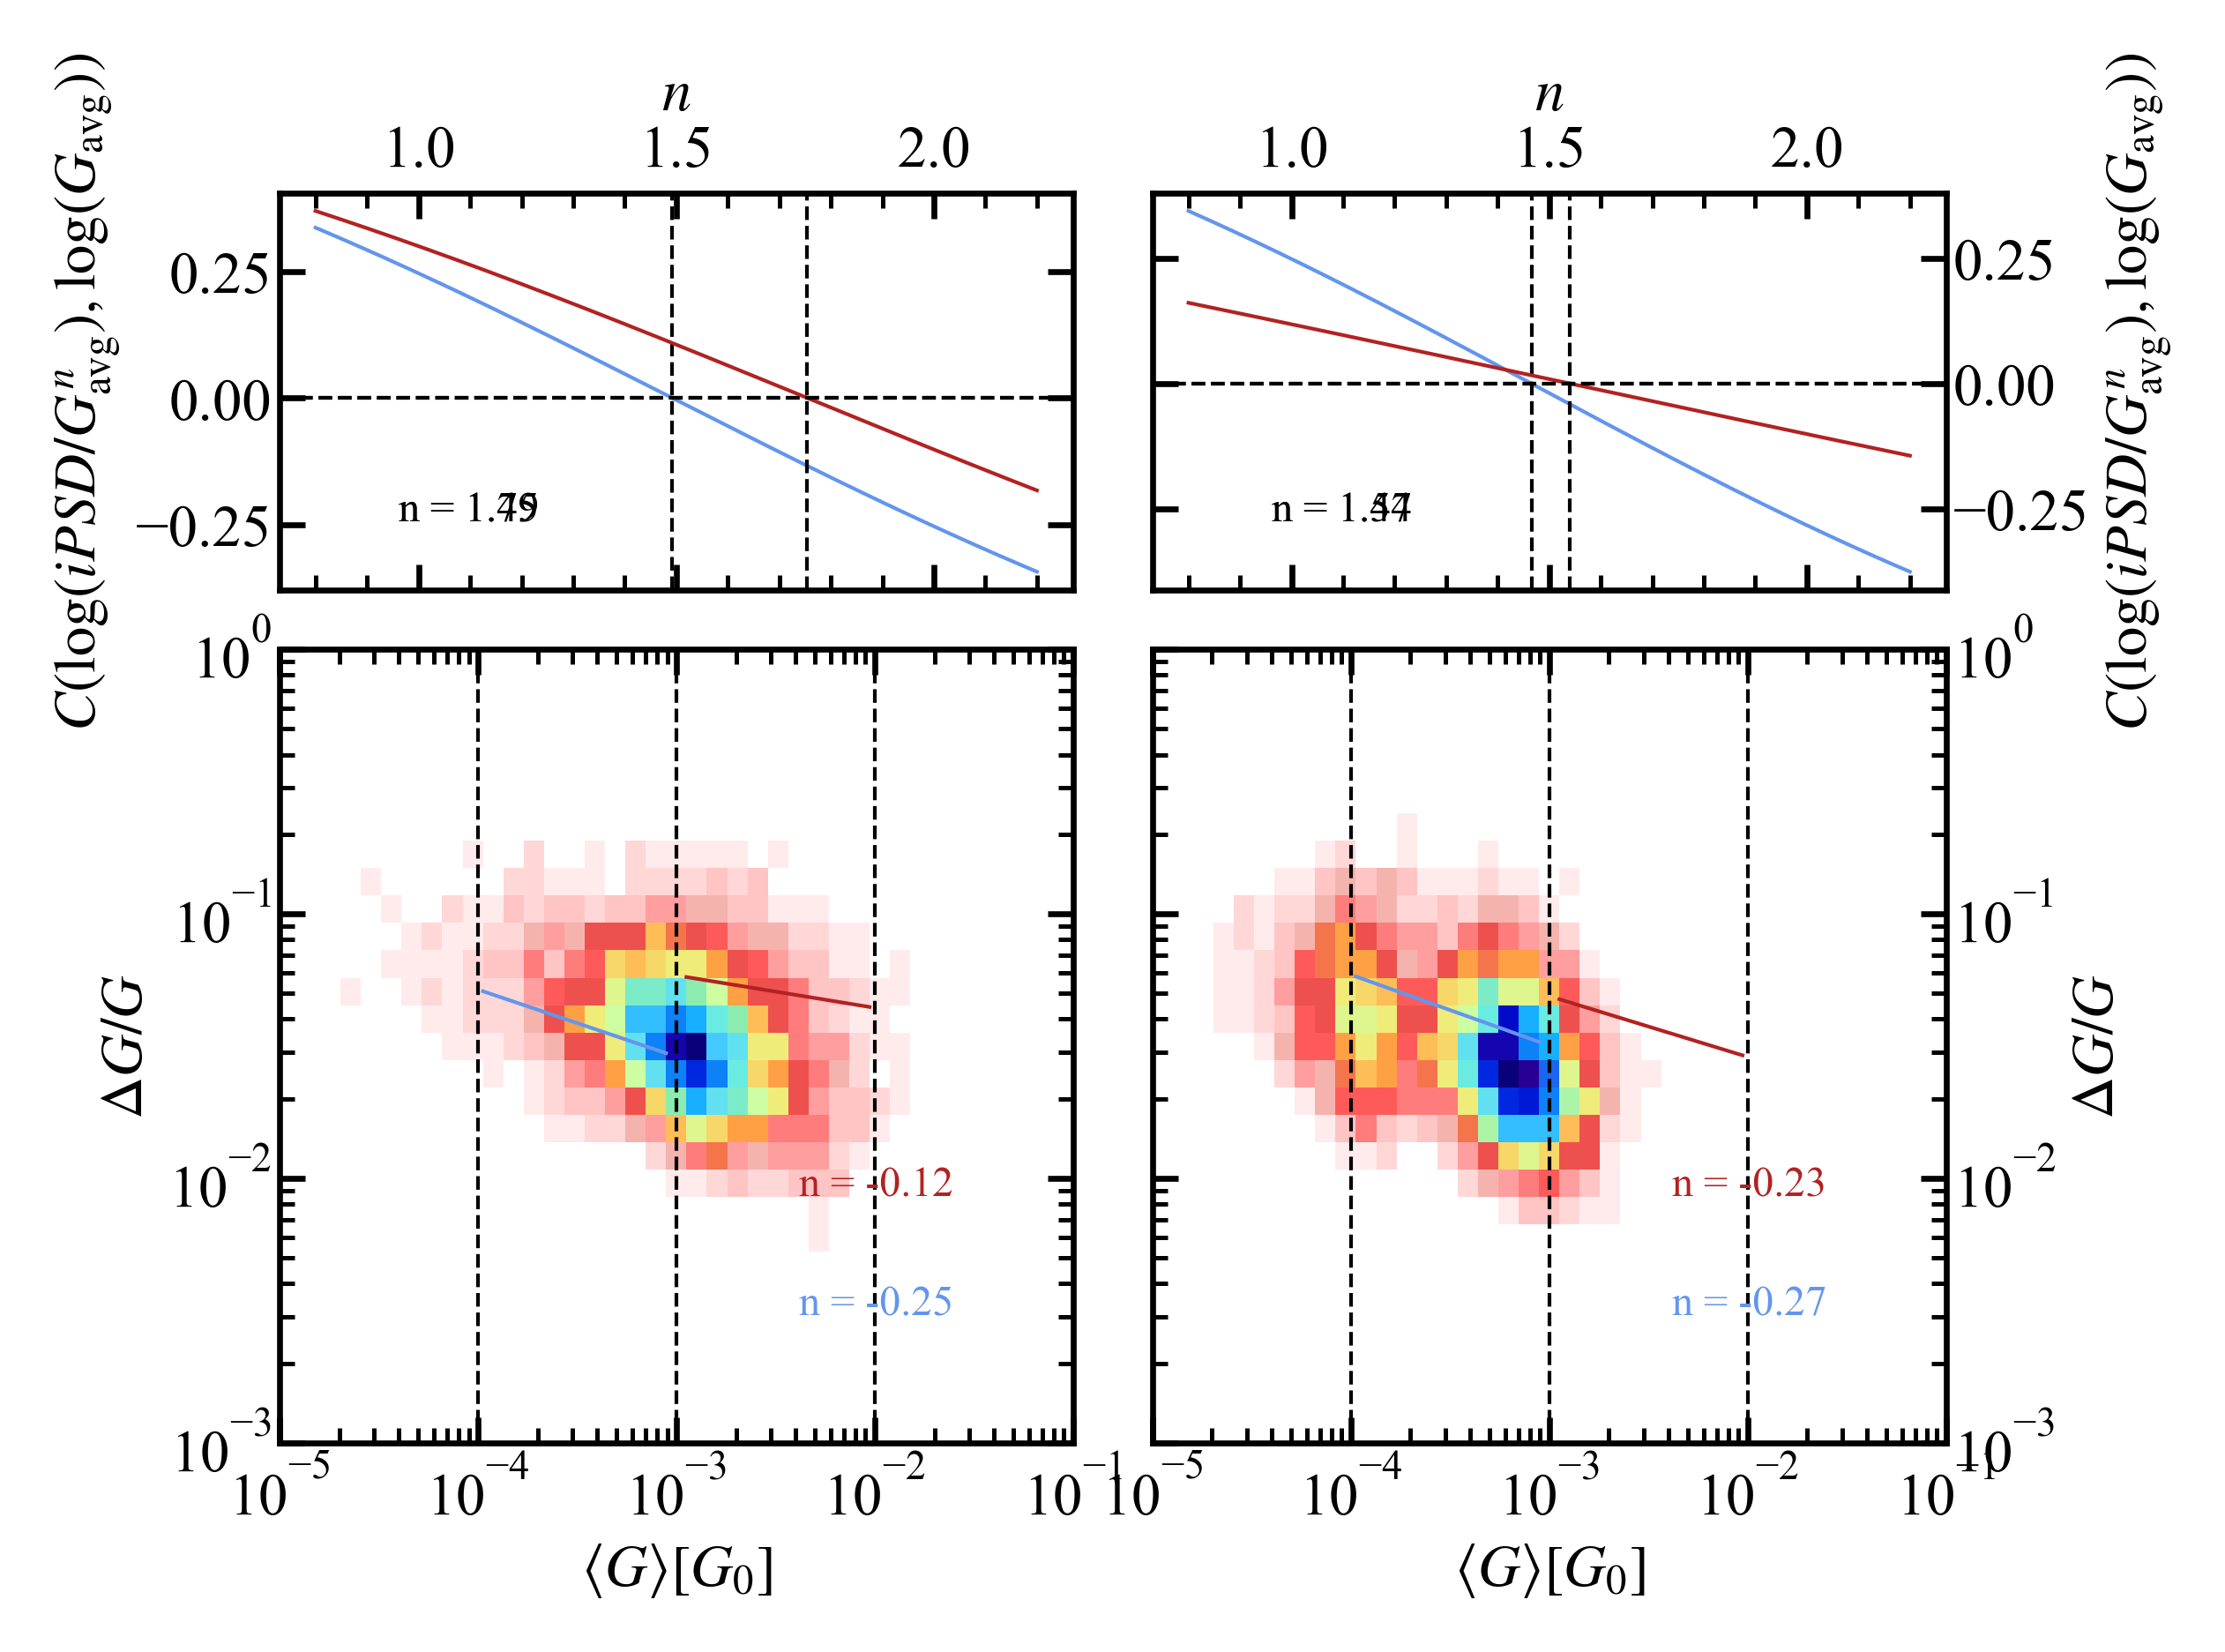

In [111]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax_corr_pull = fig.add_subplot(gs[0, 0])
ax_corr_push = fig.add_subplot(gs[0, 1])
ax_corrhist_pull = fig.add_subplot(gs[1, 0])
ax_corrhist_push = fig.add_subplot(gs[1, 1], sharey=ax_corrhist_pull)

ax_corr_pull.xaxis.tick_top()
ax_corr_pull.xaxis.set_label_position('top')
ax_corr_pull.xaxis.set_ticks_position('both')
ax_corr_pull.yaxis.set_ticks_position('both')

ax_corr_push.xaxis.tick_top()
ax_corr_push.xaxis.set_label_position('top')
ax_corr_push.yaxis.tick_right()
ax_corr_push.yaxis.set_label_position('right')
ax_corr_push.xaxis.set_ticks_position('both')
ax_corr_push.yaxis.set_ticks_position('both')

ax_corrhist_pull.xaxis.set_ticks_position('both')
ax_corrhist_pull.yaxis.set_ticks_position('both')

ax_corrhist_push.yaxis.tick_right()
ax_corrhist_push.yaxis.set_label_position('right')
ax_corrhist_push.xaxis.set_ticks_position('both')
ax_corrhist_push.yaxis.set_ticks_position('both')

ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_pull)
ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_high, lw=0.5, c='firebrick', axis=ax_corr_pull)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_push)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_high, lw=0.5, c='firebrick', axis=ax_corr_push)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_pull[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_pull[f'conductance_noise_{step}']),
                        n = ((np.mean((N[pull_corr_low<0][0], N[pull_corr_low>0][-1]))-2)/2,
                             (np.mean((N[pull_corr_high<0][0], N[pull_corr_high>0][-1]))-2)/2),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-3, 1),
                        num_bins=(10, 10),
                        shift=(-2.3, -1.6),
                        normalize=False,
                        cmap=cmap_geo32, axis=ax_corrhist_pull)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_push[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_push[f'conductance_noise_{step}']),
                        n = ((np.mean((N[push_corr_low<0][0], N[push_corr_low>0][-1]))-2)/2,
                             (np.mean((N[push_corr_high<0][0], N[push_corr_high>0][-1]))-2)/2),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-3, 1),
                        num_bins=(10, 10),
                        shift=(-2.3, -2),
                        normalize=False,
                        cmap=cmap_geo32, axis=ax_corrhist_push)

ax_corrhist_pull.set_ylabel(r'$\Delta G/G$')
ax_corrhist_push.set_ylabel(r'$\Delta G/G$')

ax_corrhist_pull.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-2, ls='--', lw=0.5, c='k')

ax_corrhist_push.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-2, ls='--', lw=0.5, c='k')

plt.savefig(home_folder.joinpath(f'results/conductance_noise_{bias}_FILTERED.png'), bbox_inches='tight')

C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_15300/1291252123.py:45: RuntimeWarning: invalid value encountered in true_divide
  h = h/avg_cond_hist
C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_15300/1291252123.py:45: RuntimeWarning: invalid value encountered in true_divide
  h = h/avg_cond_hist


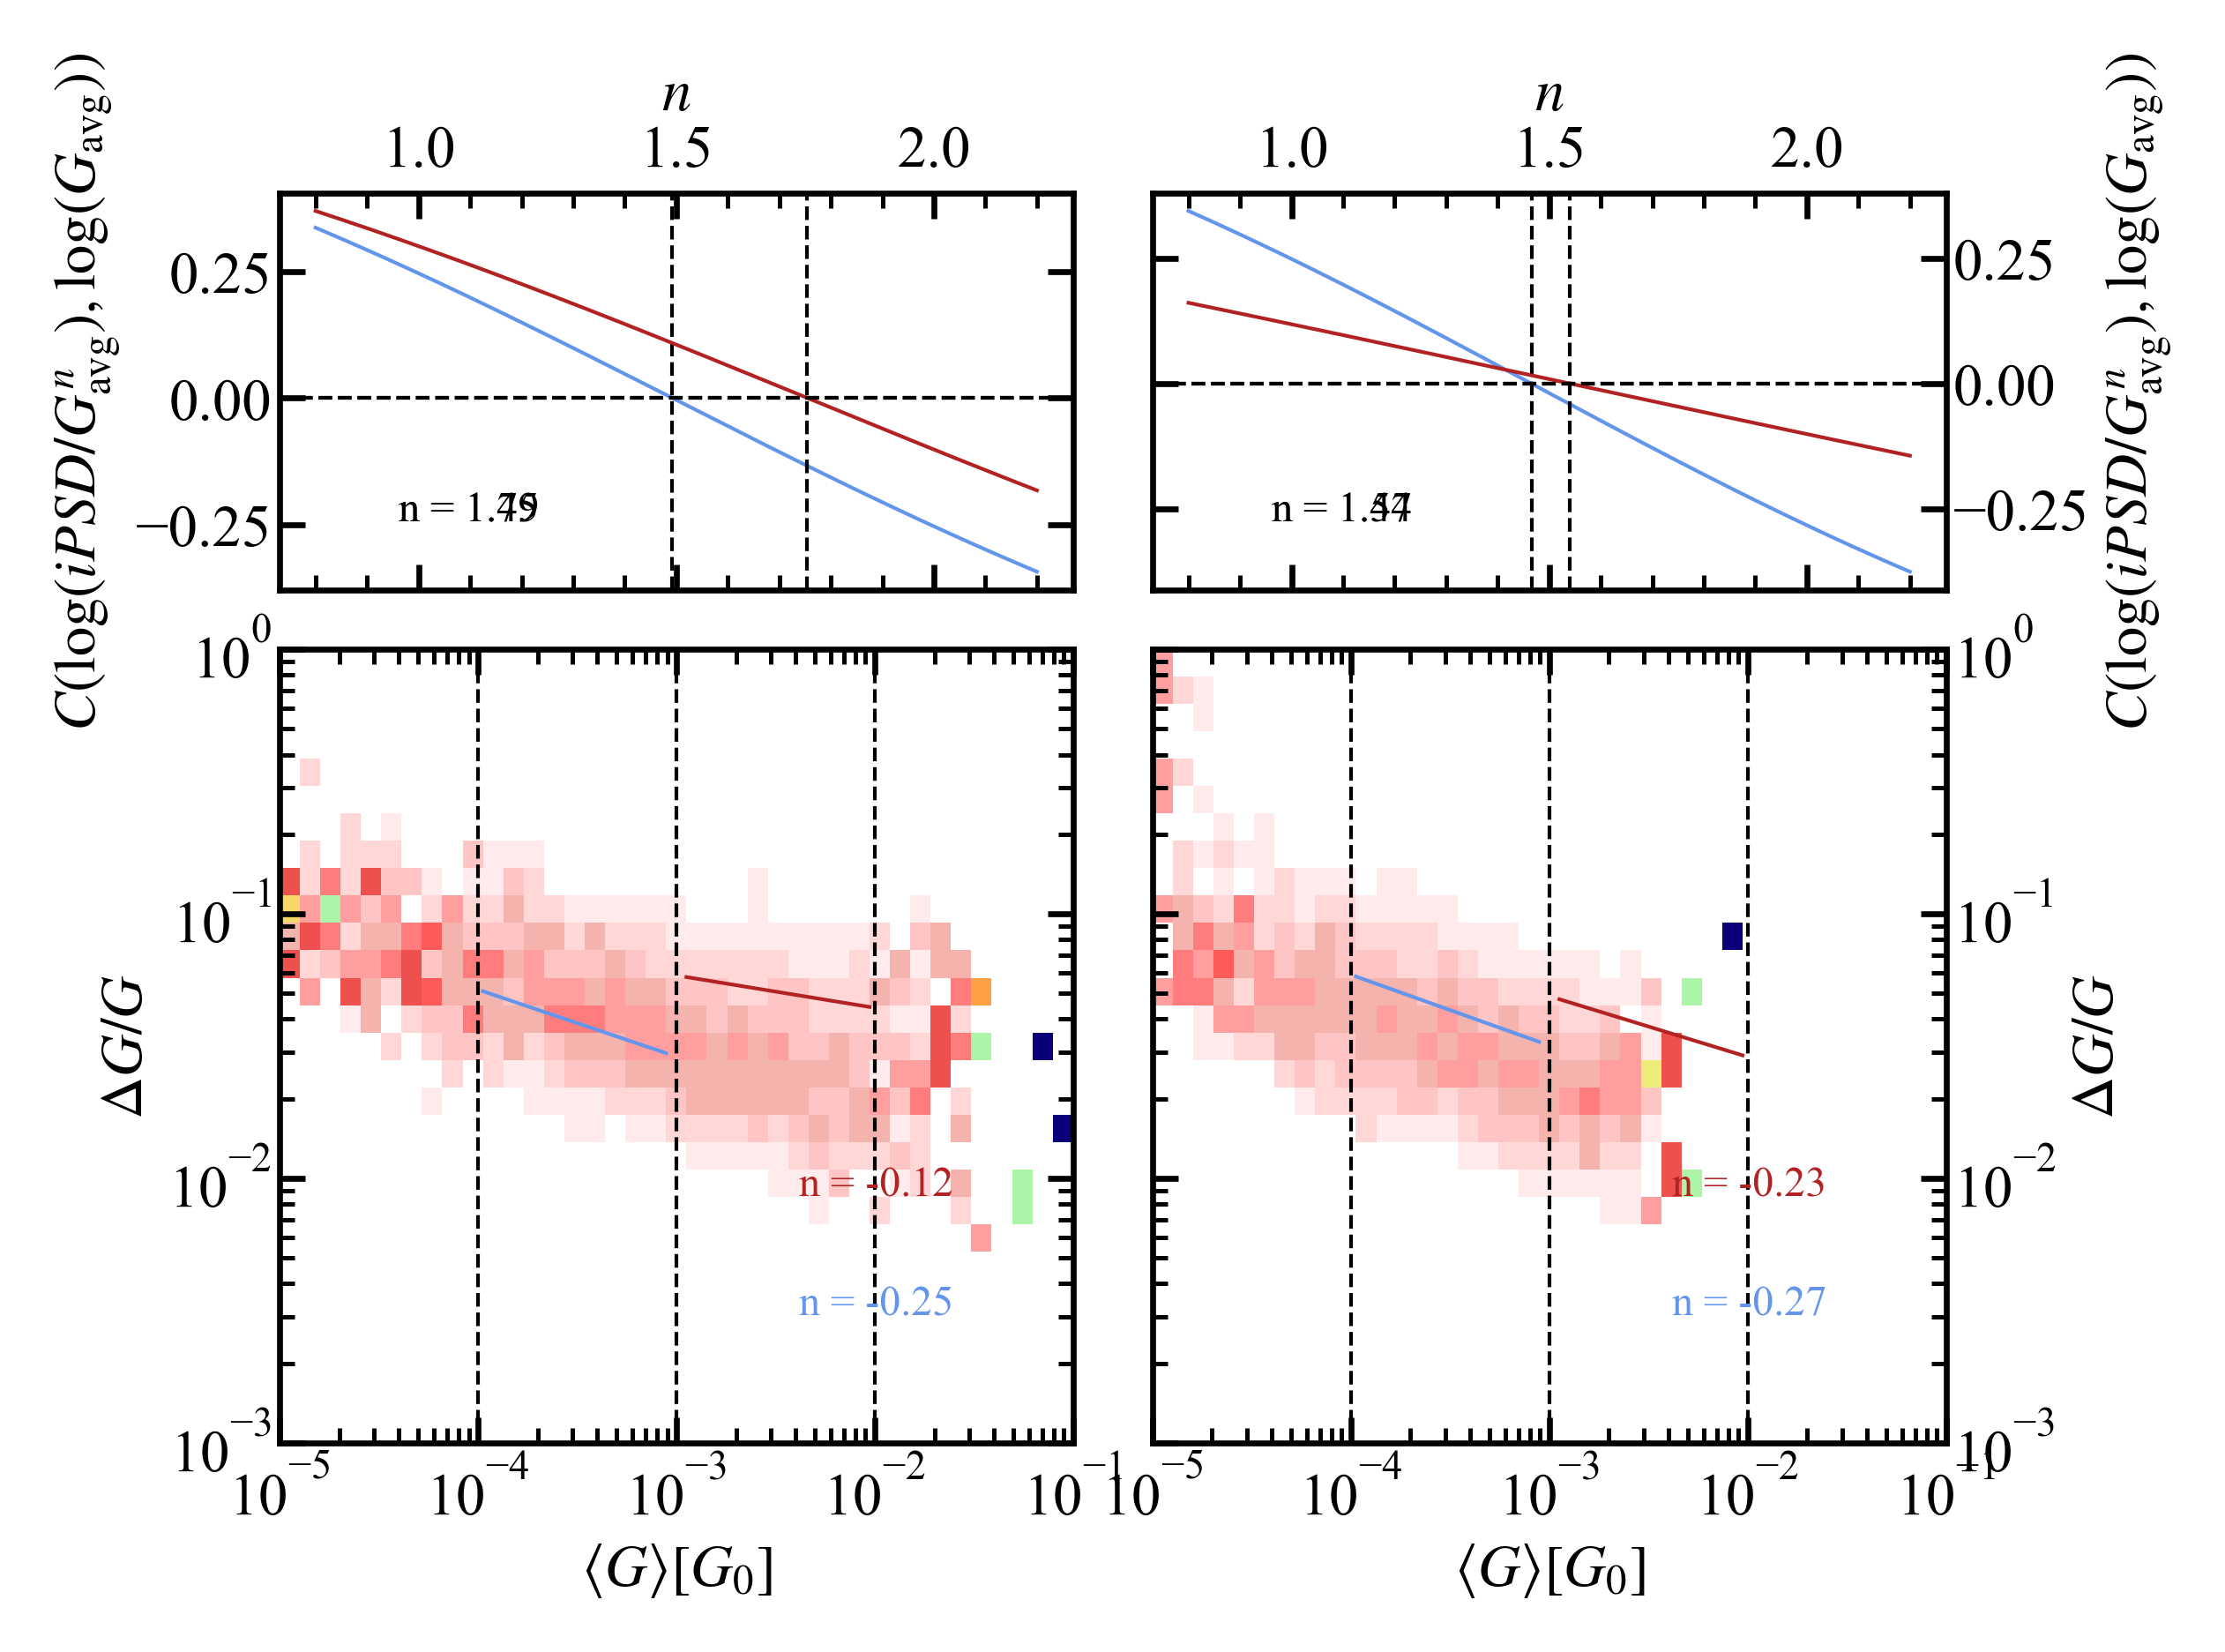

In [112]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax_corr_pull = fig.add_subplot(gs[0, 0])
ax_corr_push = fig.add_subplot(gs[0, 1])
ax_corrhist_pull = fig.add_subplot(gs[1, 0])
ax_corrhist_push = fig.add_subplot(gs[1, 1], sharey=ax_corrhist_pull)

ax_corr_pull.xaxis.tick_top()
ax_corr_pull.xaxis.set_label_position('top')
ax_corr_pull.xaxis.set_ticks_position('both')
ax_corr_pull.yaxis.set_ticks_position('both')

ax_corr_push.xaxis.tick_top()
ax_corr_push.xaxis.set_label_position('top')
ax_corr_push.yaxis.tick_right()
ax_corr_push.yaxis.set_label_position('right')
ax_corr_push.xaxis.set_ticks_position('both')
ax_corr_push.yaxis.set_ticks_position('both')

ax_corrhist_pull.xaxis.set_ticks_position('both')
ax_corrhist_pull.yaxis.set_ticks_position('both')

ax_corrhist_push.yaxis.tick_right()
ax_corrhist_push.yaxis.set_label_position('right')
ax_corrhist_push.xaxis.set_ticks_position('both')
ax_corrhist_push.yaxis.set_ticks_position('both')

ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_pull)
ax_corr_pull, n_pull = plot_correlation(n = N, correlation = pull_corr_high, lw=0.5, c='firebrick', axis=ax_corr_pull)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_low, lw=0.5, c='cornflowerblue', axis=ax_corr_push)
ax_corr_push, n_push = plot_correlation(n = N, correlation = push_corr_high, lw=0.5, c='firebrick', axis=ax_corr_push)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_pull[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_pull[f'conductance_noise_{step}']),
                        n = ((np.mean((N[pull_corr_low<0][0], N[pull_corr_low>0][-1]))-2)/2,
                             (np.mean((N[pull_corr_high<0][0], N[pull_corr_high>0][-1]))-2)/2),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-3, 1),
                        num_bins=(10, 10),
                        shift=(-2.3, -1.6),
                        normalize=True,
                        cmap=cmap_geo32, axis=ax_corrhist_pull)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_filt_push[f'avg_cond_on_step_{step}']),
                        noise_power=np.array(noise_stat_filt_push[f'conductance_noise_{step}']),
                        n = ((np.mean((N[push_corr_low<0][0], N[push_corr_low>0][-1]))-2)/2,
                             (np.mean((N[push_corr_high<0][0], N[push_corr_high>0][-1]))-2)/2),
                        xrange=(1e-5, 0.1),
                        yrange=(1e-3, 1),
                        num_bins=(10, 10),
                        shift=(-2.3, -2),
                        normalize=True,
                        cmap=cmap_geo32, axis=ax_corrhist_push)

ax_corrhist_pull.set_ylabel(r'$\Delta G/G$')
ax_corrhist_push.set_ylabel(r'$\Delta G/G$')

ax_corrhist_pull.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_pull.axvline(x=1e-2, ls='--', lw=0.5, c='k')

ax_corrhist_push.axvline(x=1e-4, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-3, ls='--', lw=0.5, c='k')
ax_corrhist_push.axvline(x=1e-2, ls='--', lw=0.5, c='k')

plt.savefig(home_folder.joinpath(f'results/conductance_noise_{bias}_FILTERED_normalized.png'), bbox_inches='tight')

# Before evaporation

## 1-200

In [2]:
hist_1 = Histogram(home_folder, 1, 200)

hist_1.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files: 100%|██████████| 3/3 [00:38<00:00, 12.70s/it]

Pull 2D histogram created from 198 traces
Push 2D histogram created from 200 traces


(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

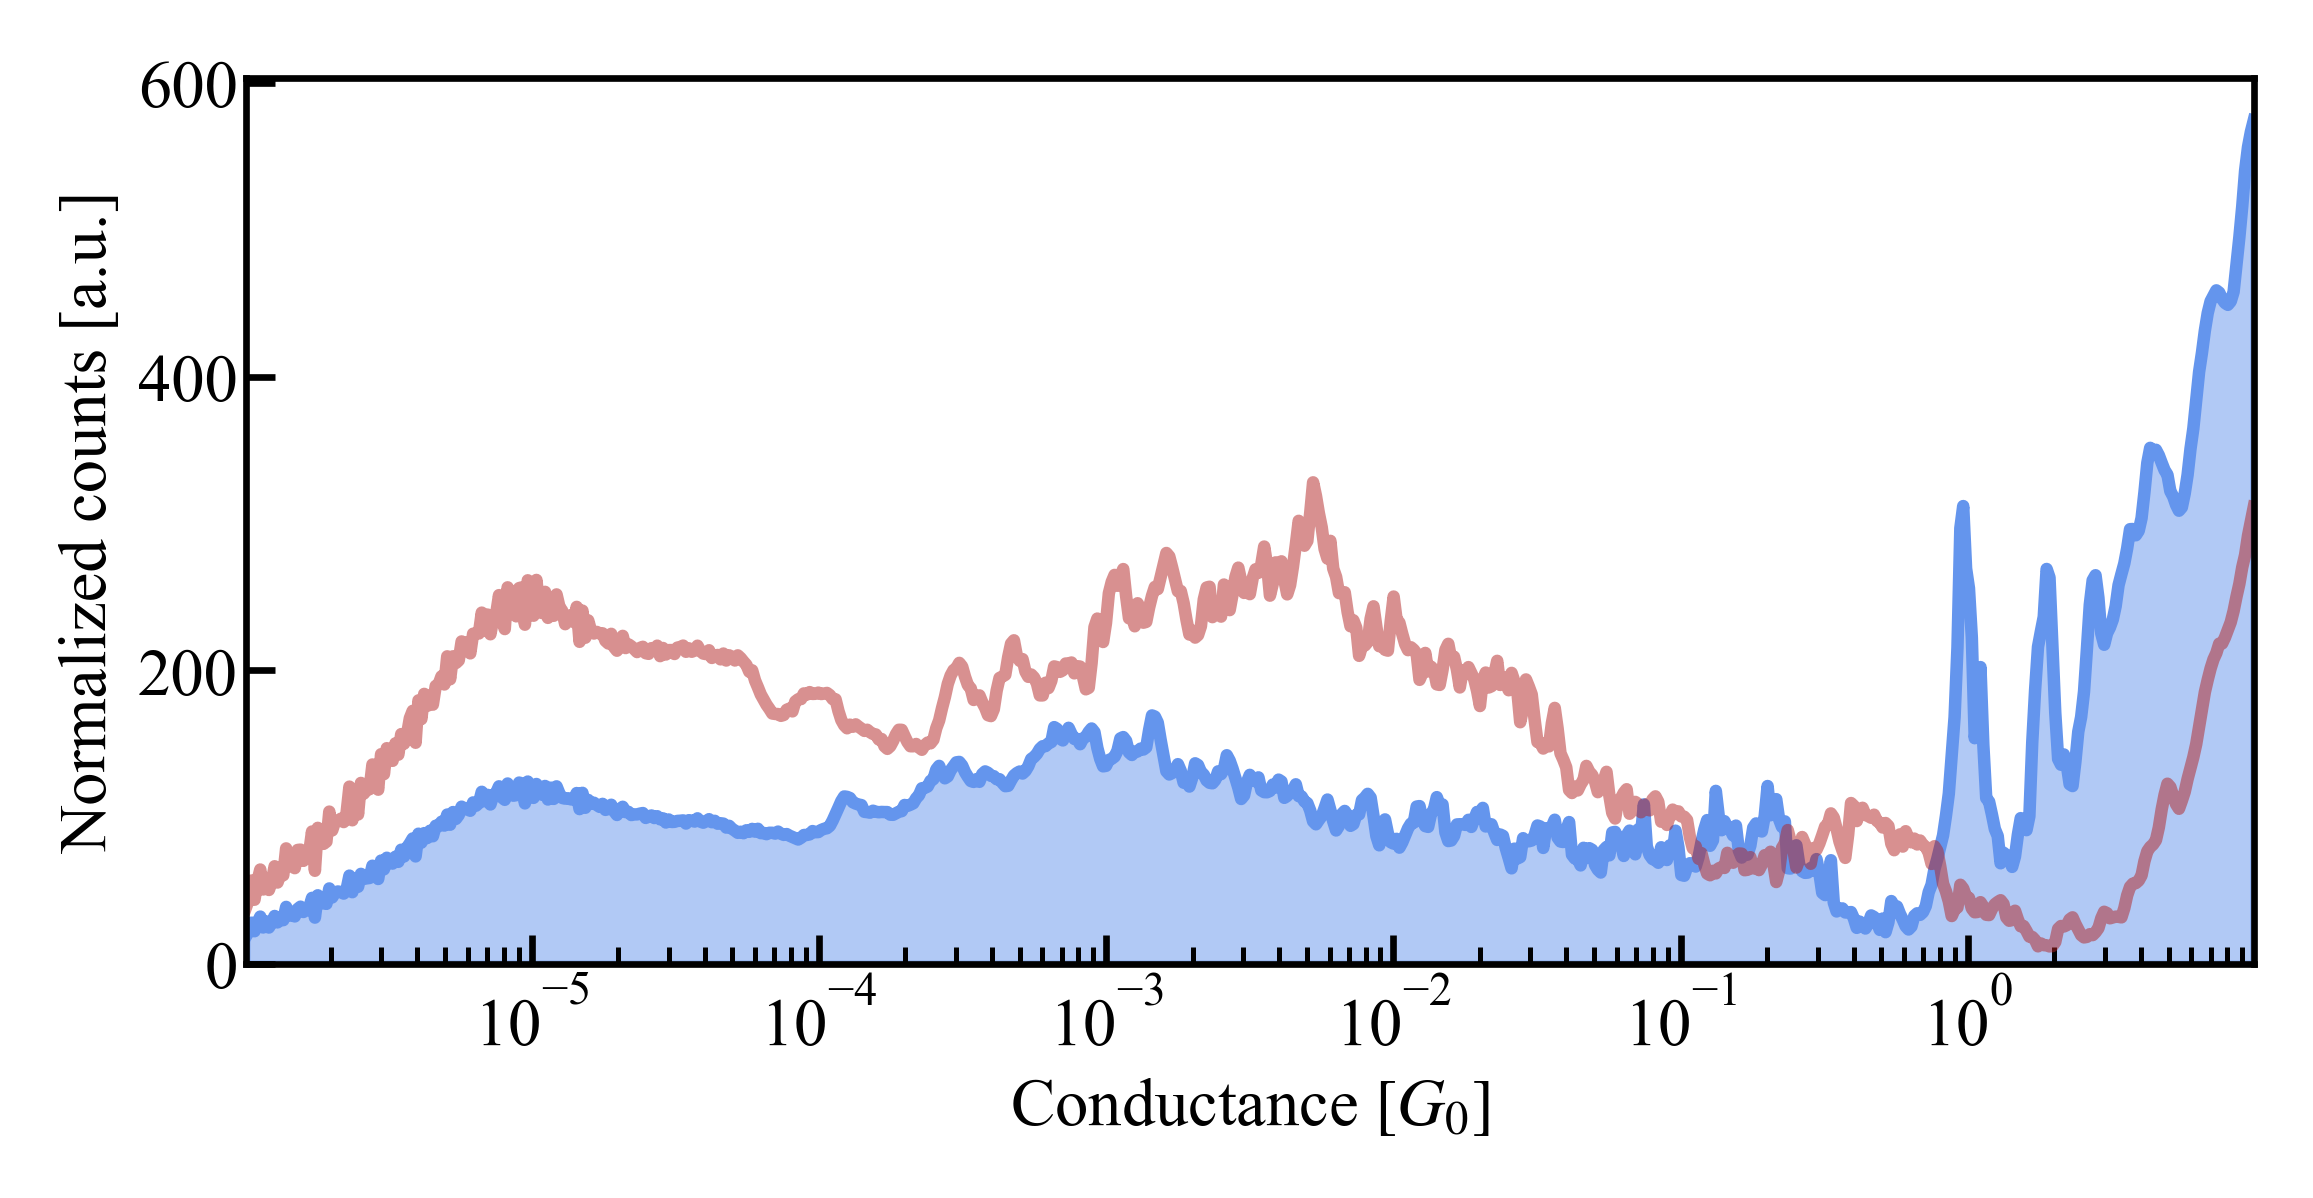

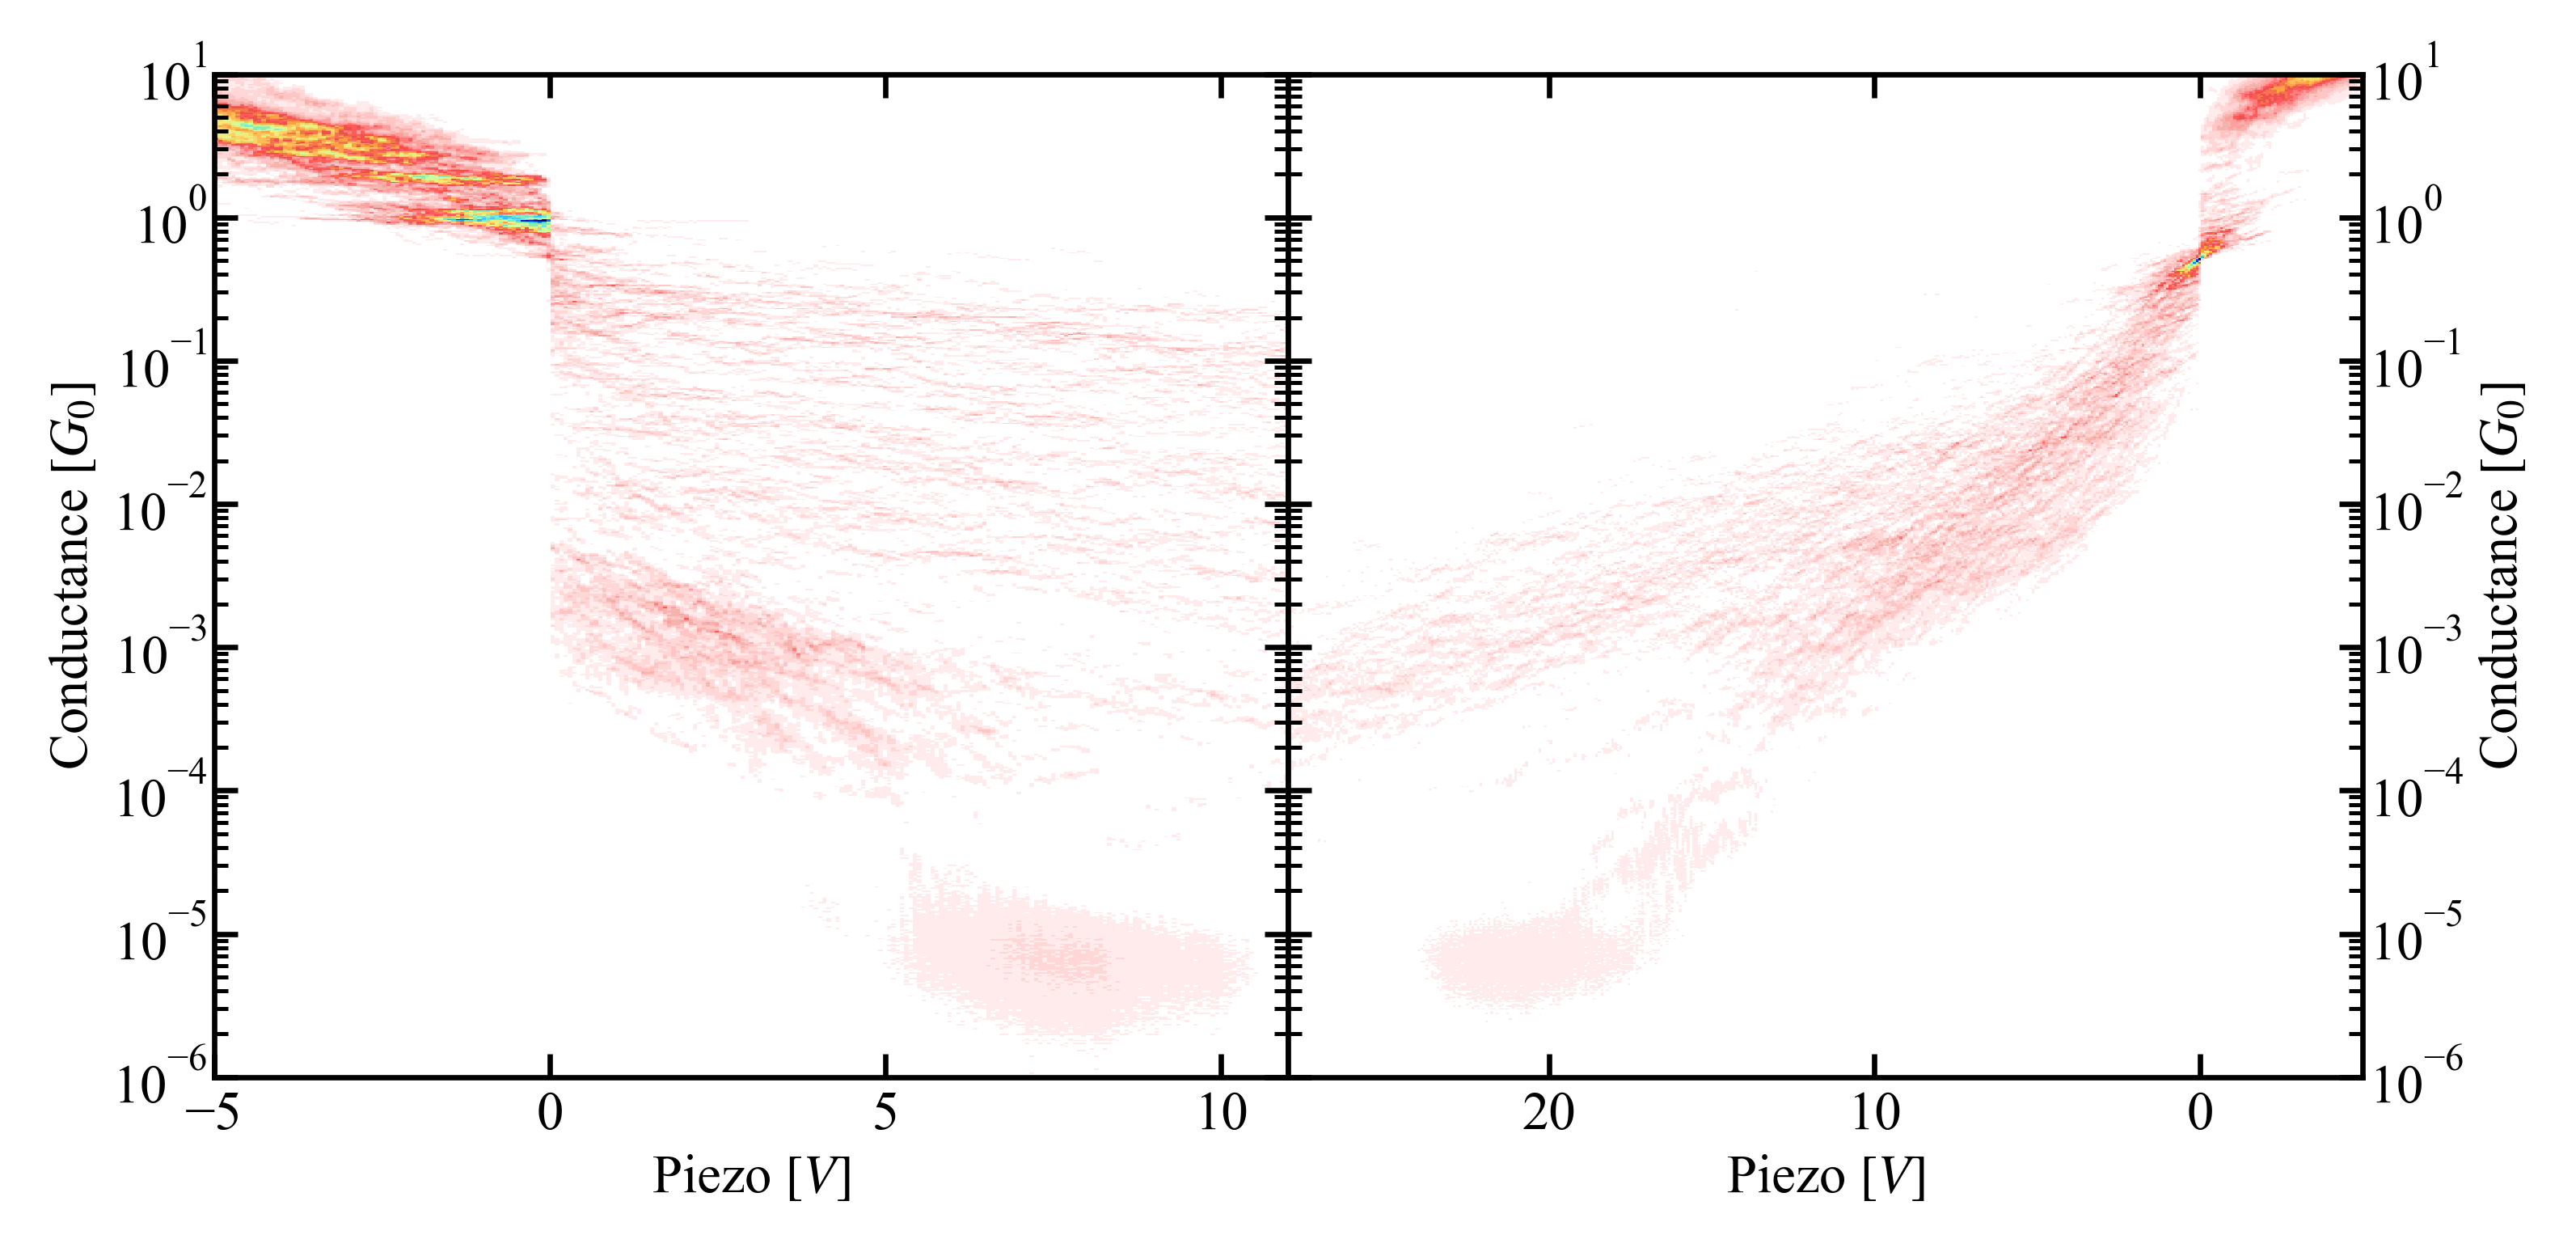

In [3]:
hist_1.plot_hist_1d()
hist_1.plot_hist_2d_both()

# After evaporation
## 201-1600

In [4]:
hist_2 = Histogram(home_folder, 201, 1600)

hist_2.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files: 100%|██████████| 15/15 [03:37<00:00, 14.51s/it]

Pull 2D histogram created from 1397 traces
Push 2D histogram created from 1400 traces


(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

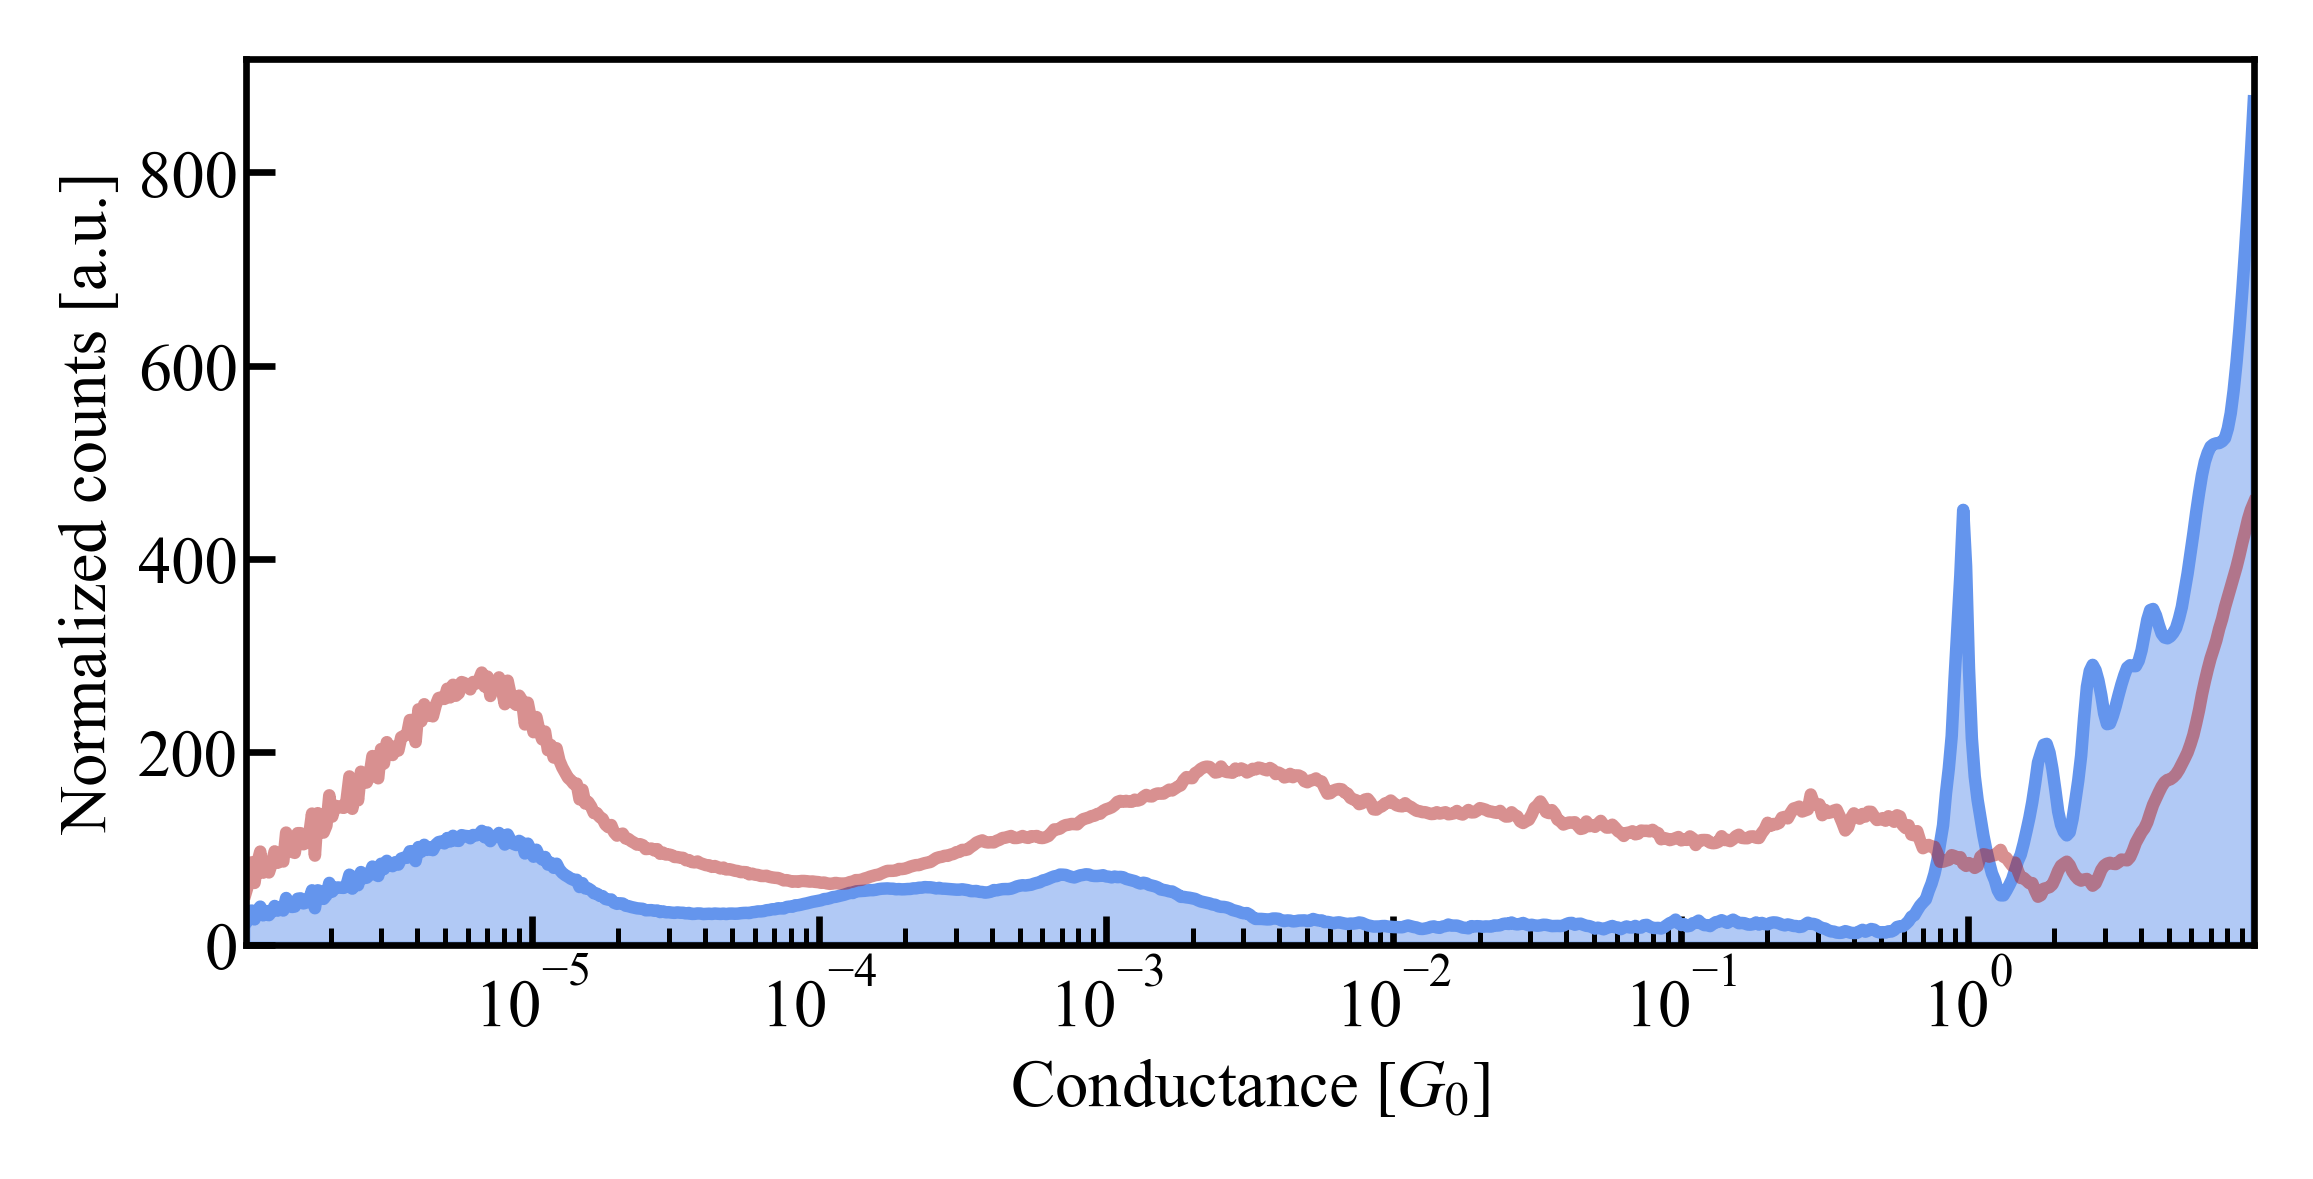

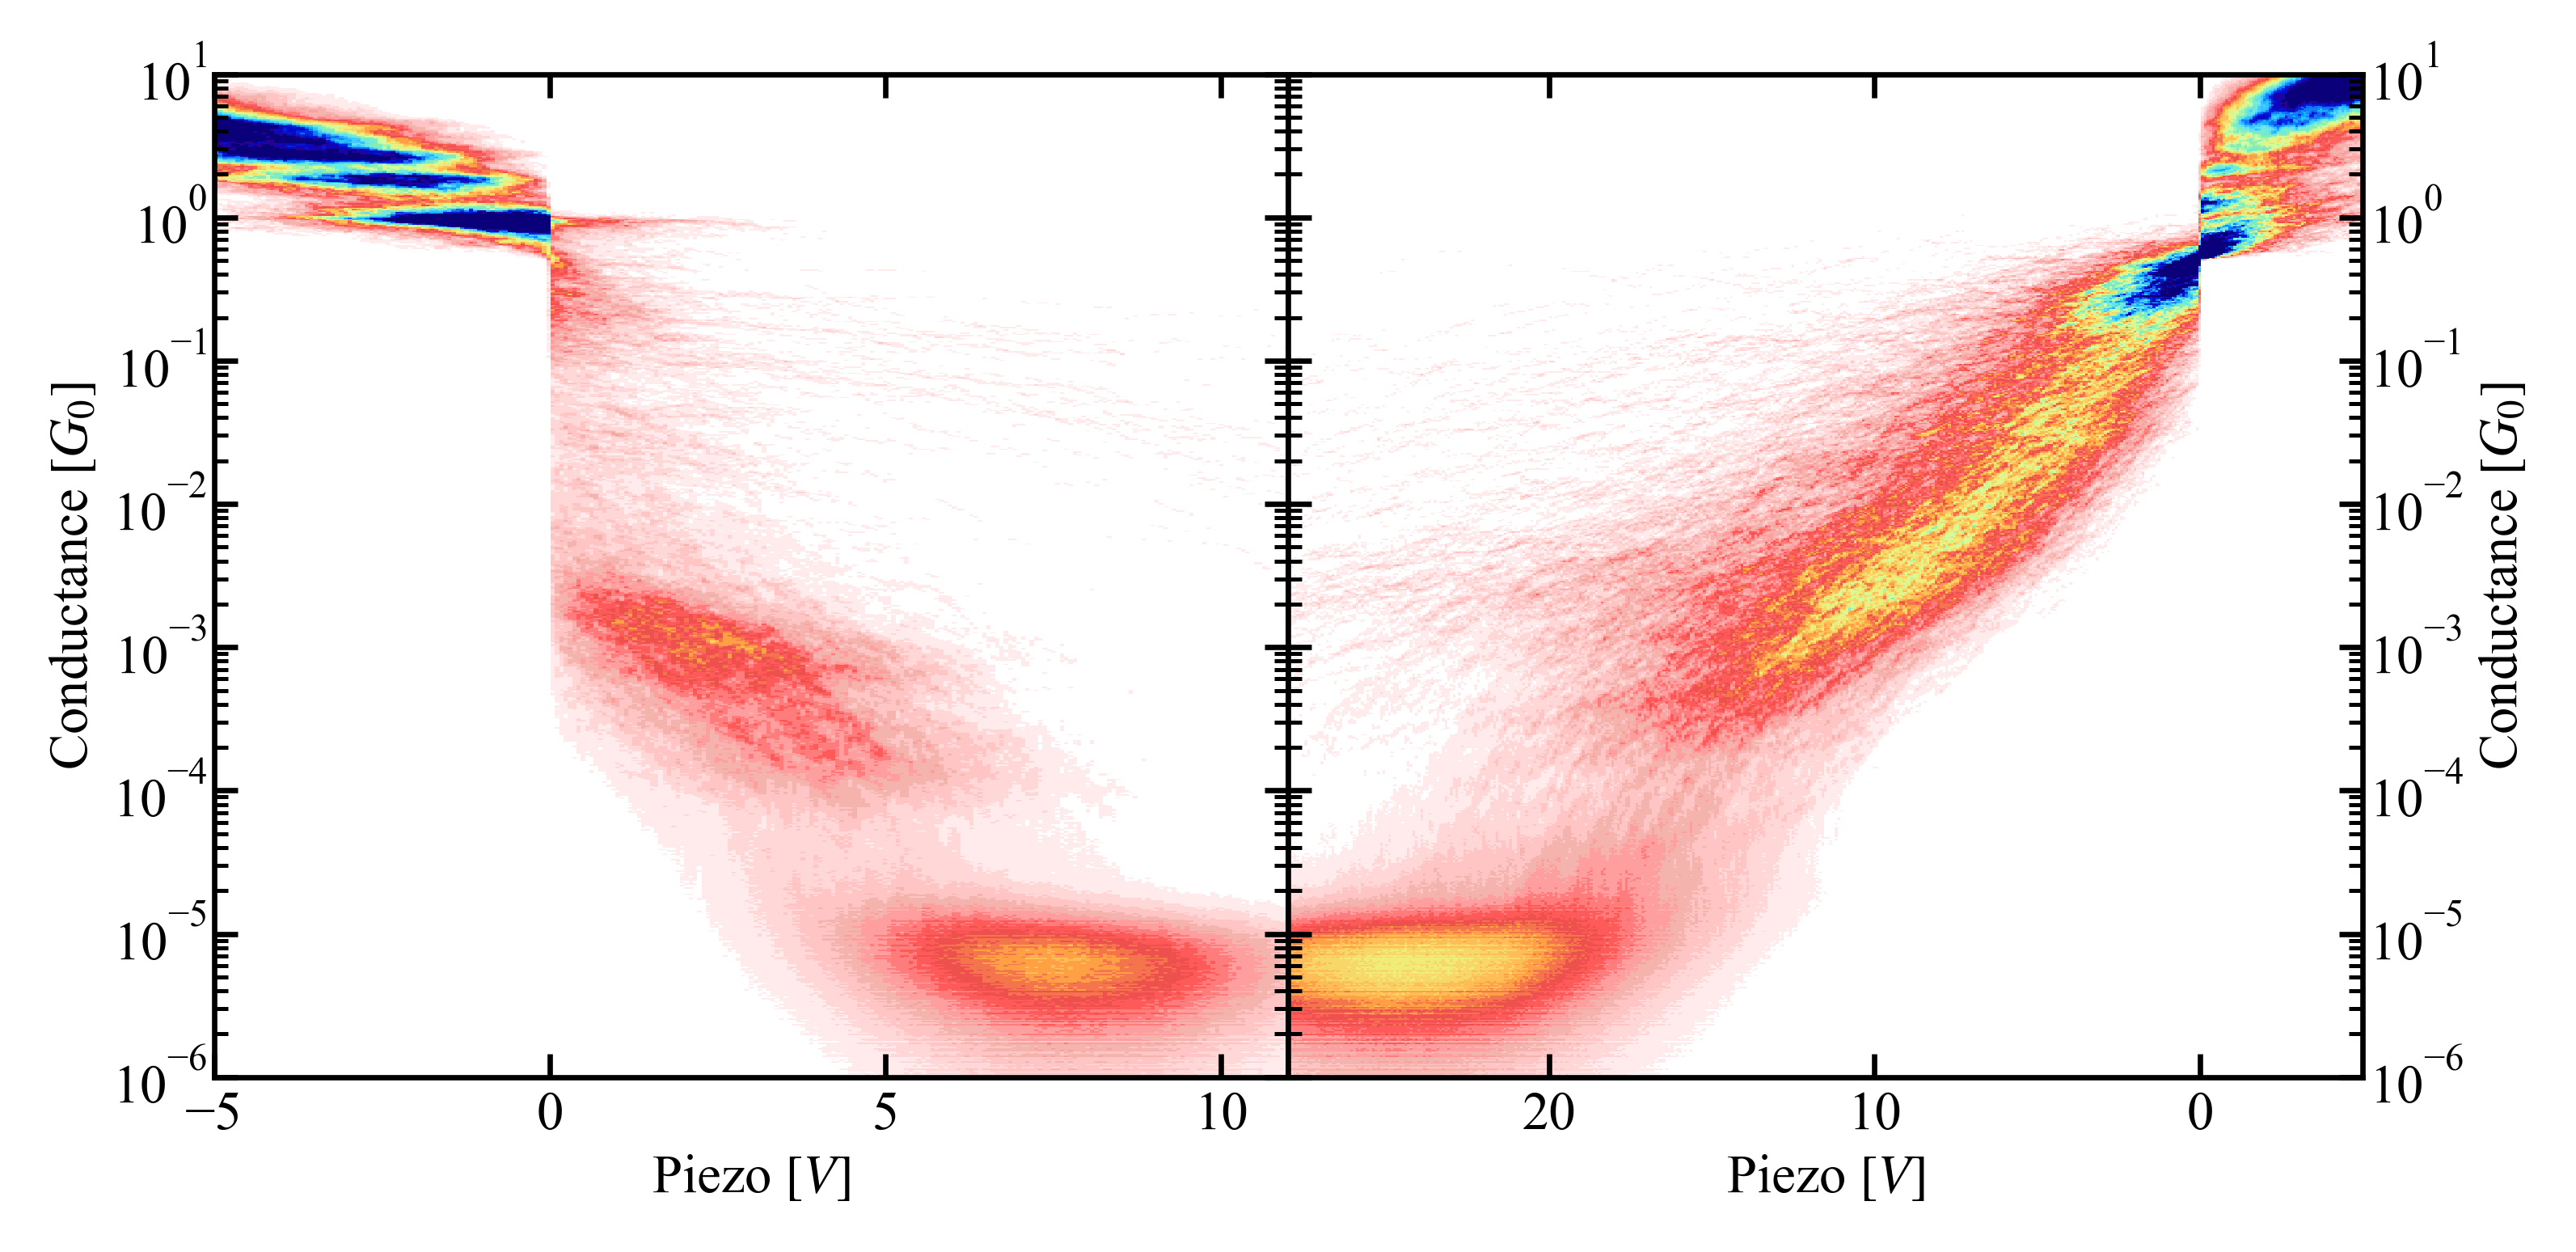

In [5]:
hist_2.plot_hist_1d()
hist_2.plot_hist_2d_both(vmax=5000)

## 5734-7001

In [6]:
hist_3 = Histogram(home_folder, 5734, 7001)

hist_3.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files: 100%|██████████| 14/14 [03:31<00:00, 15.13s/it]

Pull 2D histogram created from 1267 traces
Push 2D histogram created from 1268 traces


(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

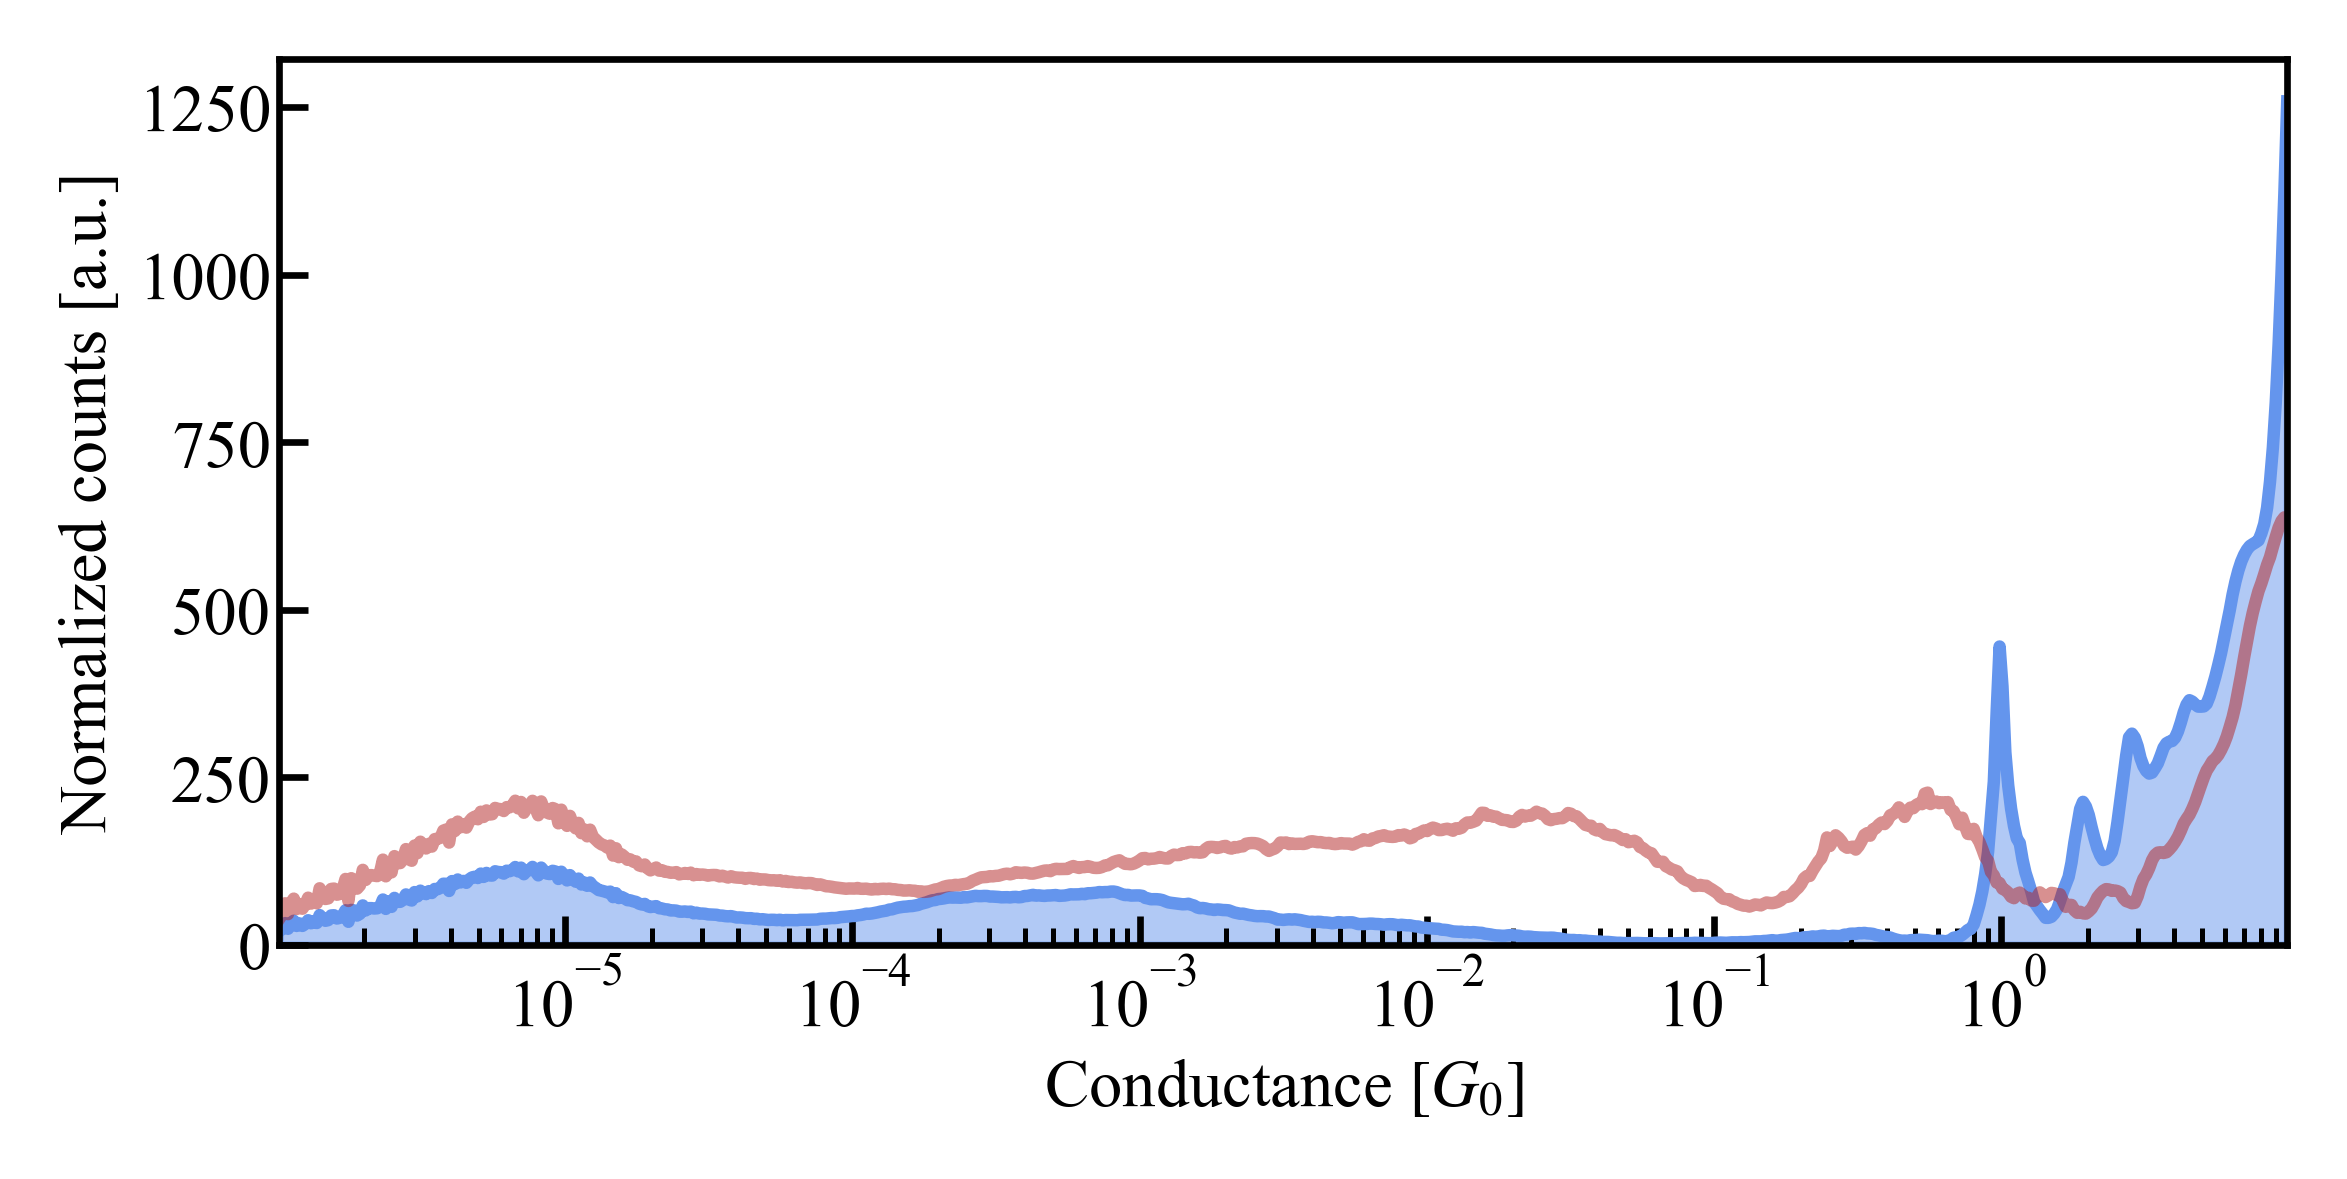

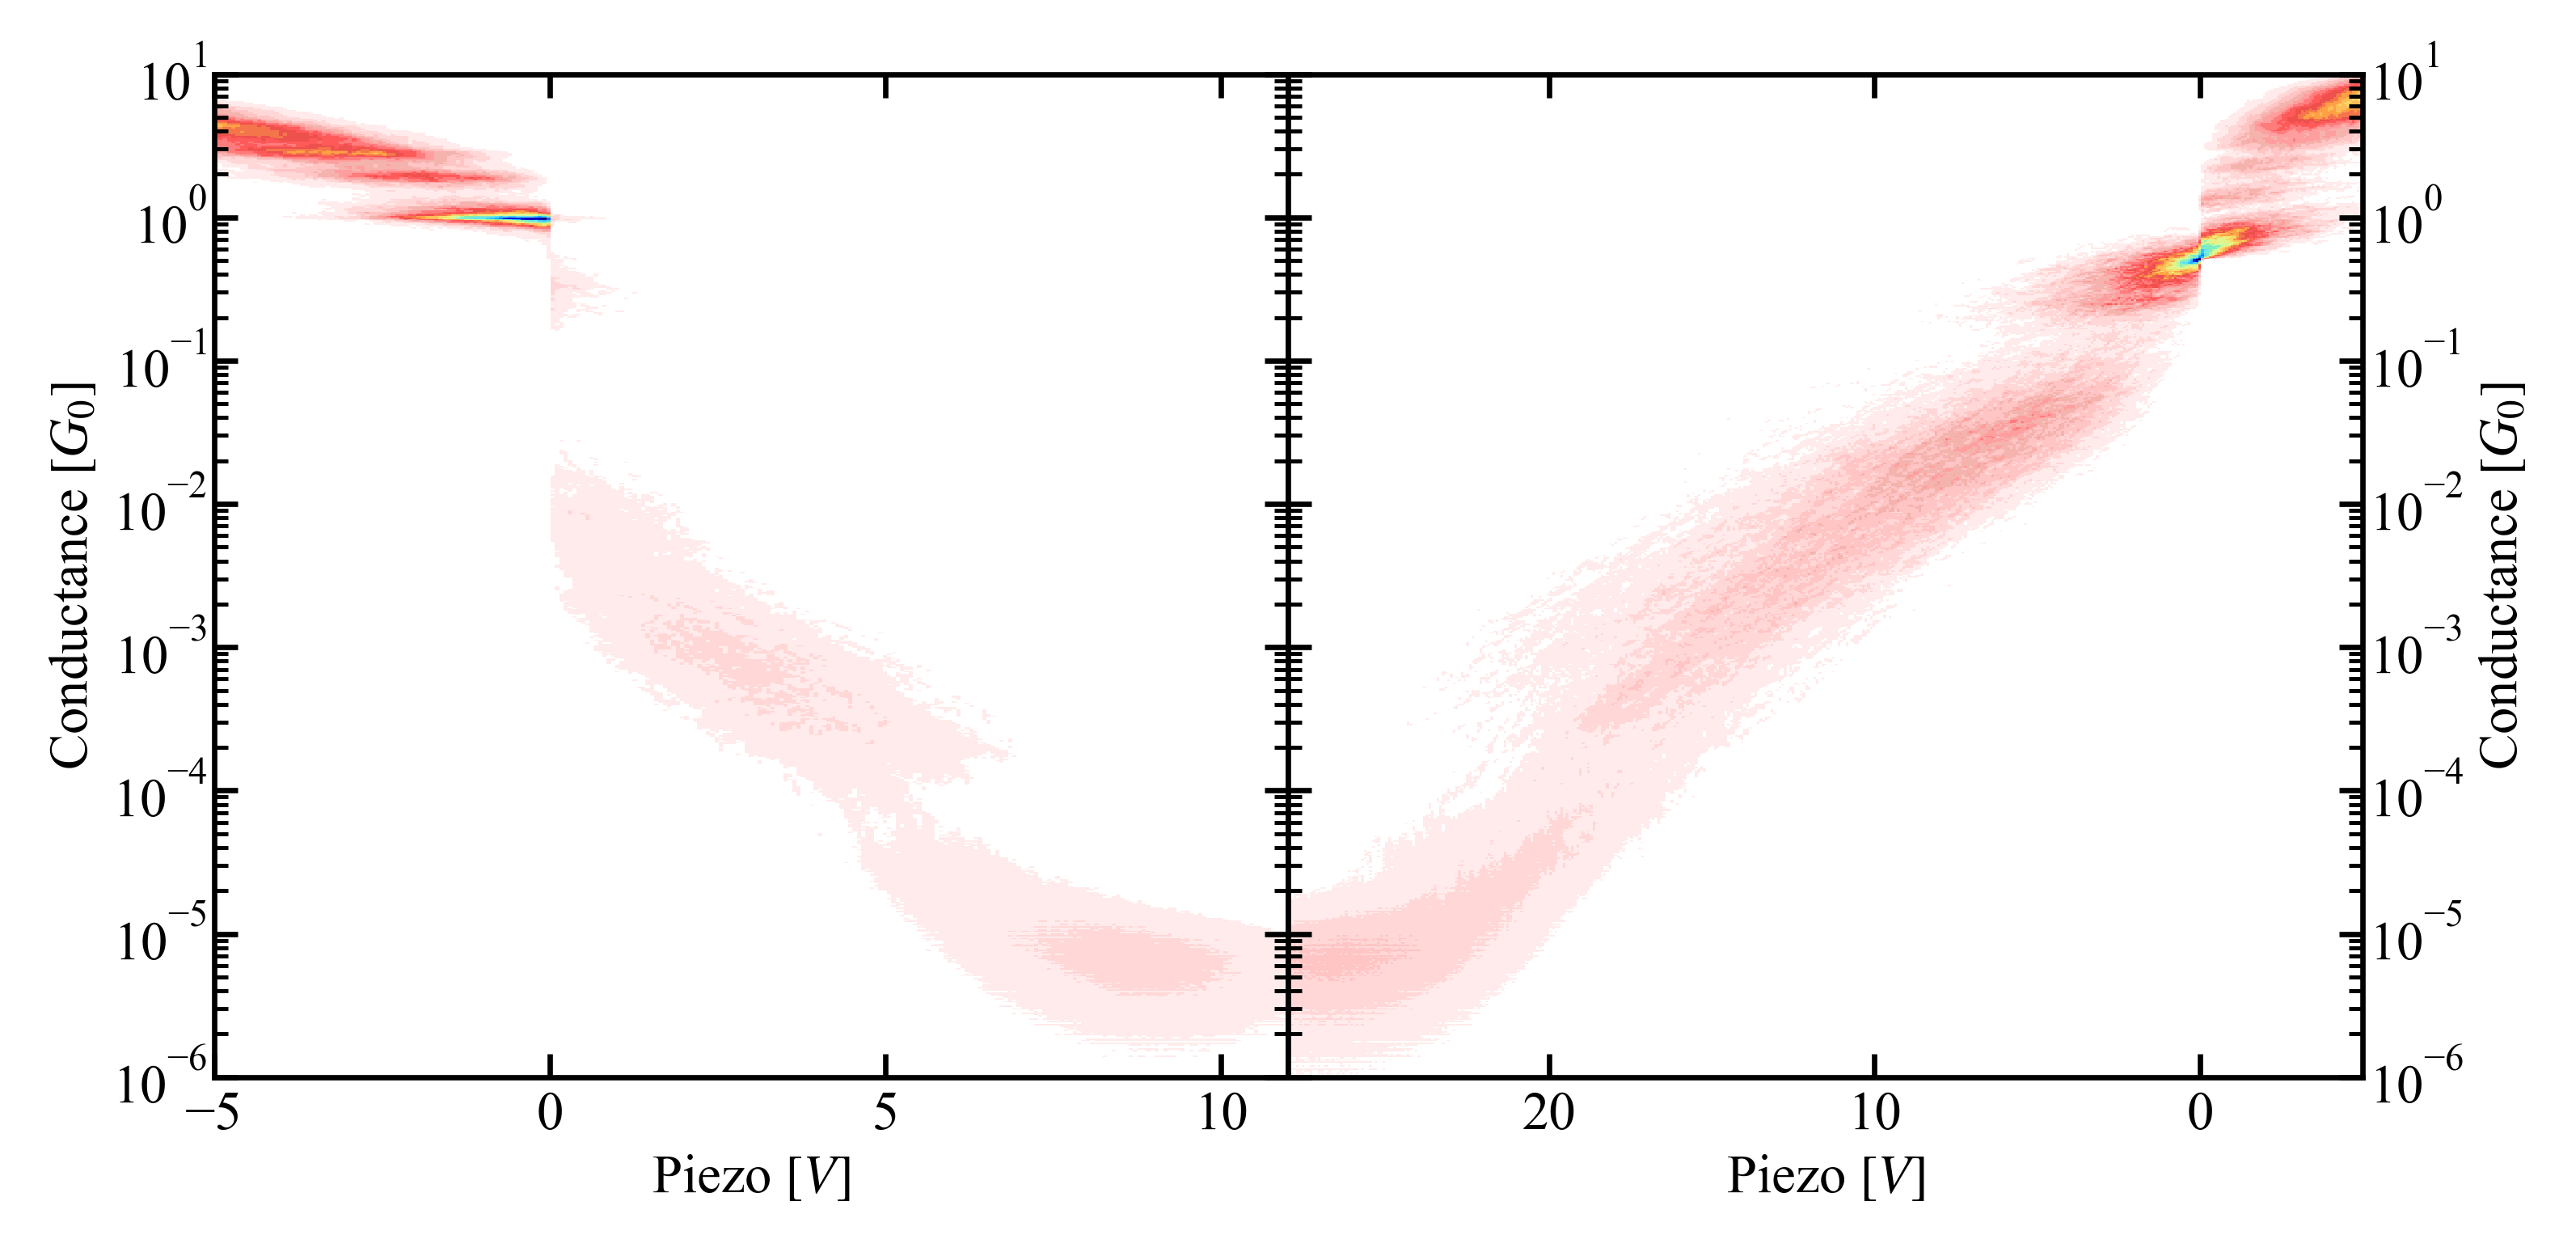

In [7]:
hist_3.plot_hist_1d()
hist_3.plot_hist_2d_both()

## 12649-14400

In [8]:
hist_4 = Histogram(home_folder, 12649, 14400)

hist_4.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files: 100%|██████████| 19/19 [05:50<00:00, 18.44s/it]

Pull 2D histogram created from 1749 traces
Push 2D histogram created from 1752 traces


(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

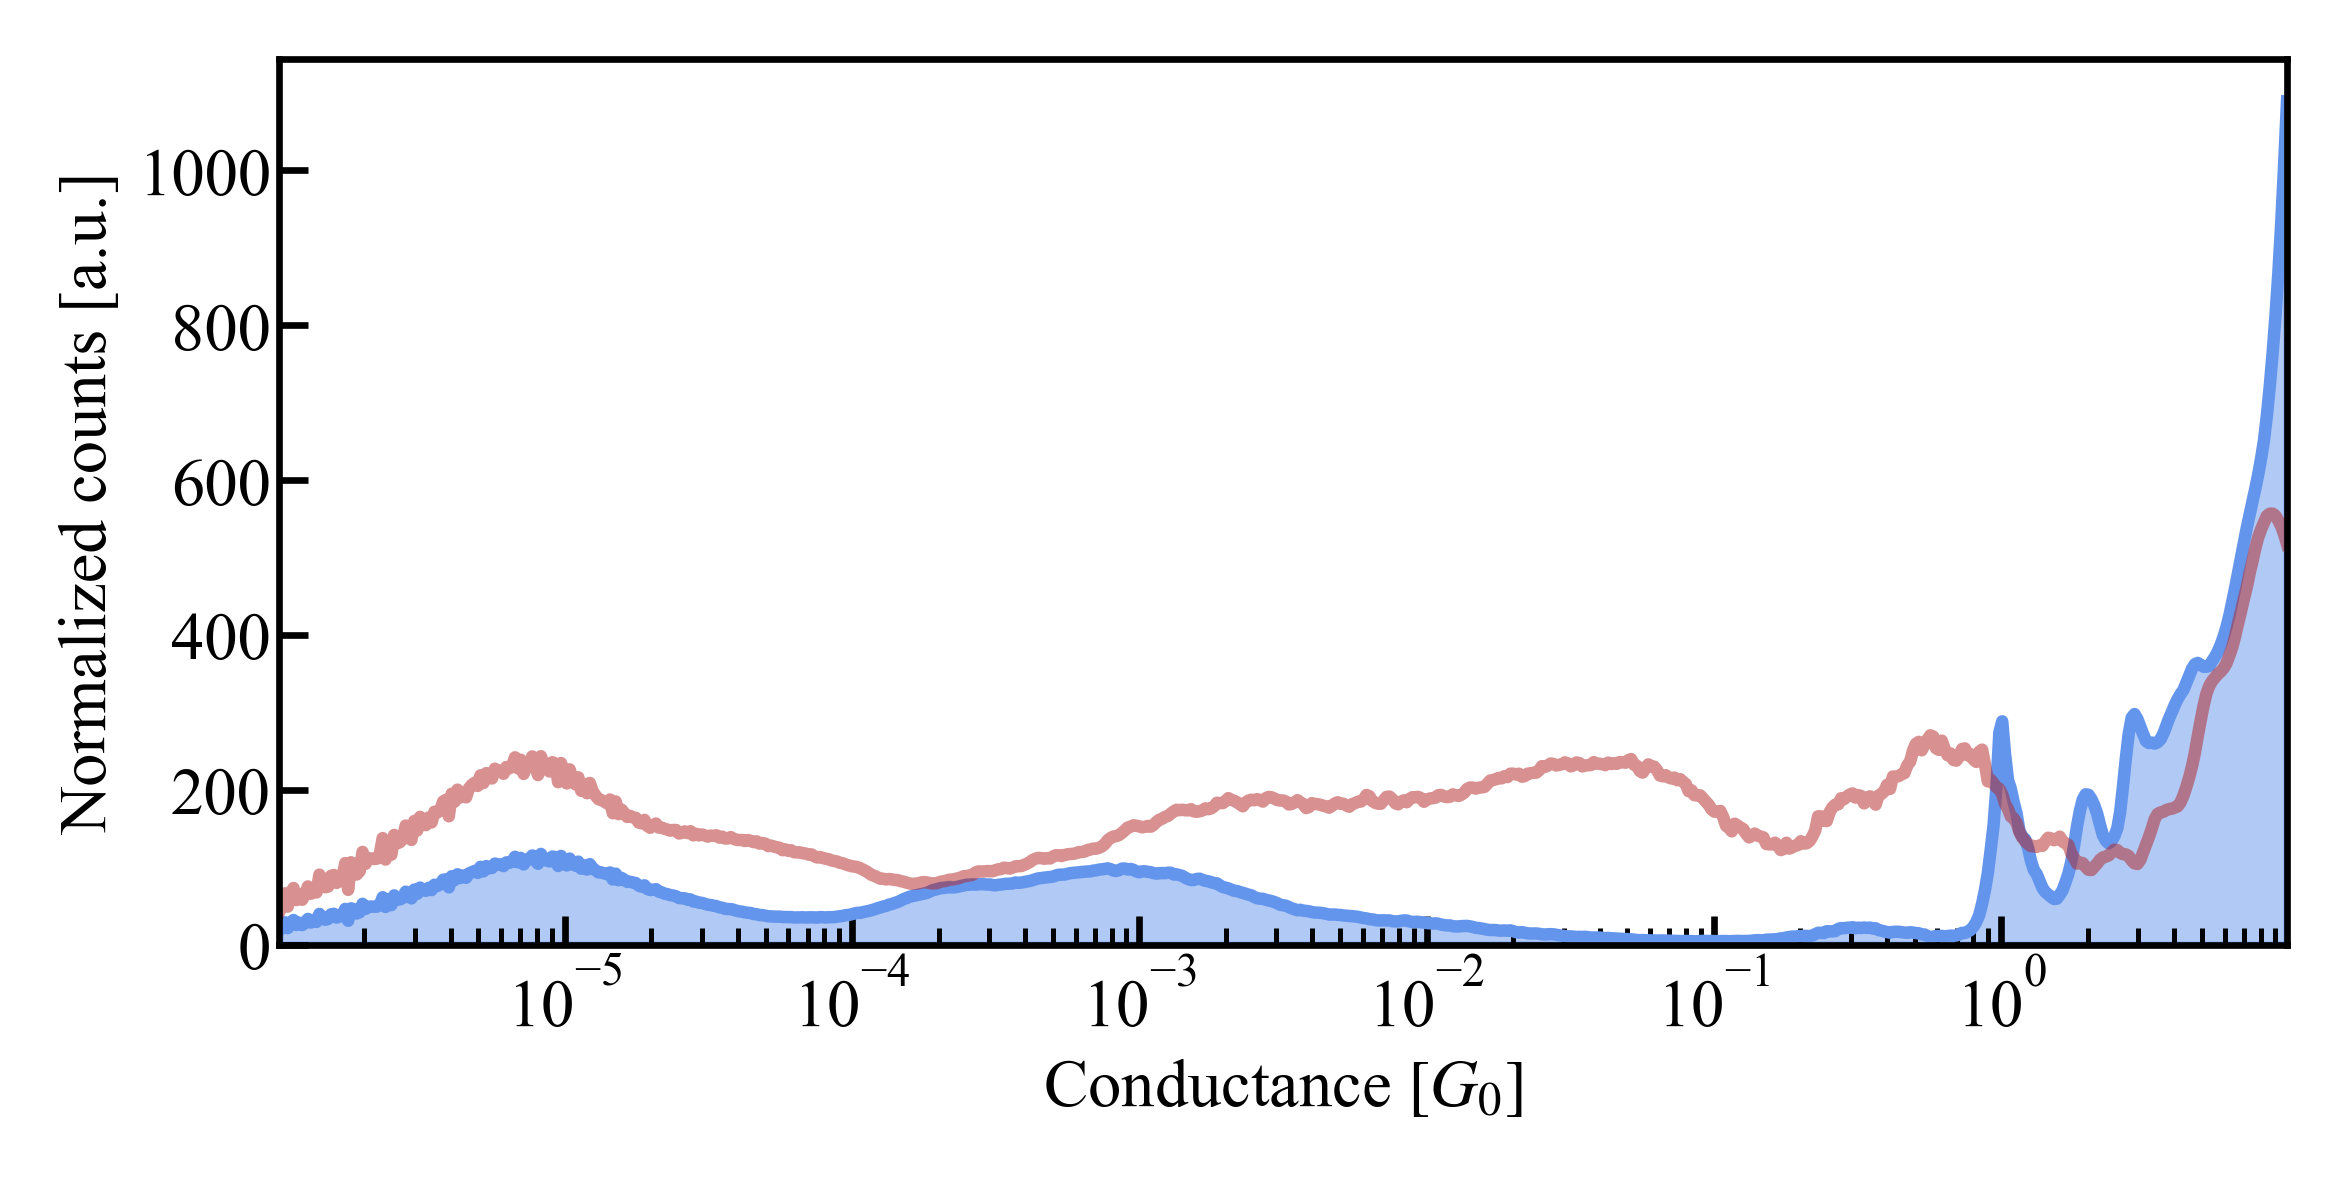

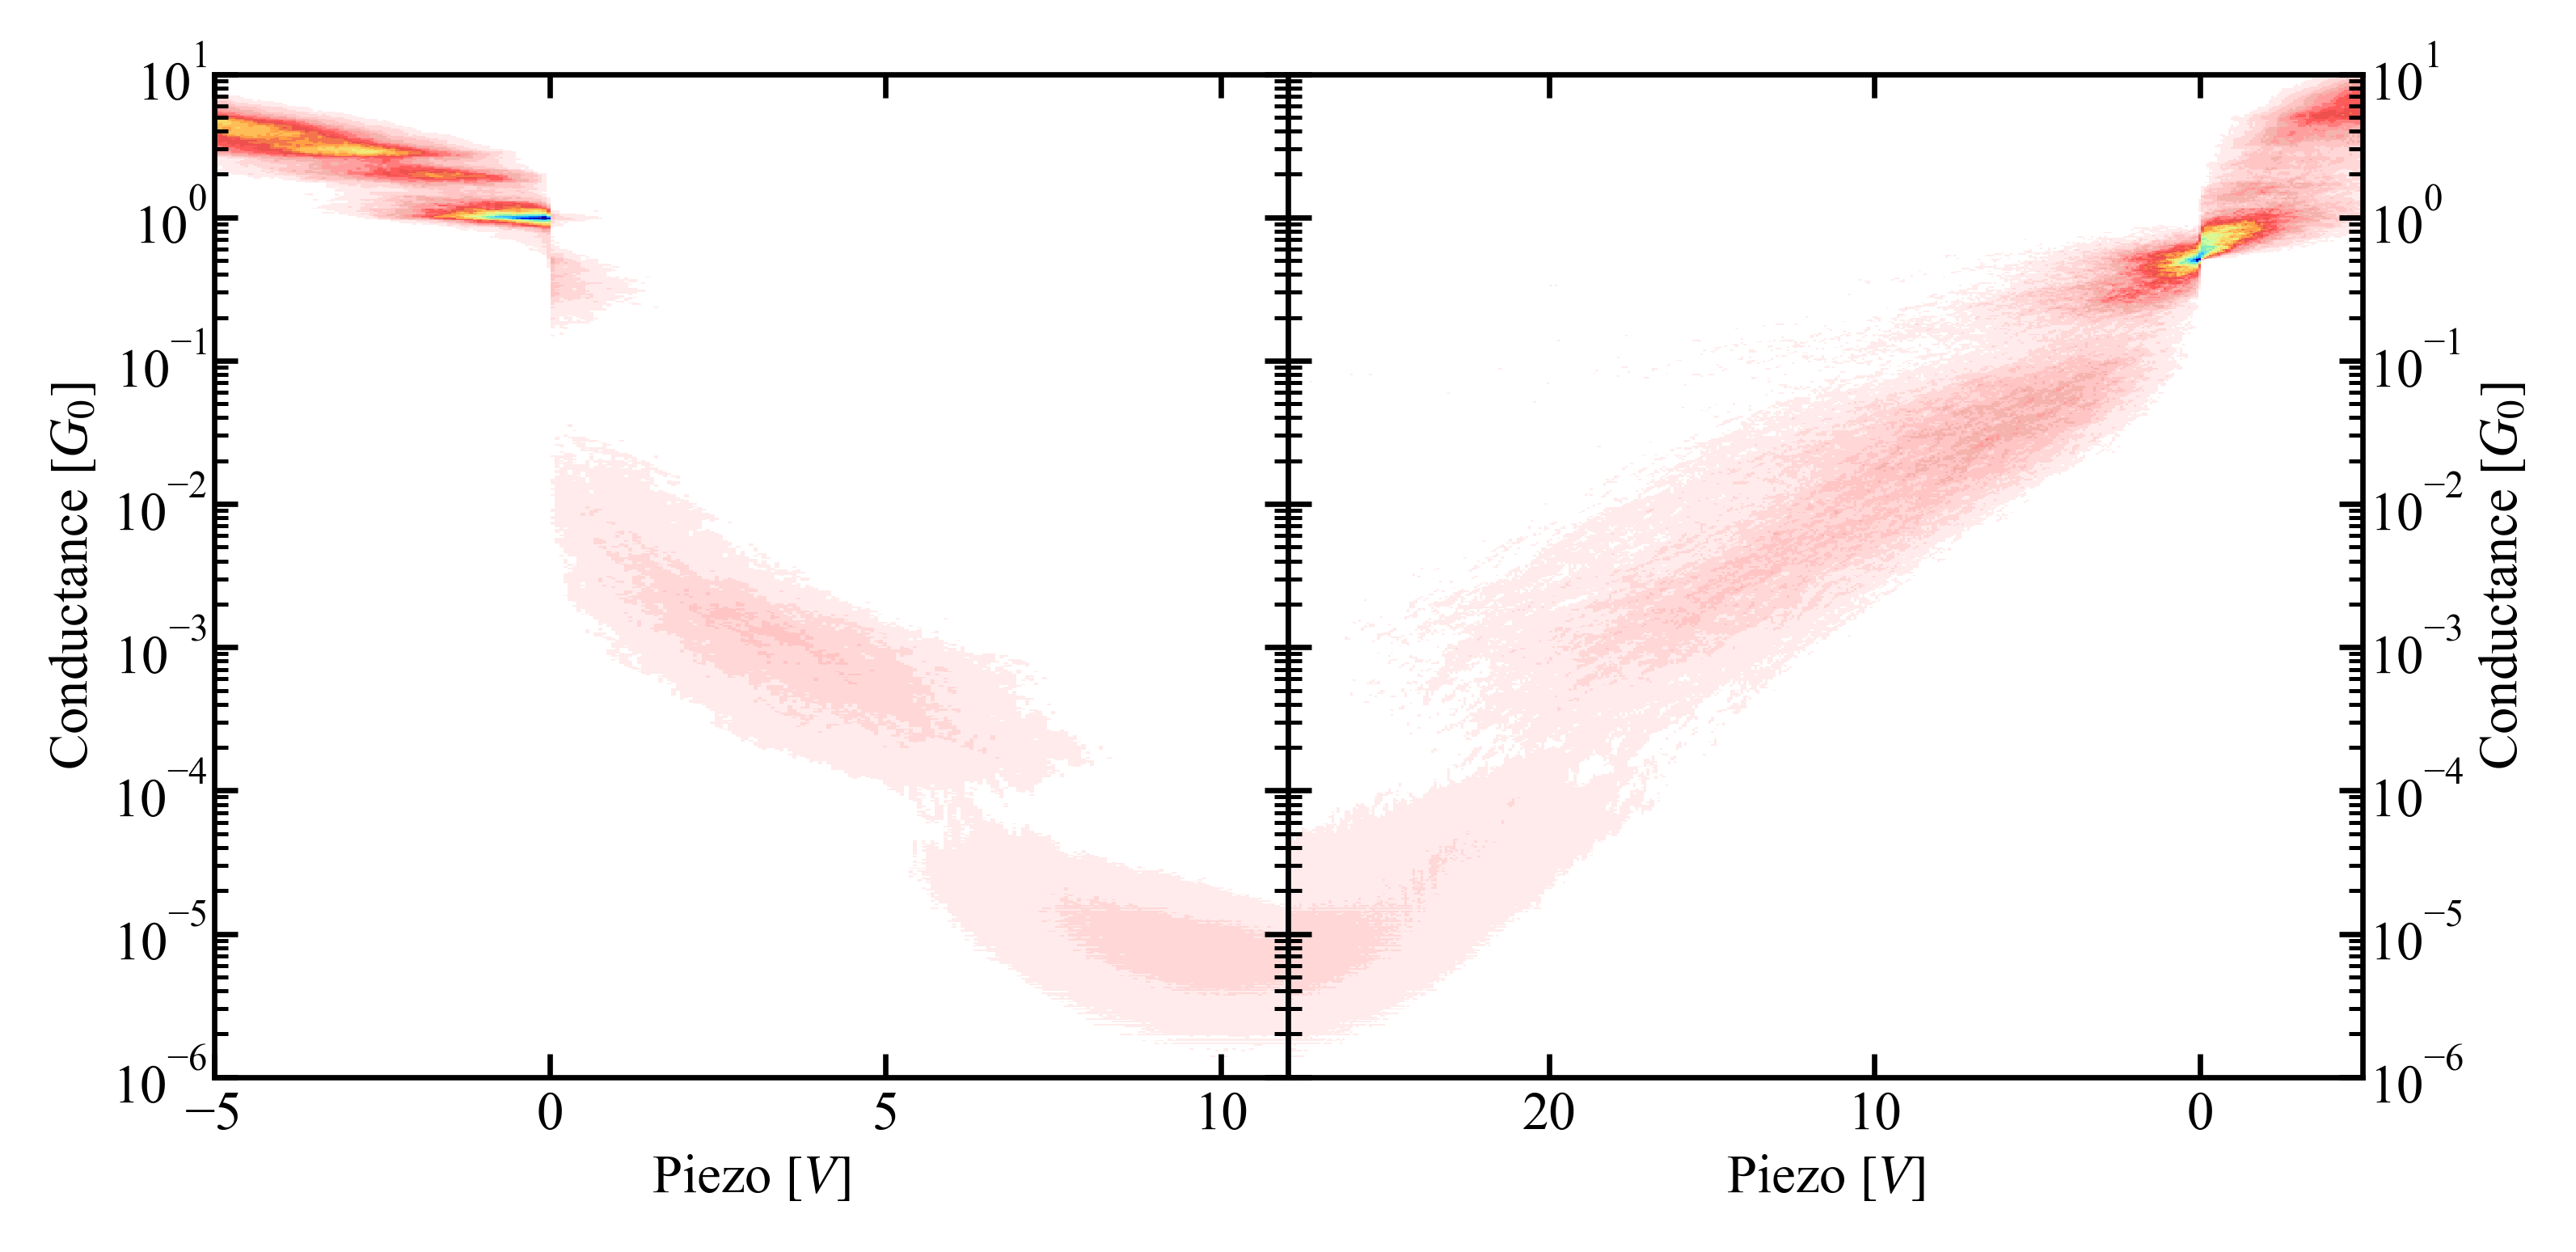

In [9]:
hist_4.plot_hist_1d()
hist_4.plot_hist_2d_both()

## 19576-20045

In [10]:
hist_5 = Histogram(home_folder, 19576, 20045)

hist_5.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files: 100%|██████████| 6/6 [04:18<00:00, 43.05s/it]

Pull 2D histogram created from 469 traces
Push 2D histogram created from 470 traces


(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

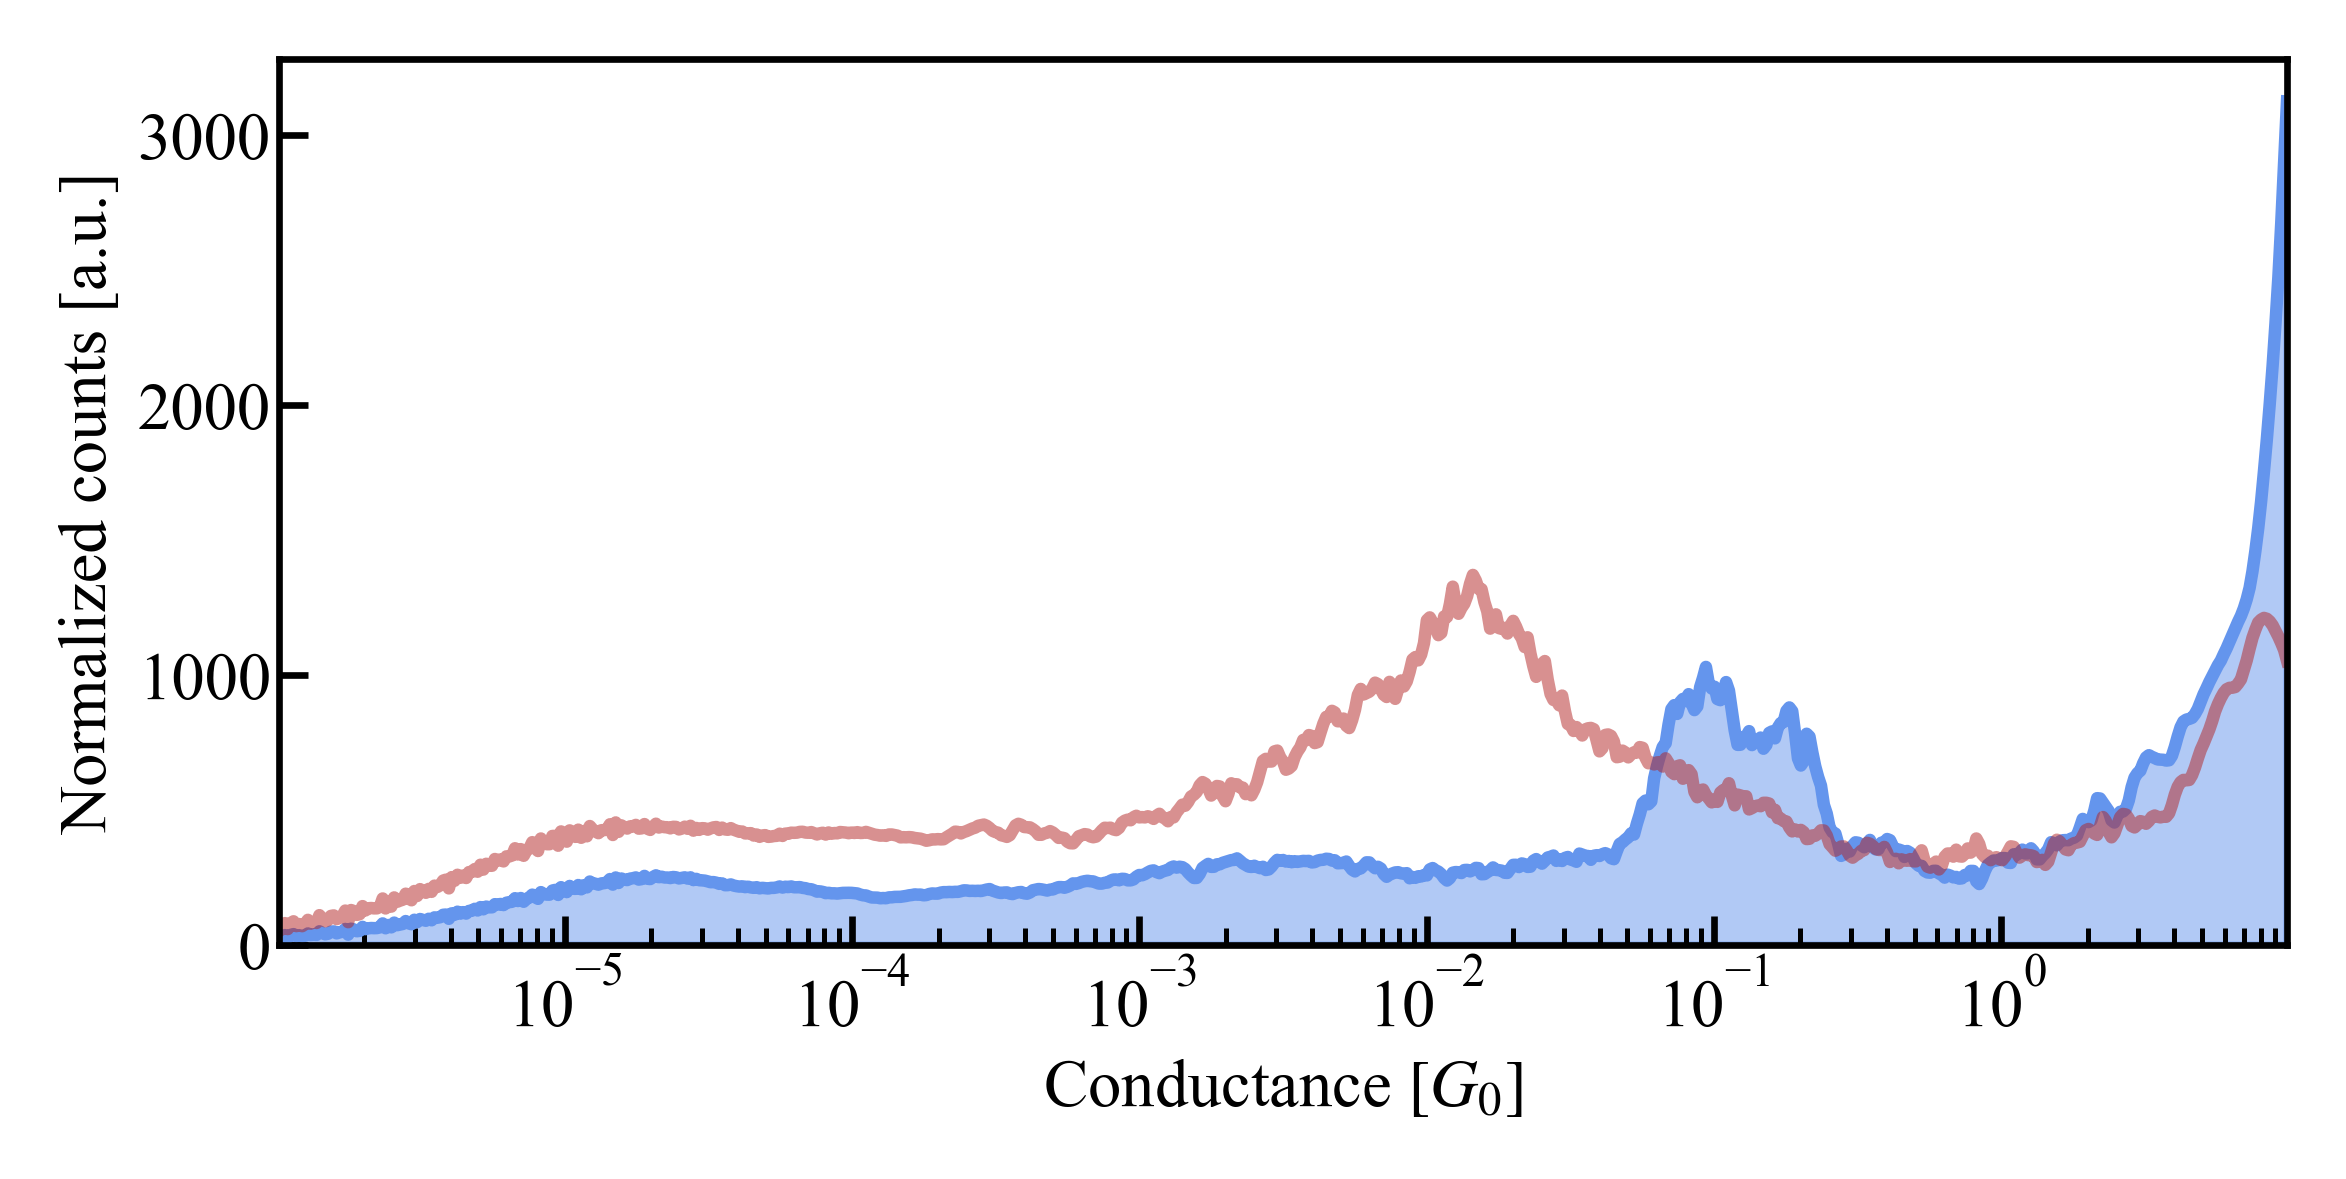

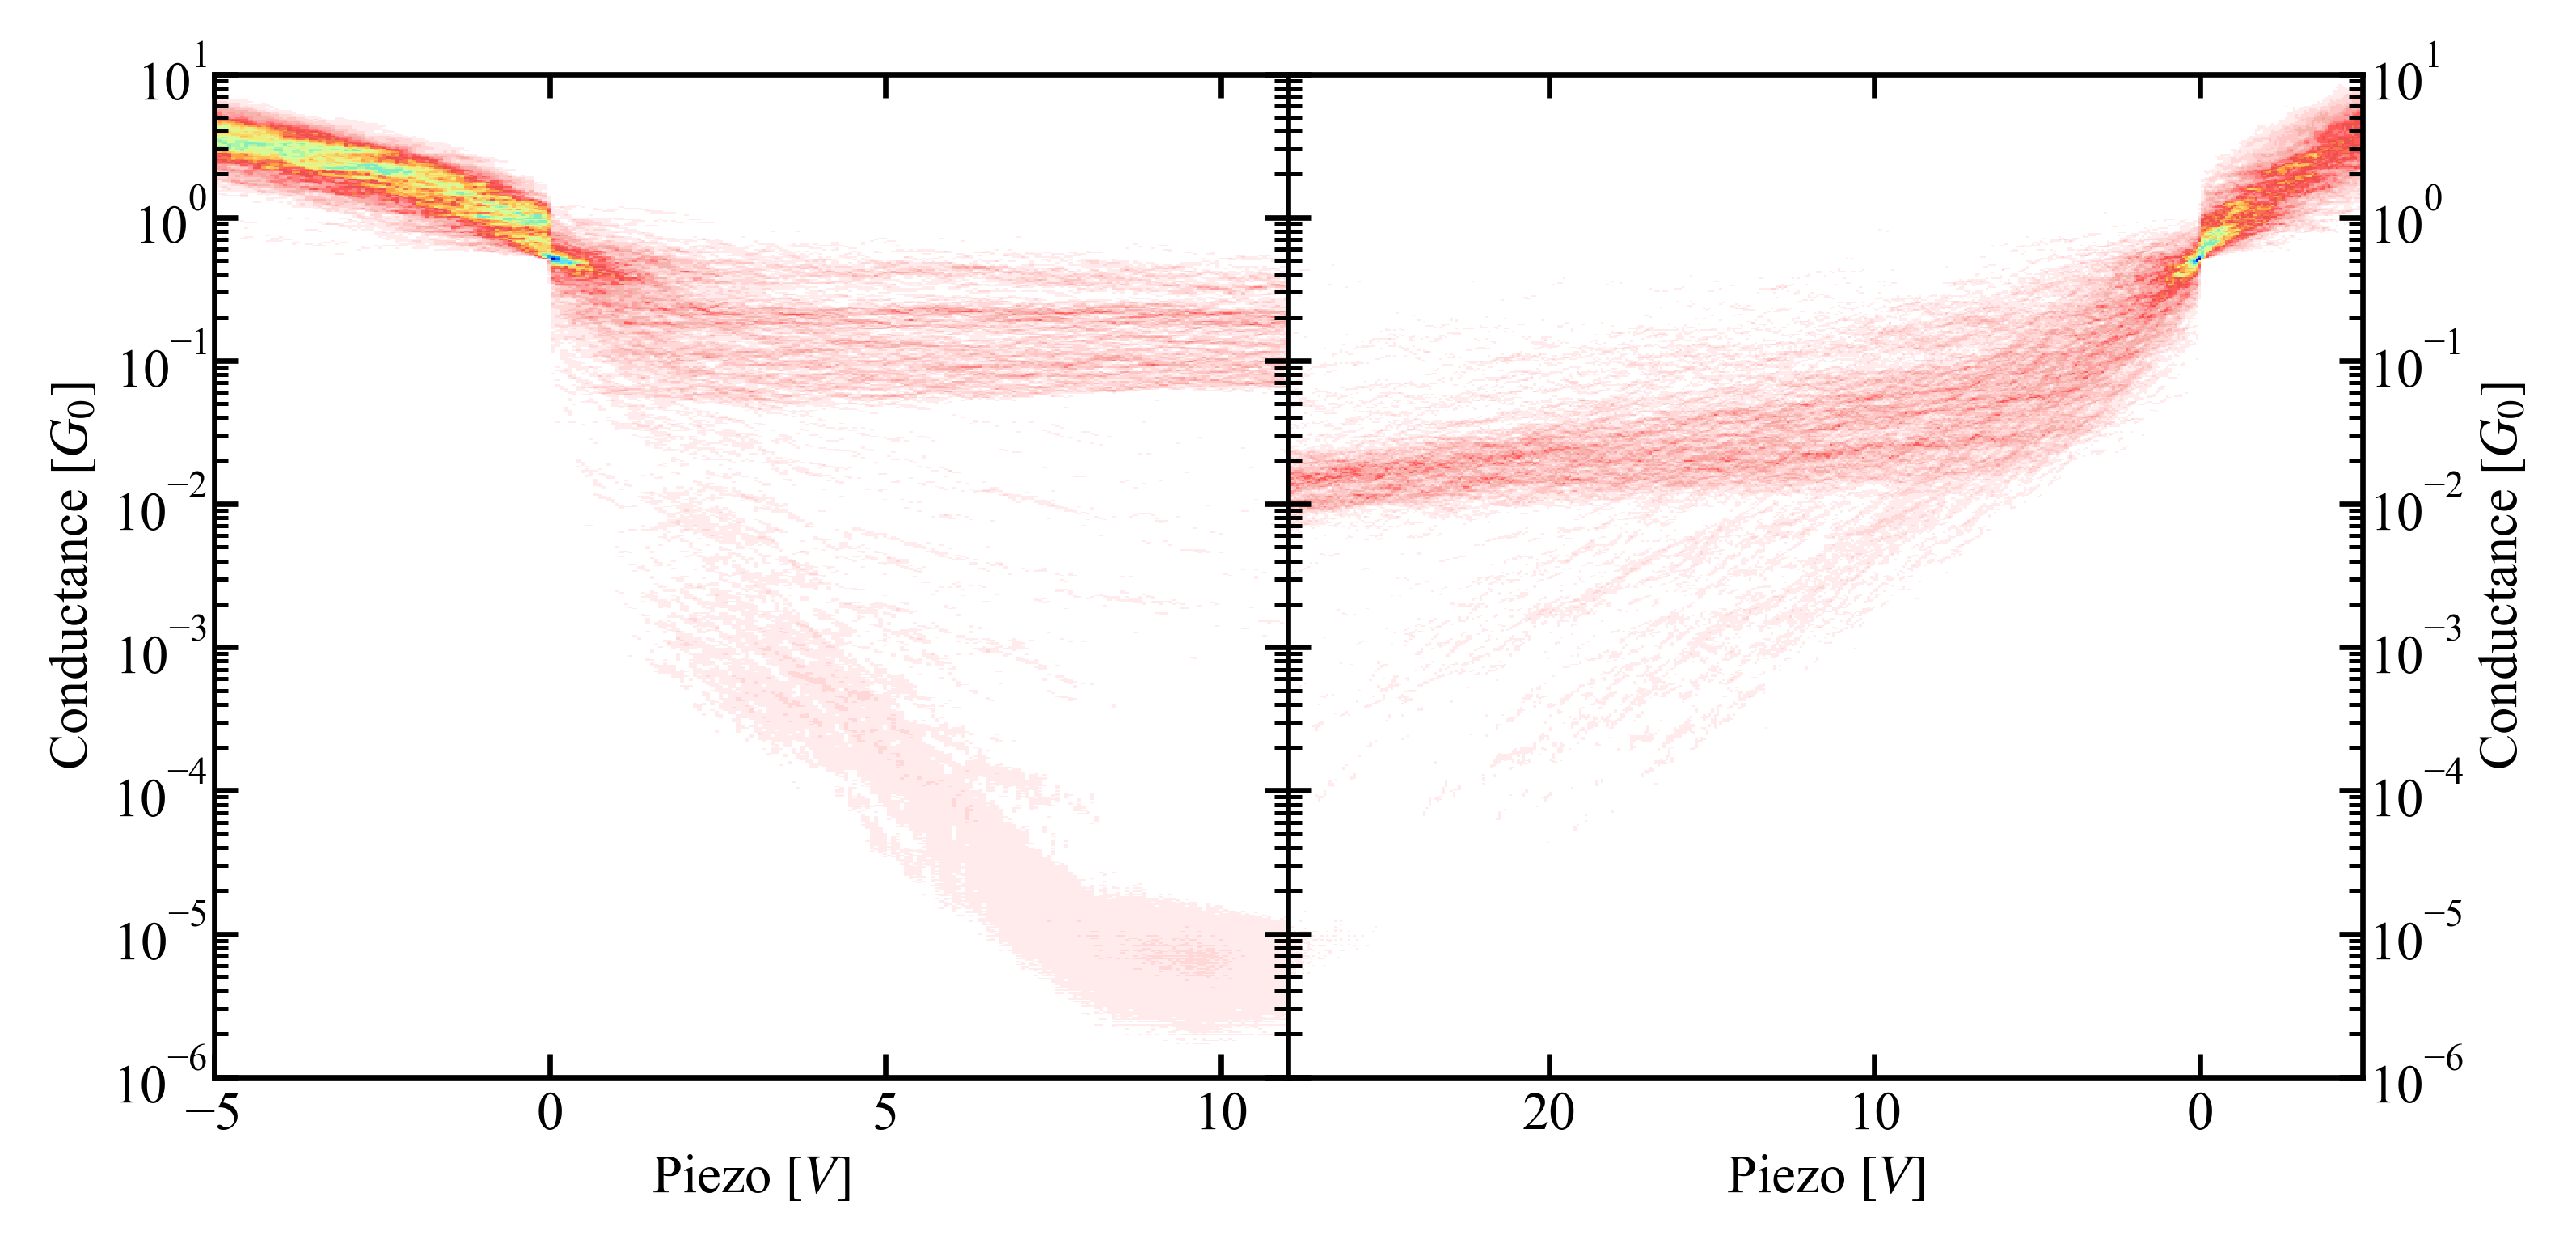

In [11]:
hist_5.plot_hist_1d()
hist_5.plot_hist_2d_both()

## 23318-25200

In [12]:
hist_6 = Histogram(home_folder, 23318, 25200)

hist_6.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files: 100%|██████████| 20/20 [06:09<00:00, 18.48s/it]

Pull 2D histogram created from 1877 traces
Push 2D histogram created from 1883 traces


(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

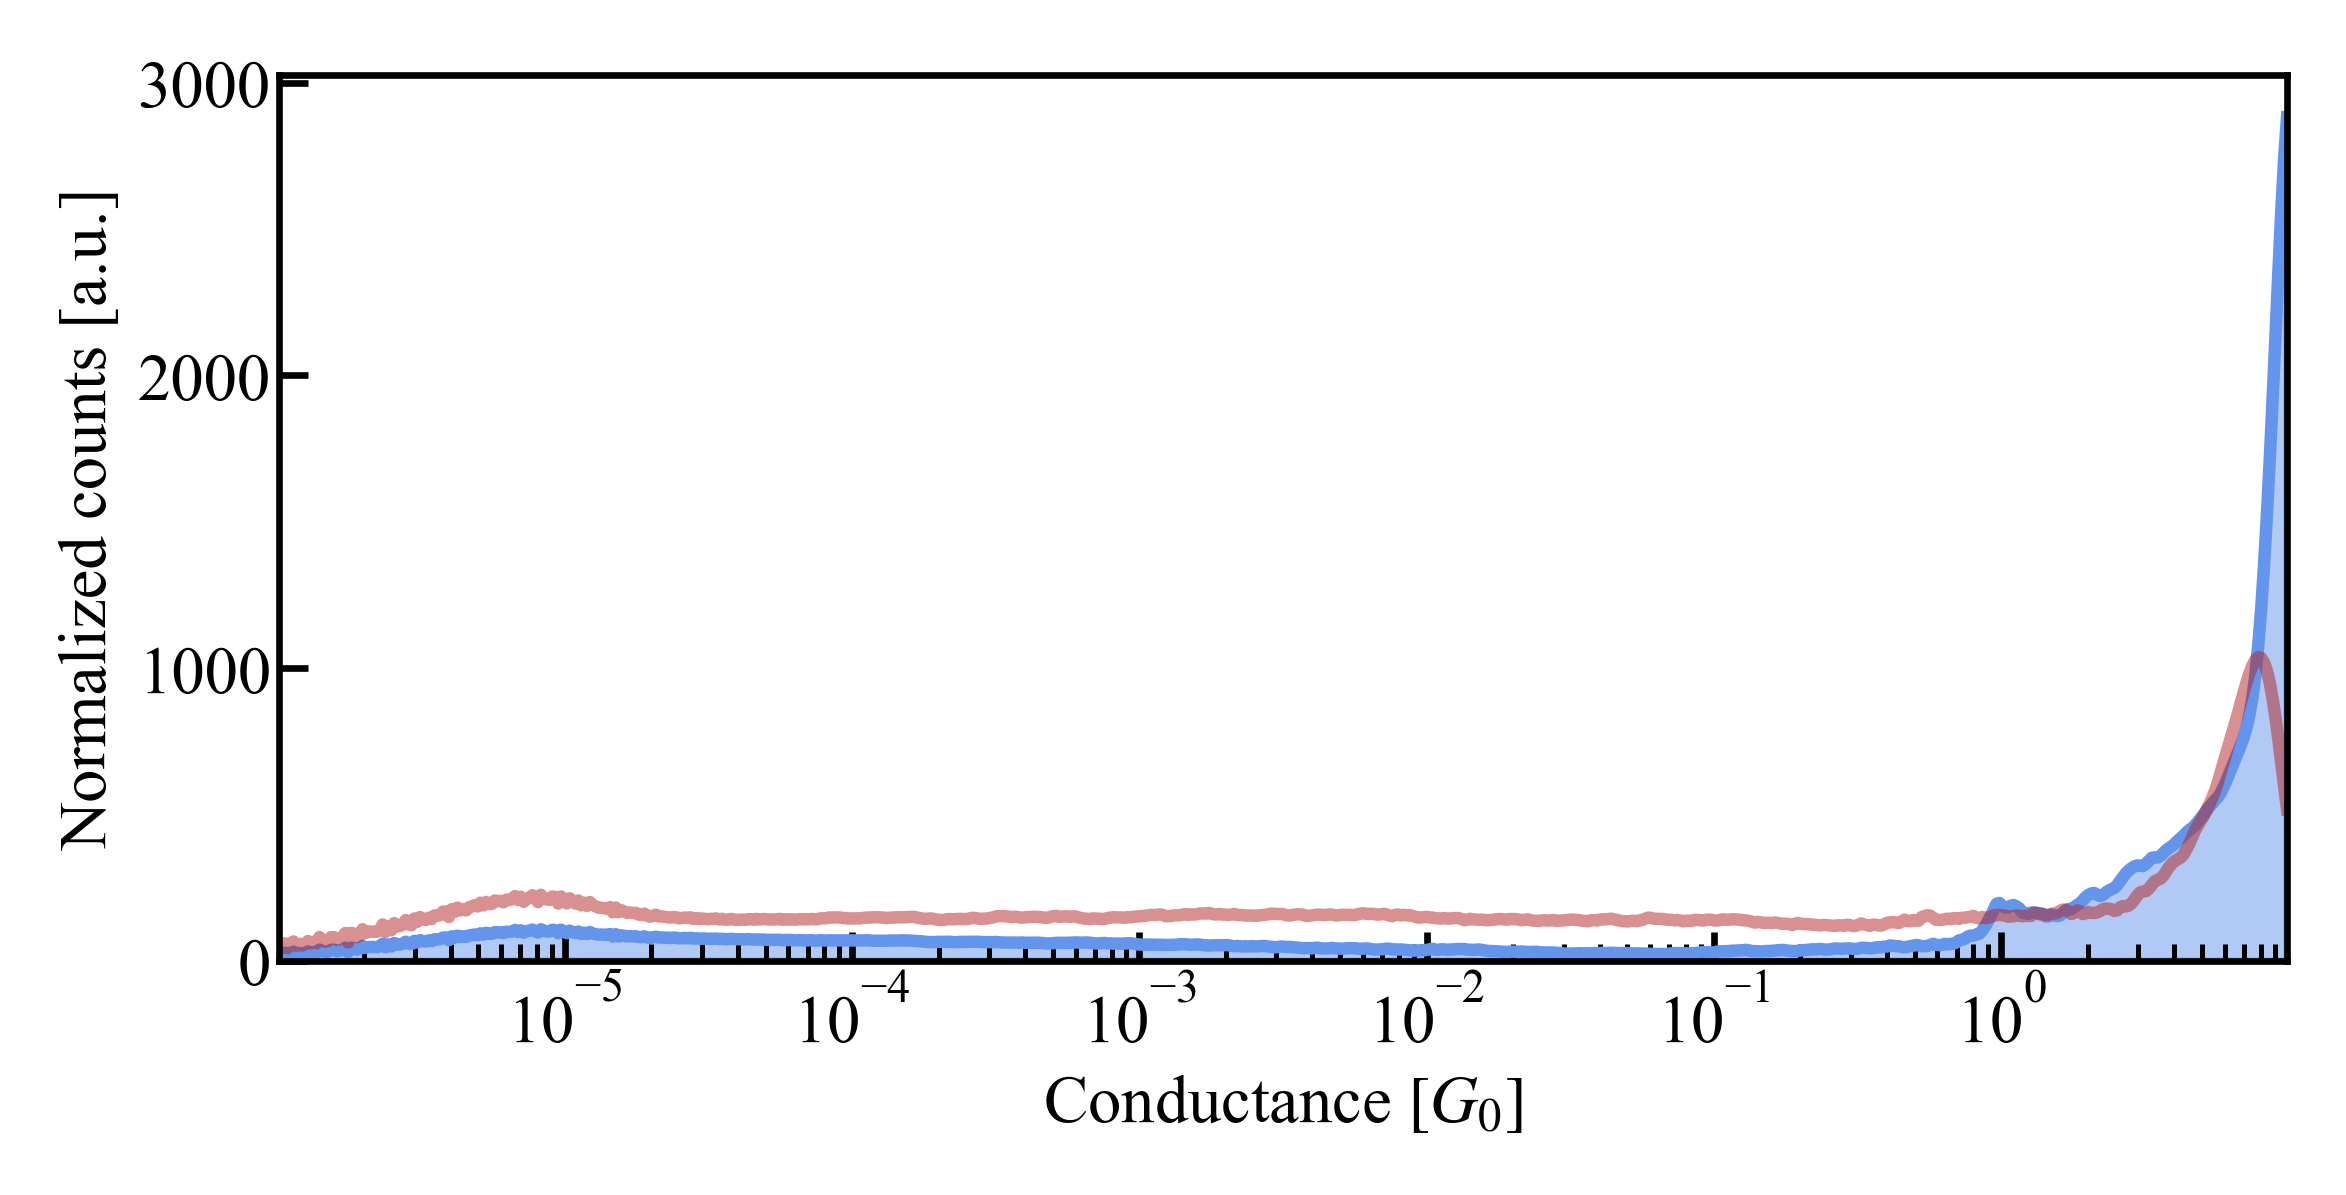

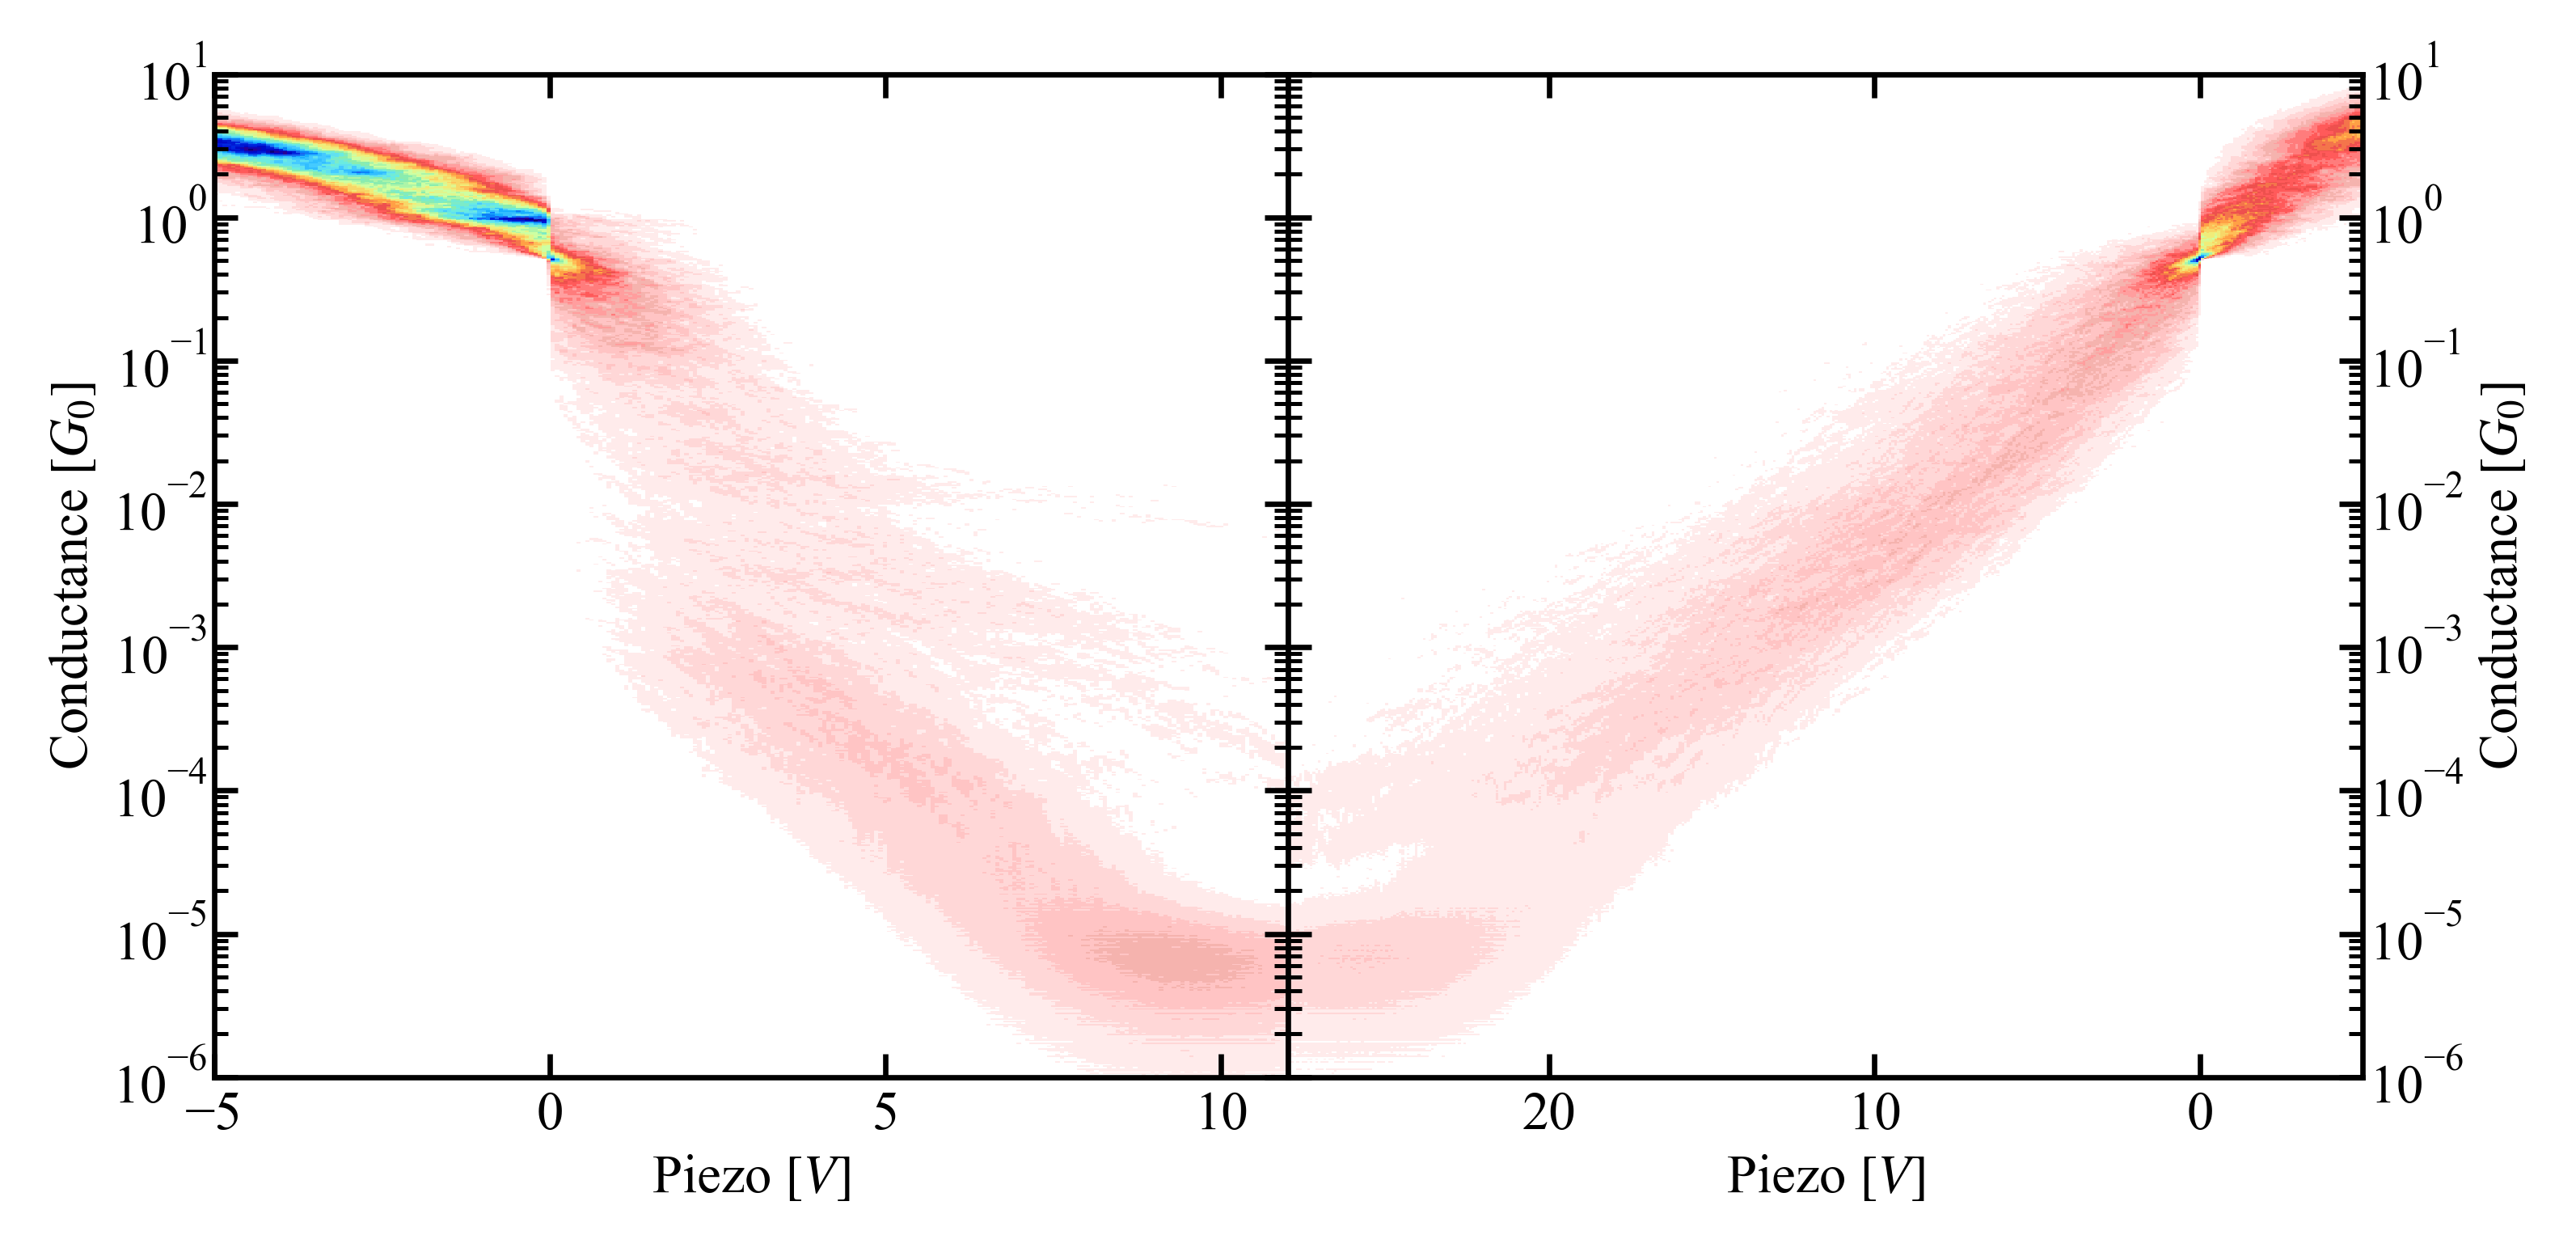

In [13]:
hist_6.plot_hist_1d()
hist_6.plot_hist_2d_both()

# 27745-32000

In [ ]:
hist_7 = Histogram(home_folder, 27745, 32000)

hist_7.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

Processing break junction files:  41%|████      | 18/44 [04:51<07:48, 18.03s/it]

In [ ]:
hist_7.plot_hist_1d()
hist_7.plot_hist_2d_both()

# 36867-38552

In [ ]:
hist_8 = Histogram(home_folder, 36867, 38552)

hist_8.calc_stats(align_at=0.5, range_pull=(-5, 11), range_push=(-5, 28), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

In [ ]:
hist_8.plot_hist_1d()
hist_8.plot_hist_2d_both()

# 43223-

Processing break junction files: 100%|██████████| 52/52 [11:12<00:00, 12.94s/it]


Pull 2D histogram created from 5067 traces
Push 2D histogram created from 5070 traces


<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

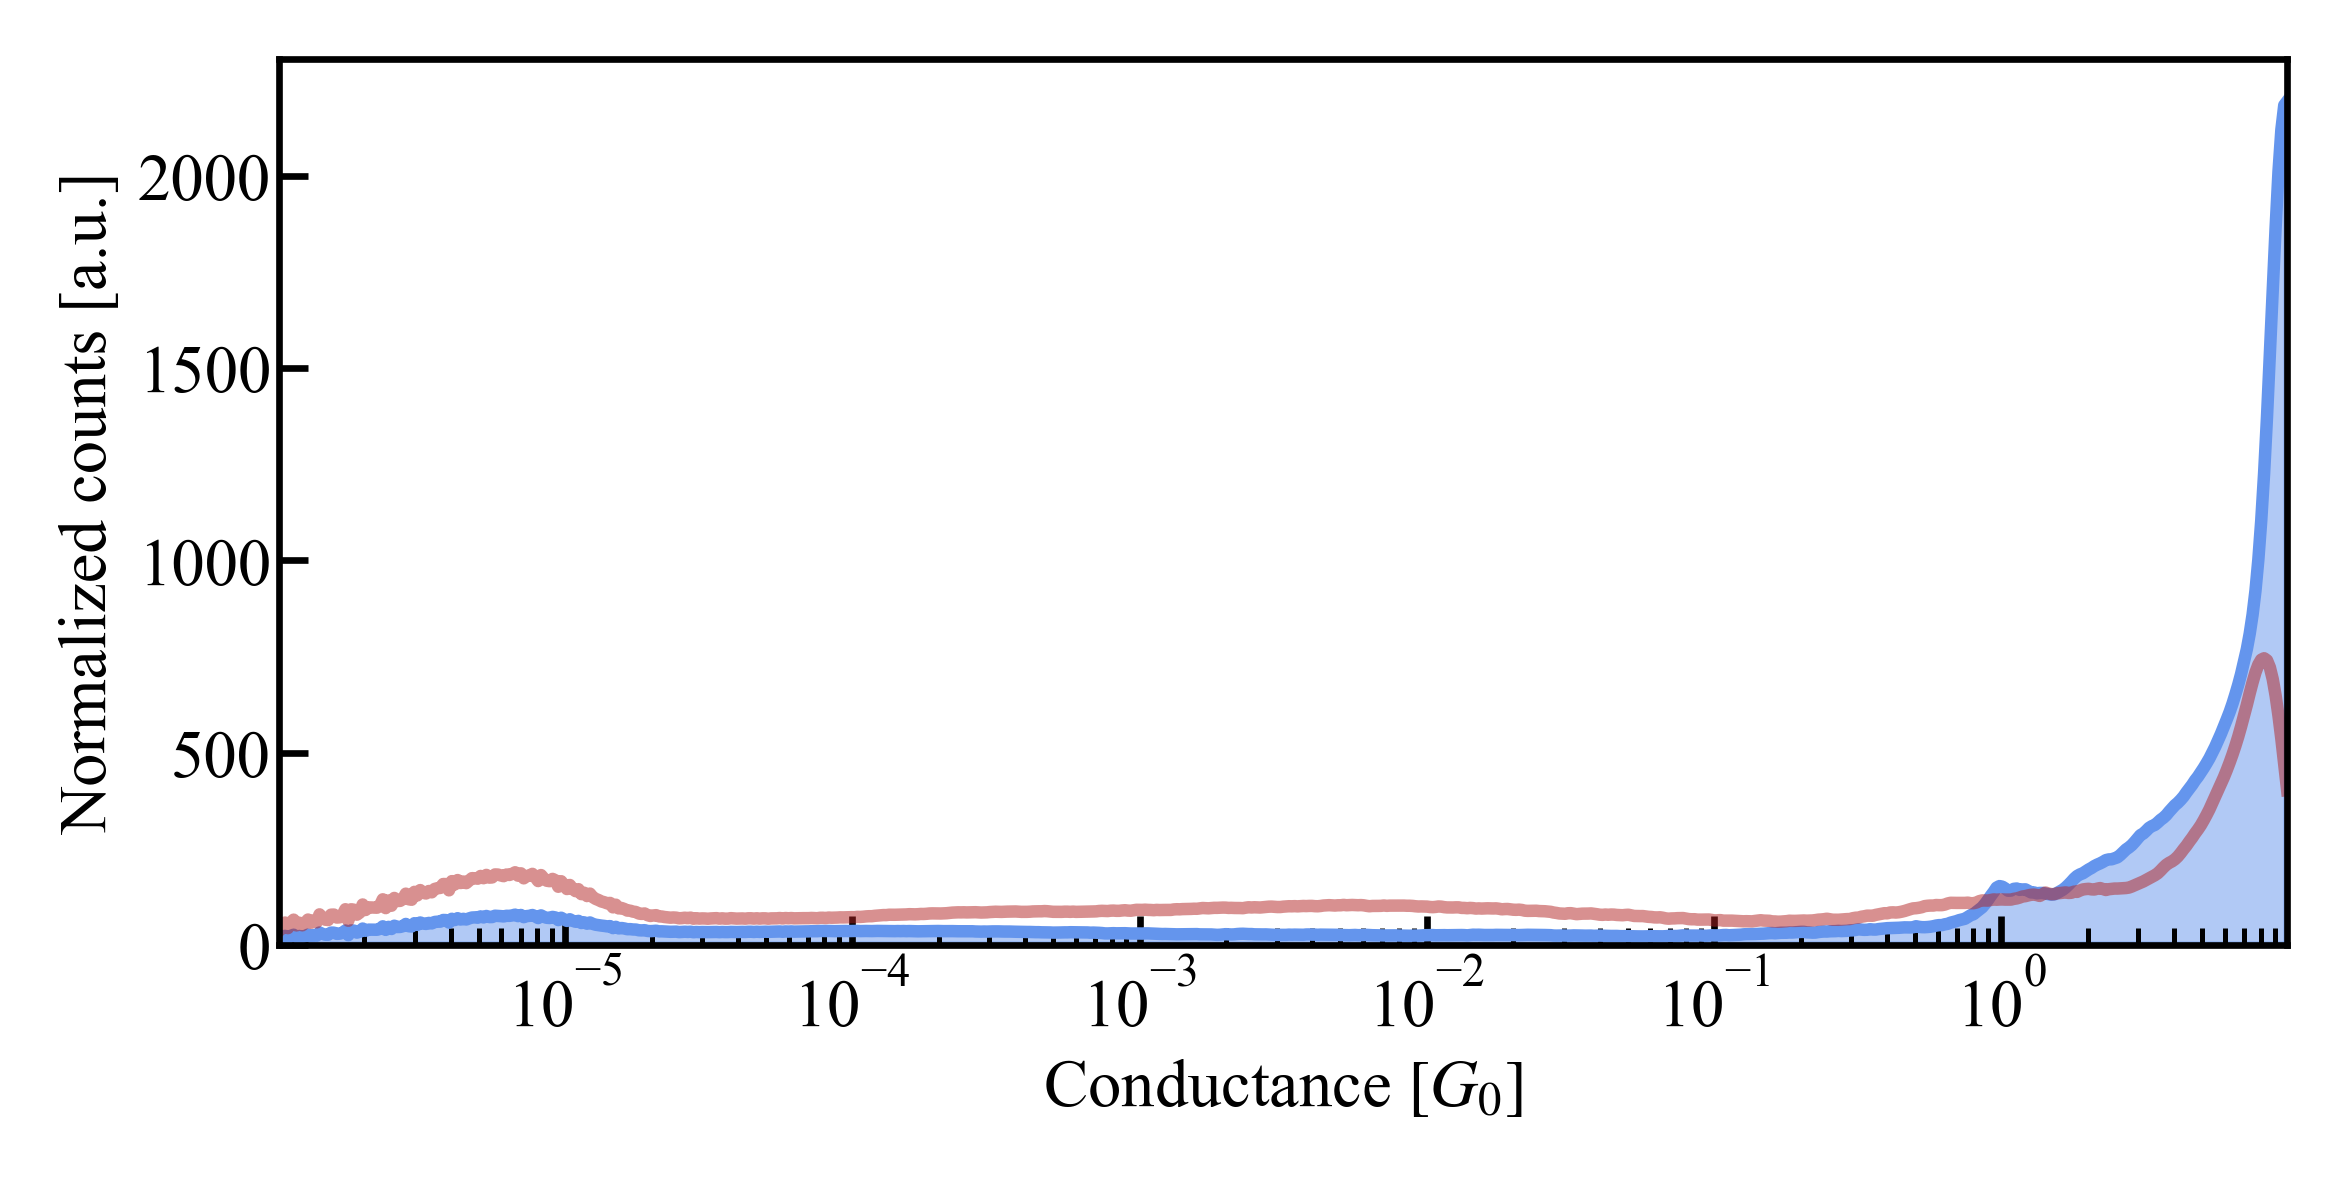

In [2]:
hist_9 = Histogram(home_folder, 43223, end_trace=None)

hist_9.calc_stats(align_at=1e-5, range_pull=(-6, 1), range_push=(-12, 1), xbins_pull=250, xbins_push=400,
                  plateau_length_bins=100)

(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

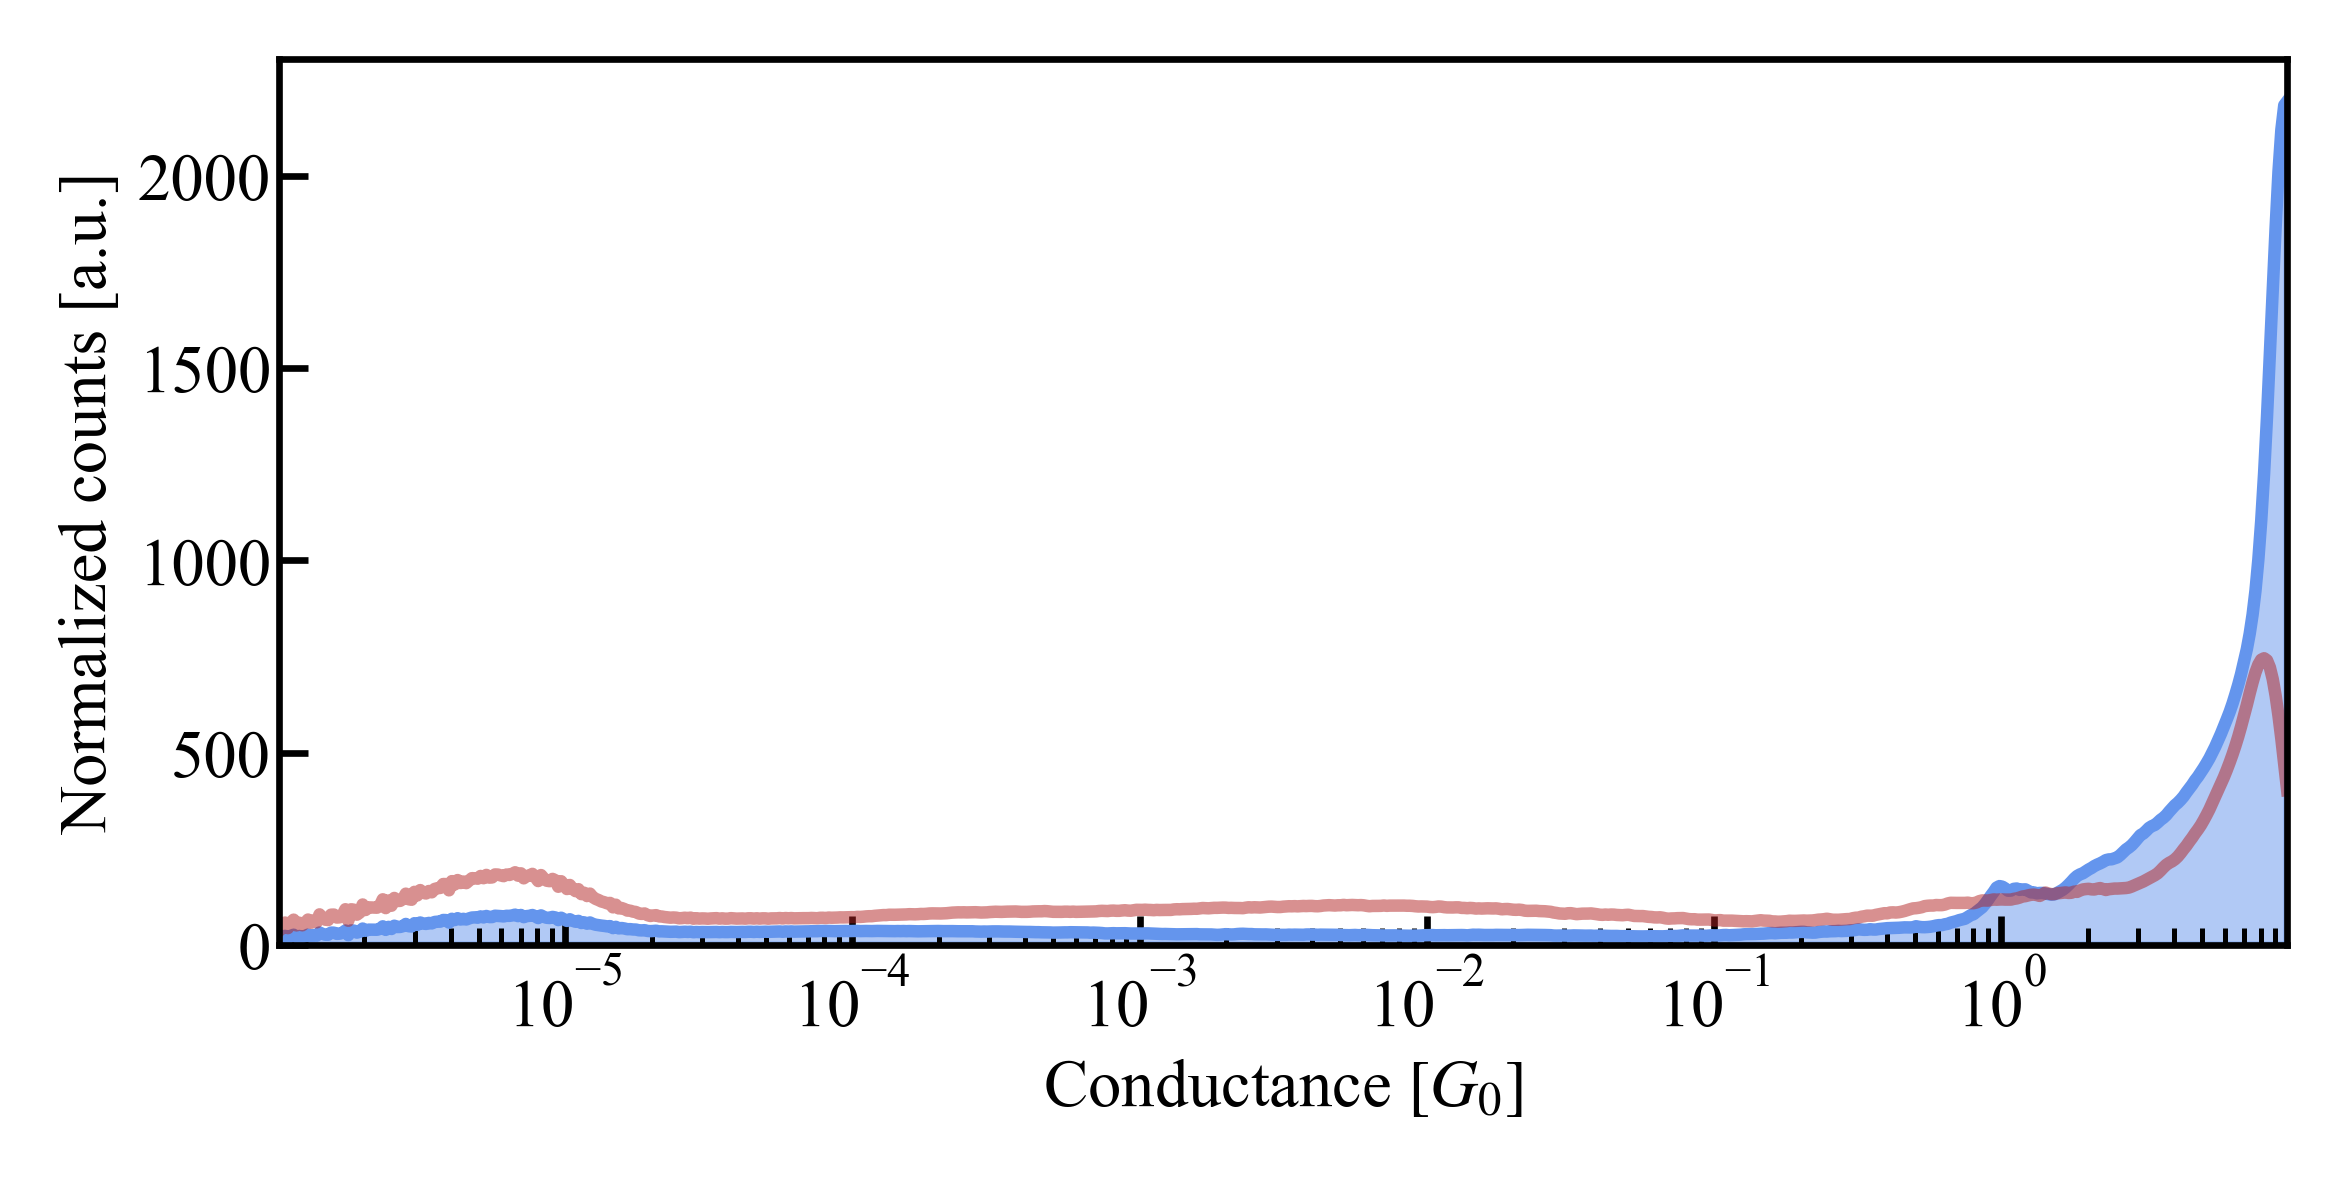

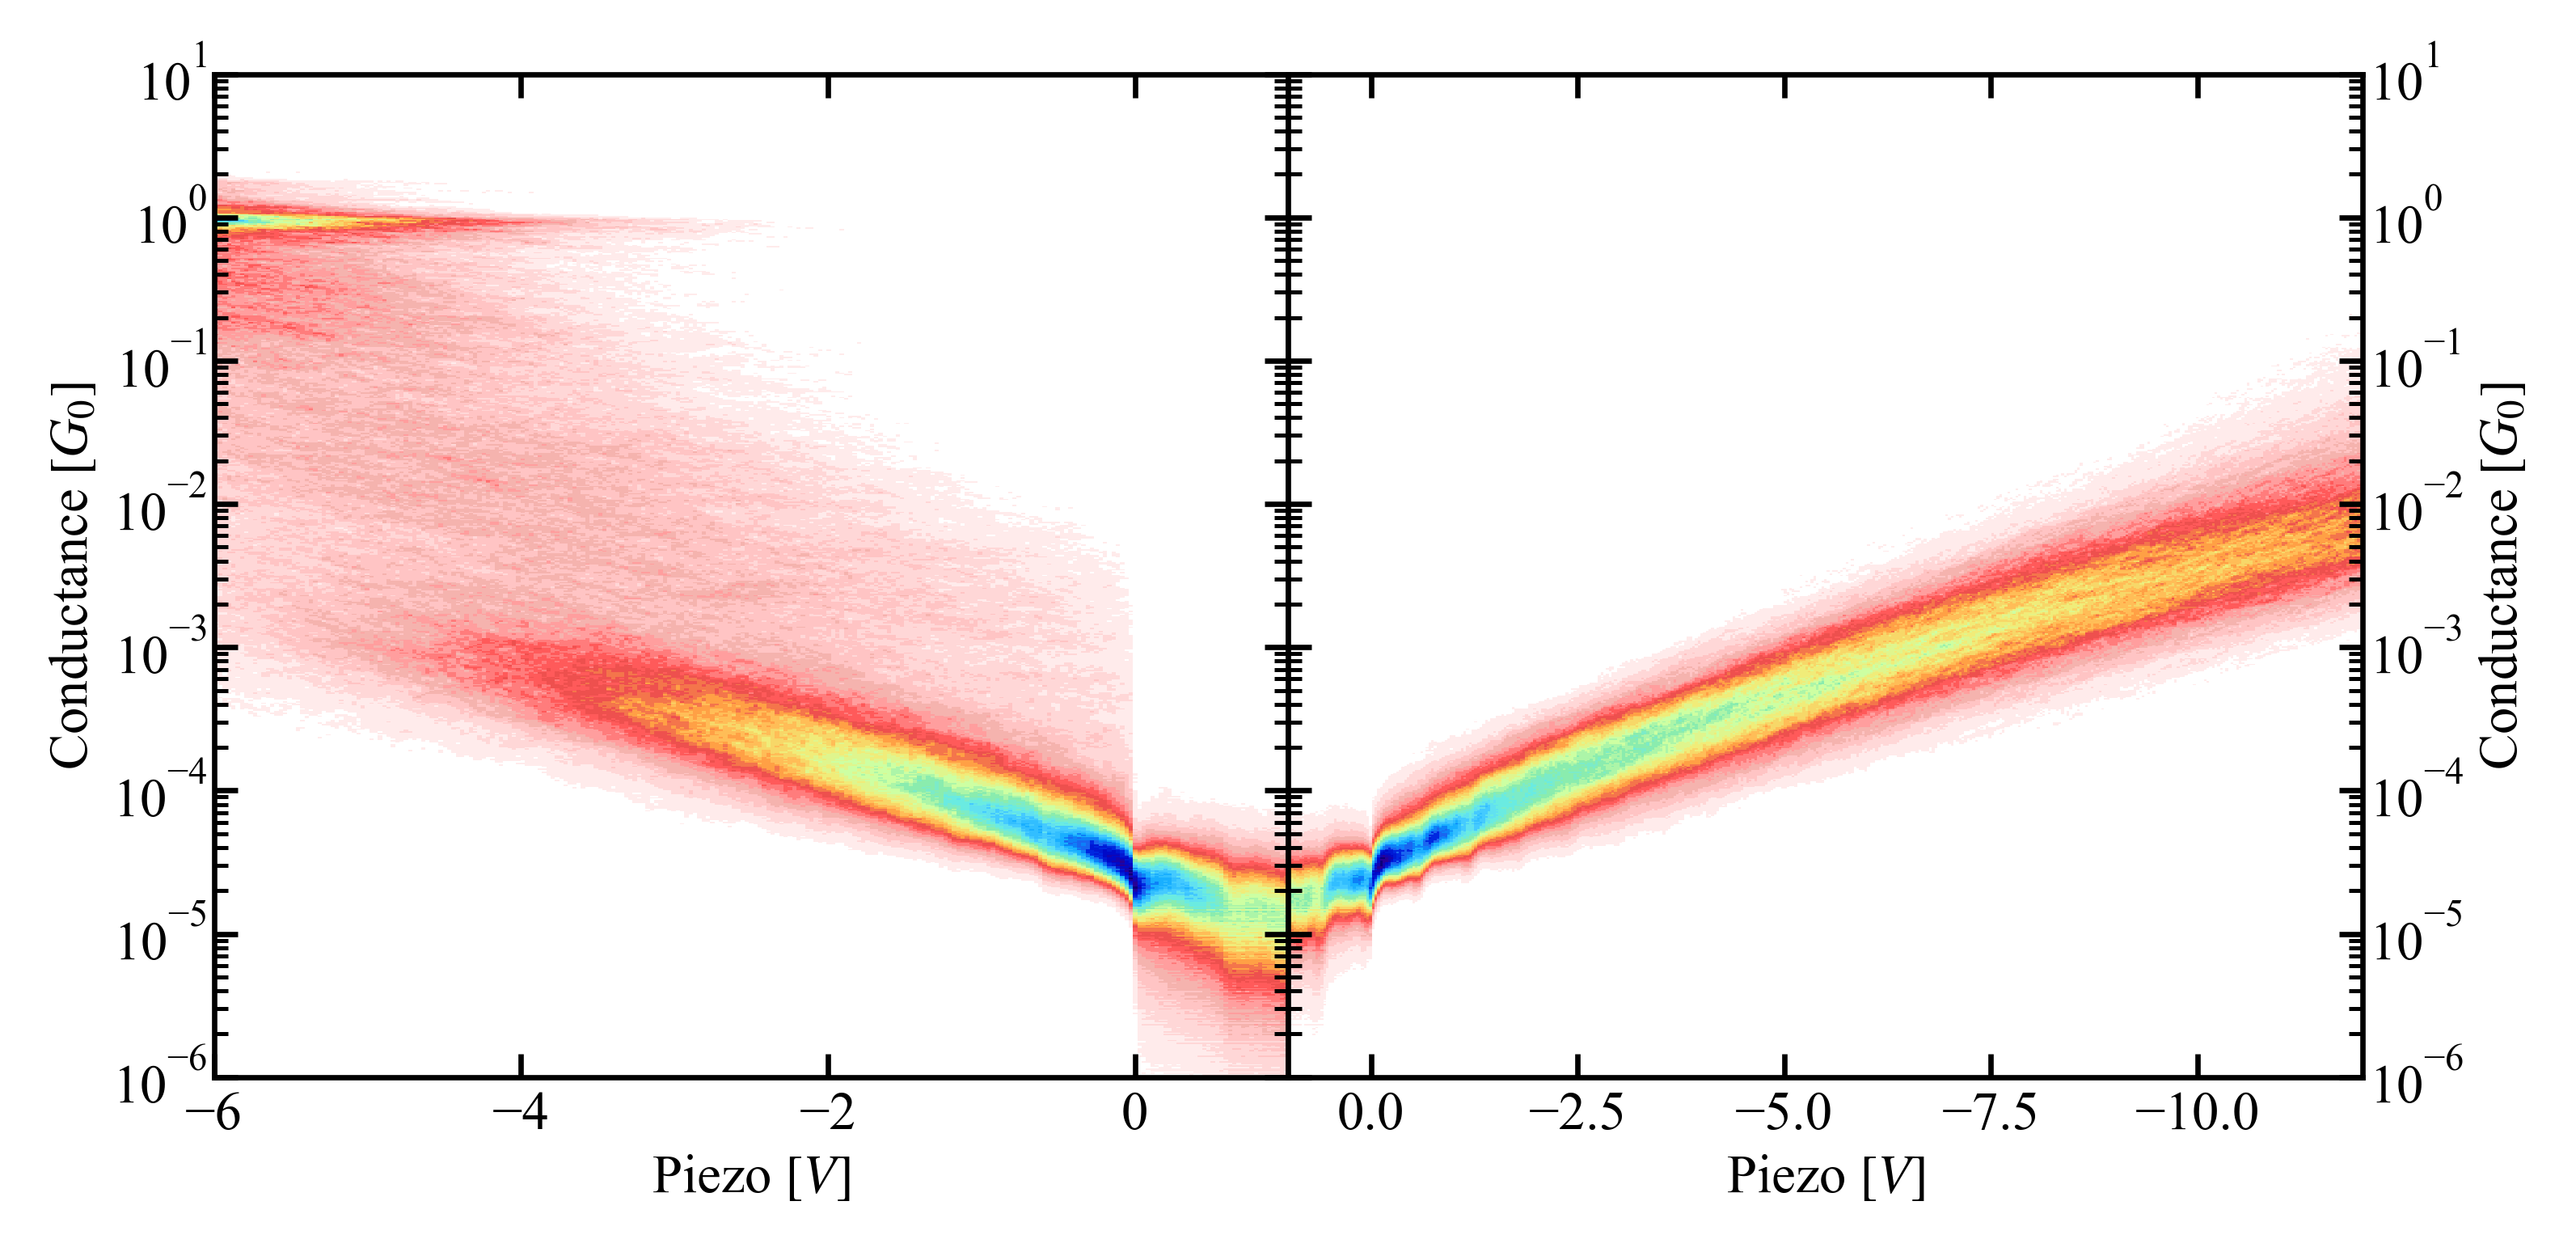

In [3]:
hist_9.plot_hist_1d()
hist_9.plot_hist_2d_both()

In [ ]:
# noise_1 = NoiseStats(home_folder, start_trace=1632, end_trace=5733, num_of_fft=1, min_step_len=None, bias_offset=0.0016,
#                      save_data=1)

In [ ]:
# noise_1 = NoiseStats(home_folder, start_trace=1632, end_trace=12648, num_of_fft=1, min_step_len=None, bias_offset=0.0016,
#                      save_data=2)

In [4]:
hold_trace = HoldTrace(4372, load_from=home_folder, min_step_len=None, bias_offset=0.0016)

In [6]:
hold_trace.analyse_hold_trace(num_of_fft=1)

bias_steps [0.00158691 0.10159302 0.20159912 0.30160522 0.5015869  0.7015991
 1.0015869  0.5015869  0.20159912 0.10159302]


<AxesSubplot:xlabel='Time [s]', ylabel='Conductance $[G_{0}]$'>

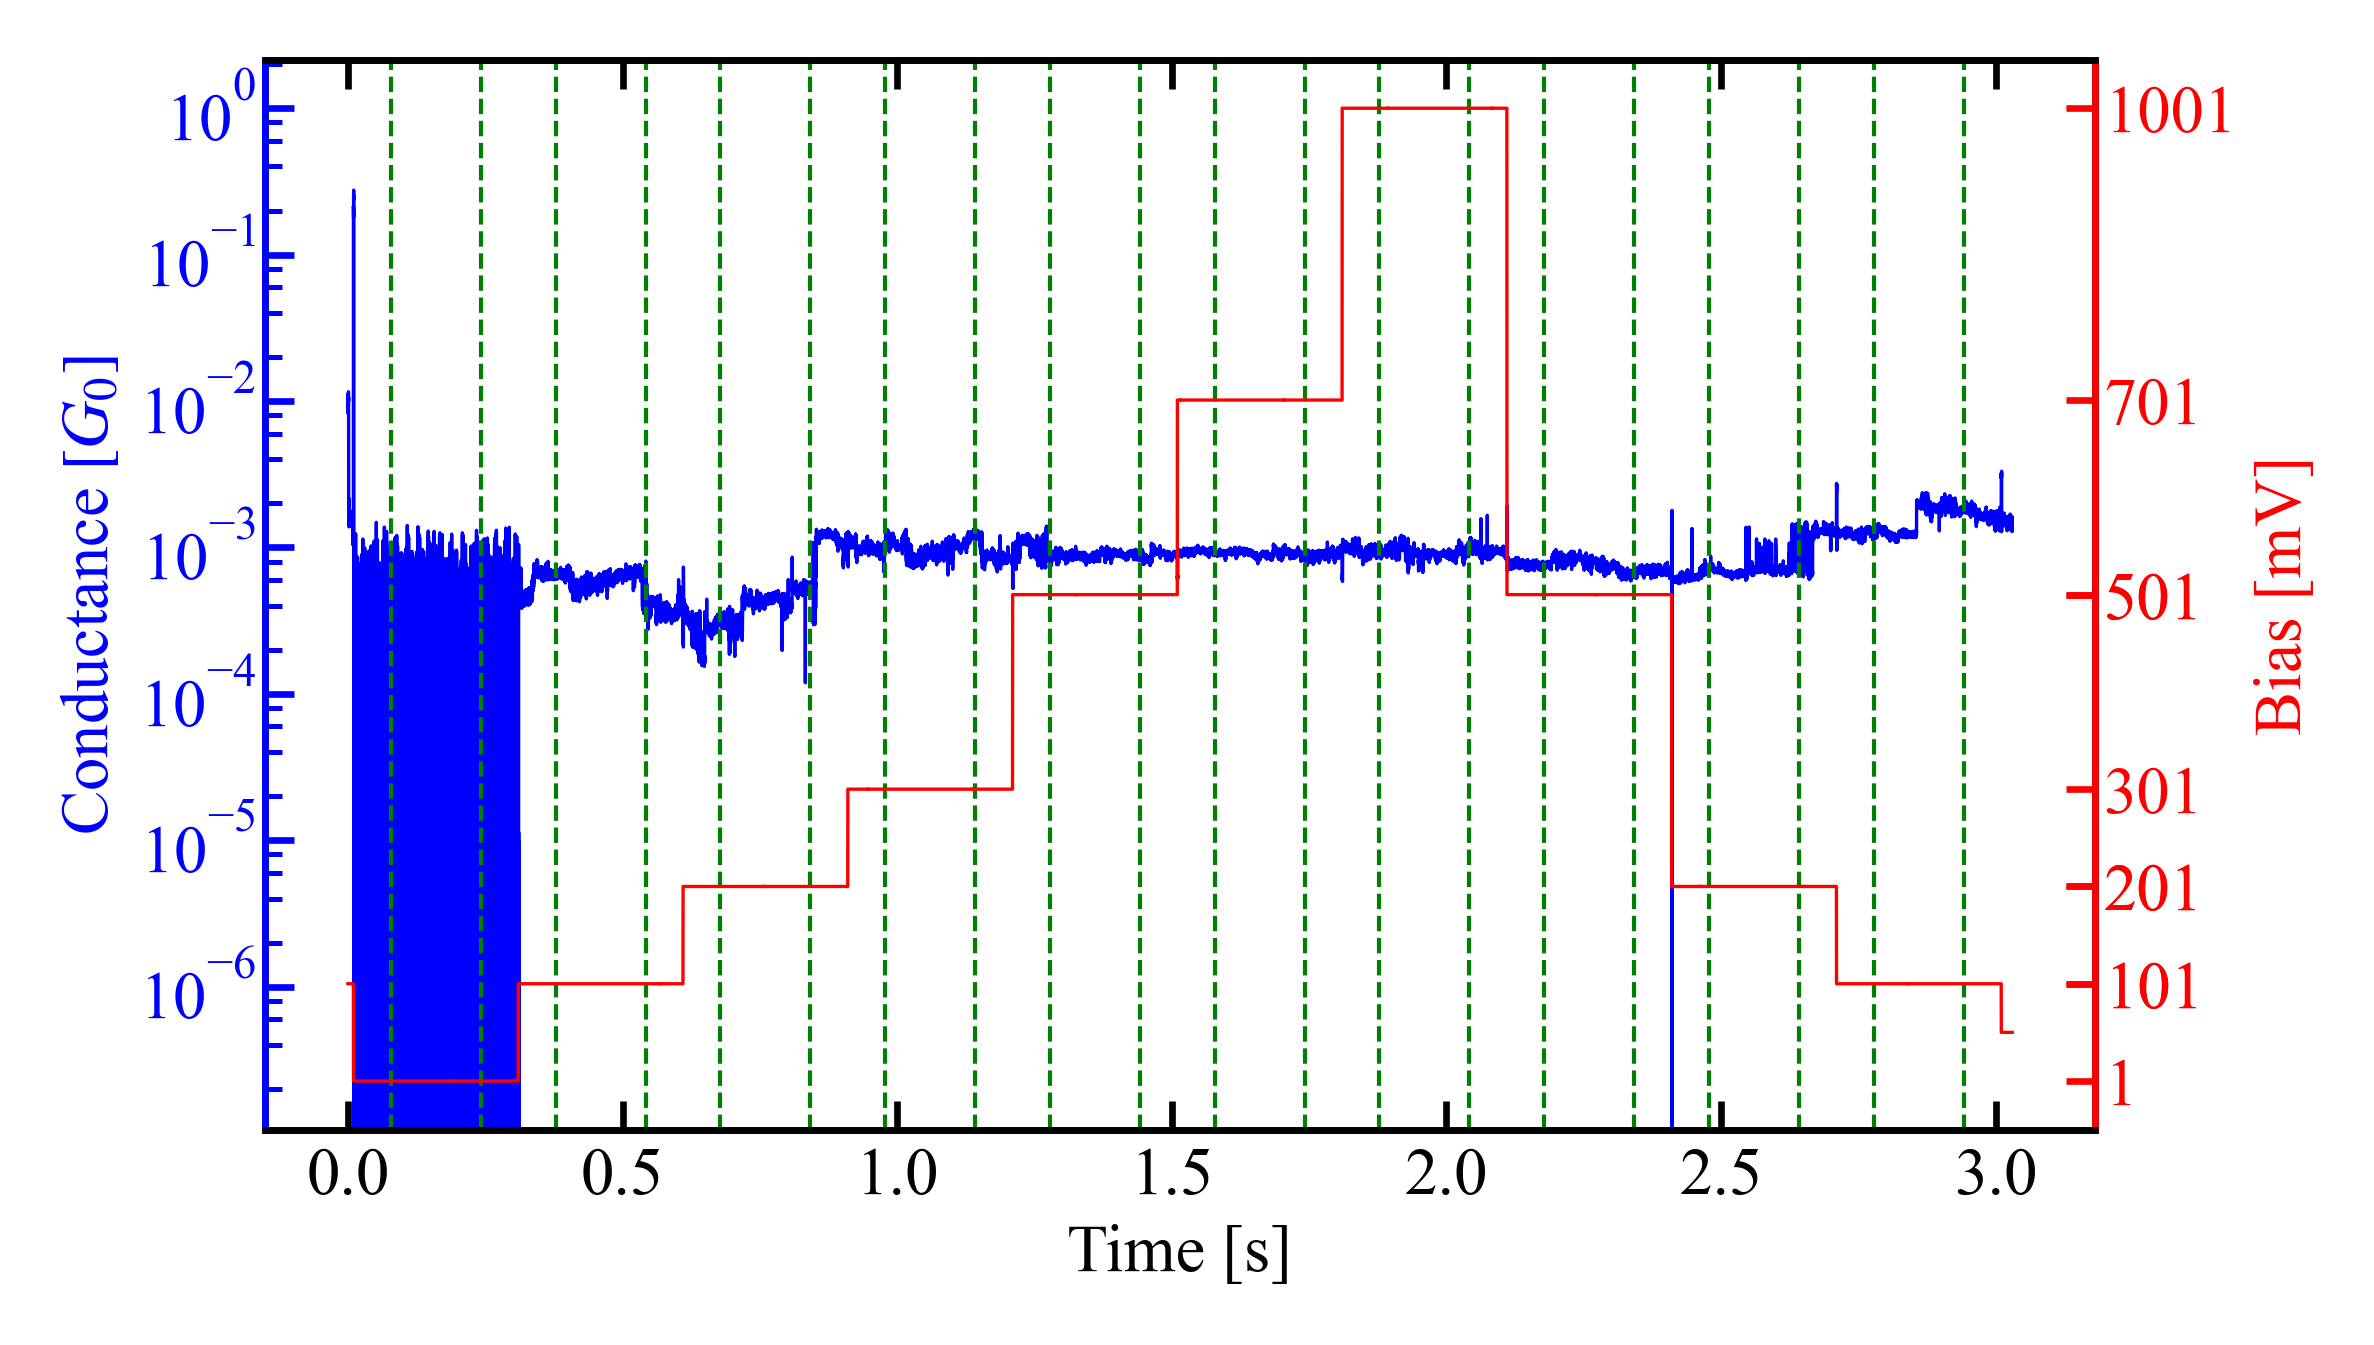

In [8]:
hold_trace.plot_hold_traces(conductance=True, plot_step_ranges=False, plot_psd_intervals=True, pull=True, push=False)

In [23]:
import pandas as pd

In [46]:
def plot_correlation(n, correlation, axis=None, **kwargs):

    if axis is None:
        fig, ax = plt.subplots(1, figsize=utils.cm2inch(6, 4), dpi=600)
    else:
        ax = axis
    ax.plot(n, correlation, **kwargs)
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$C(\log(iPSD/G_{\mathrm{avg}}^{n}), \log(G_{\mathrm{avg}}))$')
    ax.axhline(y=0, xmin=0, xmax=1, ls='--', lw=0.5, c='k')
    ax.axvline(x=n[abs(correlation) == min(abs(correlation))][0], ymin=0, ymax=1,
               ls='--', lw=0.5, c='k')
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.text(x=0.15, y=0.15, s=f"n = {np.round(n[abs(correlation) == min(abs(correlation))][0], 2)}",
            transform=ax.transAxes, fontsize='xx-small', ha='left', va='bottom')

    return ax

def plot_noise_power_2dhist(conductance_avgs: np.ndarray, noise_power: np.ndarray, n: float,
                            xrange: Optional[Tuple[float, float]] = (1e-5, 0.1),
                            yrange: Optional[Tuple[float, float]] = (1e-12, 1e-5),
                            num_bins: Optional[Tuple[int, int]] = (10, 10),
                            shift: Optional[float] = 0, axis=None, **kwargs):

    num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
    num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(num_bins[0] * num_of_decs_x))
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(num_bins[0] * num_of_decs_y))

    h, xedges, yedges = np.histogram2d(conductance_avgs.flatten(), noise_power.flatten(), bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)

    if axis is None:
        fig, ax = plt.subplots(1, figsize=utils.cm2inch(4, 4), dpi=600)
    else:
        ax = axis

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(xrange[0], xrange[1])
    ax.set_ylim(yrange[0], yrange[1])

    ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=9))
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

    ax.set_xlabel(r'$\langle G \rangle [G_0]$')

    ax.plot(xbins, 10 ** (n * np.log10(xbins) + shift), lw=0.5, ls='--', c='k')

    ax.text(x=0.85, y=0.15, s=f"n = {np.round(n, 2)}",
            transform=ax.transAxes, fontsize='xx-small', ha='right', va='bottom')

    im = ax.pcolormesh(x_mesh, y_mesh, h.T, **kwargs)

    return ax

In [29]:
conductance_stat_pull = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_2.csv"), skiprows=[1])
conductance_stat_push = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_2.csv"), skiprows=[1])

In [30]:
conductance_stat_pull.head()

trace_index  G_set    G_stop    G_hold     G_avg   G_beg_1   G_beg_2  \
0       1632.0   0.01  0.009943  0.009565  0.000958  0.000003  0.005294   
1       1633.0   0.01  0.009595  0.011159  0.001146 -0.000942  0.003172   
2       1634.0   0.01  0.005997  0.001203  0.000468 -0.000281  0.001746   
3       1635.0   0.01  0.004084  0.002417  0.000112 -0.000197  0.000182   
4       1636.0   0.01  0.008792  0.006038  0.002062 -0.000093  0.001989   

    G_beg_3   G_beg_4   G_beg_5  ...   G_end_1   G_end_2   G_end_3   G_end_4  \
0  0.004089  0.003324  0.002767  ...  0.000154  0.004175  0.003276  0.002906   
1  0.007808  0.008407  0.004511  ... -0.000281  0.008552  0.008904  0.004368   
2  0.001557  0.001278  0.000972  ...  0.000037  0.001695  0.001204  0.000924   
3  0.000153  0.000108  0.000315  ...  0.000084  0.000186  0.000106  0.000272   
4  0.002453  0.003325  0.003380  ...  0.000087  0.002425  0.003155  0.003079   

    G_end_5   G_end_6   G_end_7   G_end_8   G_end_9  G_end_10  
0  0.003716  0.001438  0.001464  0.001251  0.001030  0.000978  
1  0.002088  0.001814  0.001723  0.001262  0.001035  0.001117  
2  0.000997  0.000447  0.000603  0.000641  0.000503  0.000387  
3  0.000168  0.000150  0.000154  0.000165  0.000133  0.000102  
4  0.001463  0.001622  0.002145  0.001769  0.002276  0.002246  

[5 rows x 25 columns]

In [32]:
conductance_stat_push.tail()

trace_index   G_set    G_stop    G_hold     G_avg   G_beg_1   G_beg_2  \
9704      12644.0  0.0005  0.000507  0.000387  0.000851 -0.000093  0.000506   
9705      12645.0  0.0005  0.000540  0.000641  0.001158 -0.000108  0.000540   
9706      12646.0  0.0005  0.000475  0.000537  0.002249 -0.000442  0.000693   
9707      12647.0  0.0005  0.000475  0.000562  0.000860  0.000184  0.001031   
9708      12648.0  0.0005  0.000499  0.000406  0.001518 -0.000045  0.001225   

       G_beg_3   G_beg_4   G_beg_5  ...   G_end_1   G_end_2   G_end_3  \
9704  0.000913  0.000964  0.001067  ...  0.000127  0.000888  0.000930   
9705  0.000827  0.000761  0.000881  ... -0.000040  0.000855  0.000730   
9706  0.001913  0.002219  0.002549  ... -0.000059  0.001885  0.002072   
9707  0.001063  0.001315  0.001316  ... -0.000059  0.001281  0.001289   
9708  0.001242  0.001311  0.002121  ... -0.000242  0.001202  0.001257   

       G_end_4   G_end_5   G_end_6   G_end_7   G_end_8   G_end_9  G_end_10  
9704  0.001072  0.001118  0.001215  0.001151  0.000836  0.000777  0.000854  
9705  0.000843  0.001245  0.001130  0.001109  0.001119  0.001070  0.001148  
9706  0.002310  0.002314  0.002722  0.002498  0.002561  0.002431  0.002316  
9707  0.001251  0.001481  0.001640  0.001632  0.001295  0.000947  0.000877  
9708  0.002070  0.001508  0.001634  0.001099  0.001263  0.001546  0.001263  

[5 rows x 25 columns]

In [34]:
conductance_filt_pull = conductance_stat_pull[:][abs(np.log10(conductance_stat_pull['G_beg_2'] / conductance_stat_pull['G_end_10'])) < np.log10(2)]
conductance_filt_push = conductance_stat_push[:][abs(np.log10(conductance_stat_push['G_beg_2'] / conductance_stat_push['G_end_10'])) < np.log10(2)]

D:\Greta\mcbj_stm-bj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
filt_inds_pull = np.array(conductance_filt_pull.index)
filt_inds_push = np.array(conductance_filt_push.index)

In [38]:
print('Pull')
print('Number of all traces: ', conductance_stat_pull.count()['trace_index'])
print('Number of filtered traces: ', conductance_filt_pull.count()['trace_index'])
print('Yield: ', conductance_filt_pull.count()['trace_index']/conductance_stat_pull.count()['trace_index']*100, '%')
print('\n')
print('Push')
print('Number of all traces: ', conductance_stat_push.count()['trace_index'])
print('Number of filtered traces: ', conductance_filt_push.count()['trace_index'])
print('Yield: ', conductance_filt_push.count()['trace_index']/conductance_stat_push.count()['trace_index']*100, '%')

Pull
Number of all traces:  9709
Number of filtered traces:  3865
Yield:  39.80842517252034 %


Push
Number of all traces:  9709
Number of filtered traces:  6510
Yield:  67.05118961788031 %


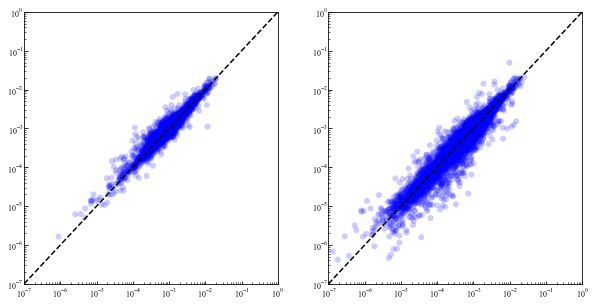

In [73]:
which = ('G_beg_10', 'G_end_10')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].scatter(conductance_filt_pull[which[0]], conductance_filt_pull[which[1]], alpha=0.2, c='b', edgecolor='None')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e-7, 1)
ax[0].set_ylim(1e-7, 1)
ax[0].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

ax[1].scatter(conductance_stat_pull[which[0]], conductance_stat_pull[which[1]], alpha=0.2, c='b', edgecolor='None')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(1e-7, 1)
ax[1].set_ylim(1e-7, 1)
ax[1].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

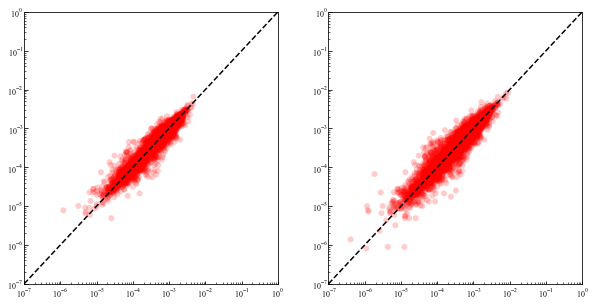

In [75]:
which = ('G_beg_10', 'G_end_10')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].scatter(conductance_filt_push[which[0]], conductance_filt_push[which[1]], alpha=0.2, c='r', edgecolor='None')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e-7, 1)
ax[0].set_ylim(1e-7, 1)
ax[0].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

ax[1].scatter(conductance_stat_push[which[0]], conductance_stat_push[which[1]], alpha=0.2, c='r', edgecolor='None')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(1e-7, 1)
ax[1].set_ylim(1e-7, 1)
ax[1].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

In [44]:
noise_stat_pull = pd.read_csv(home_folder.joinpath("results/noise_stats_pull_2.csv"), skiprows=[1])
noise_stat_push = pd.read_csv(home_folder.joinpath("results/noise_stats_push_2.csv"), skiprows=[1])

In [45]:
noise_stat_pull.head()

trace_index  avg_cond_on_step_1  avg_current_on_step_1  noise_power_1  \
0         1632           -0.000437          -5.425954e-11   3.624358e-08   
1         1633           -0.000190          -2.361637e-11   1.555098e-08   
2         1634           -0.000179          -2.215239e-11   8.447034e-09   
3         1635           -0.000105          -1.305768e-11   5.847855e-09   
4         1636           -0.000208          -2.574061e-11   8.084879e-09   

   conductance_noise_1  current_noise_1  avg_cond_on_step_2  \
0            -0.435340        -0.431622            0.004809   
1            -0.656358        -0.649575            0.008472   
2            -0.513222        -0.510382            0.001499   
3            -0.725903        -0.720437            0.000182   
4            -0.431957        -0.429716            0.002078   

   avg_current_on_step_2  noise_power_2  conductance_noise_2  ...  \
0           3.650251e-08   2.736961e-08             0.034401  ...   
1           6.259257e-08   1.739452e-07             0.049227  ...   
2           1.166734e-08   1.423045e-09             0.025170  ...   
3           1.430581e-09   1.499900e-10             0.067323  ...   
4           1.610109e-08   9.658935e-09             0.047292  ...   

   avg_cond_on_step_9  avg_current_on_step_9  noise_power_9  \
0            0.001260           1.949789e-08   1.611182e-09   
1            0.001088           1.685586e-08   1.028184e-09   
2            0.000542           8.441234e-09   2.044574e-10   
3            0.000165           2.576522e-09   3.379963e-11   
4            0.002330           3.576347e-08   1.567003e-09   

   conductance_noise_9  current_noise_9  avg_cond_on_step_10  \
0             0.031848         0.032172             0.000989   
1             0.029479         0.029729             0.001055   
2             0.026361         0.026472             0.000366   
3             0.035217         0.035263             0.000095   
4             0.016991         0.017298             0.002172   

   avg_current_on_step_10  noise_power_10  conductance_noise_10  \
0            7.730855e-09    8.368215e-10              0.029244   
1            8.242448e-09    1.126628e-09              0.031808   
2            2.871454e-09    1.502226e-10              0.033517   
3            7.439045e-10    1.593730e-11              0.042231   
4            1.682174e-08    6.284746e-10              0.011542   

   current_noise_10  
0          0.029469  
1          0.032071  
2          0.033616  
3          0.042263  
4          0.011737  

[5 rows x 51 columns]

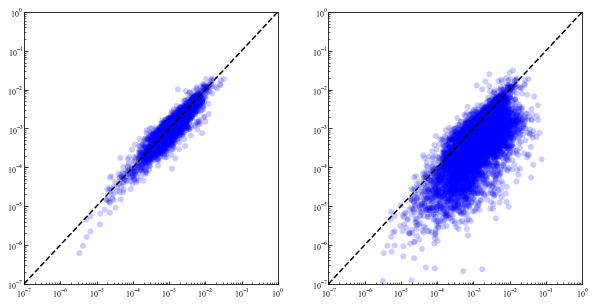

In [76]:
which = ('avg_cond_on_step_2', 'avg_cond_on_step_10')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].scatter(noise_stat_pull[which[0]][filt_inds_pull], noise_stat_pull[which[1]][filt_inds_pull], alpha=0.2, c='b', edgecolor='None')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e-7, 1)
ax[0].set_ylim(1e-7, 1)
ax[0].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

ax[1].scatter(noise_stat_pull[which[0]], noise_stat_pull[which[1]], alpha=0.2, c='b', edgecolor='None')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(1e-7, 1)
ax[1].set_ylim(1e-7, 1)
ax[1].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

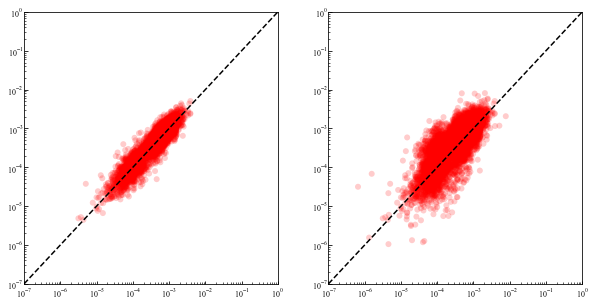

In [77]:
which = ('avg_cond_on_step_2', 'avg_cond_on_step_10')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].scatter(noise_stat_push[which[0]][filt_inds_push], noise_stat_push[which[1]][filt_inds_push], alpha=0.2, c='r', edgecolor='None')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e-7, 1)
ax[0].set_ylim(1e-7, 1)
ax[0].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

ax[1].scatter(noise_stat_push[which[0]], noise_stat_push[which[1]], alpha=0.2, c='r', edgecolor='None')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(1e-7, 1)
ax[1].set_ylim(1e-7, 1)
ax[1].plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--')

In [85]:
noise_stat_push['noise_power_2'][filt_inds_push]

1       5.379400e-10
2       4.415164e-11
5       3.836608e-10
9       2.566936e-10
10      9.778905e-10
            ...     
9701    4.445508e-10
9702    8.944394e-10
9704    2.541836e-10
9707    6.761650e-10
9708    3.270198e-10
Name: noise_power_2, Length: 6510, dtype: float64

In [59]:
N = np.linspace(0.8, 2.2, num=1000)
pull_corr = np.zeros_like(N)
push_corr = np.zeros_like(N)
for i, n in enumerate(N):
    pull_corr[i] = utils.calc_correlation(np.log10(noise_stat_pull['noise_power_2'][filt_inds_pull]/ \
                                                   noise_stat_pull['avg_cond_on_step_2'][filt_inds_pull]**n),
                                          np.log10(noise_stat_pull['avg_cond_on_step_2'][filt_inds_pull]))
    push_corr[i] = utils.calc_correlation(np.log10(noise_stat_push['noise_power_2'][filt_inds_push]/ \
                                                   noise_stat_push['avg_cond_on_step_2'][filt_inds_push]**n),
                                          np.log10(noise_stat_push['avg_cond_on_step_2'][filt_inds_push]))

In [66]:
np.mean((N[pull_corr<0][0], N[pull_corr>0][-1]))

1.462162162162162

<AxesSubplot:xlabel='$\\langle G \\rangle [G_0]$'>

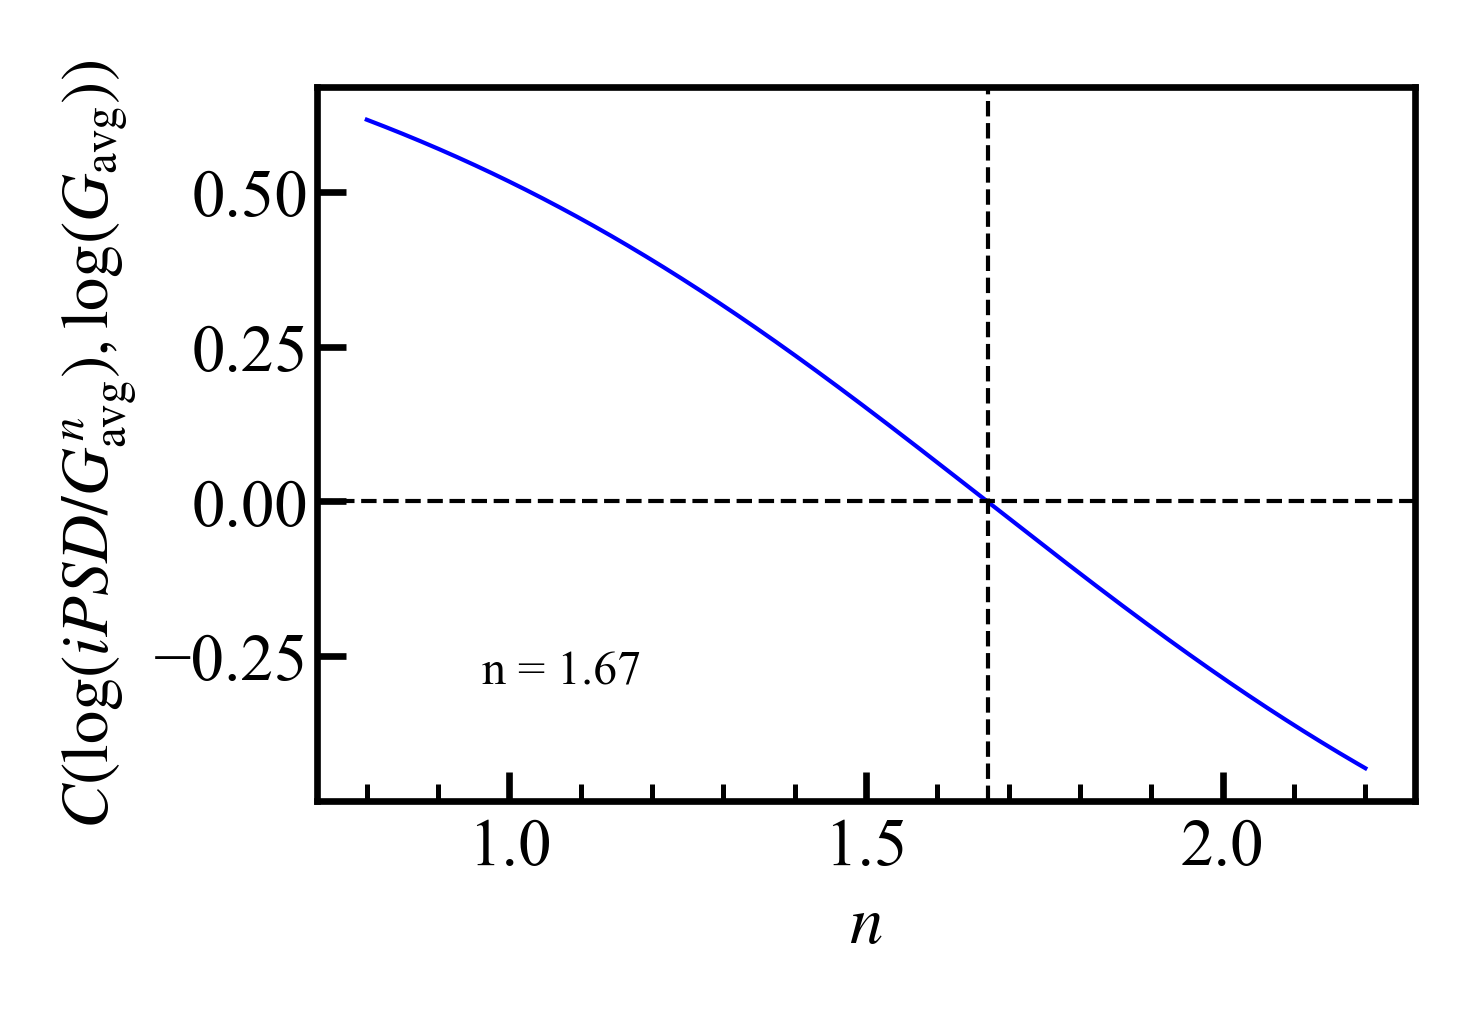

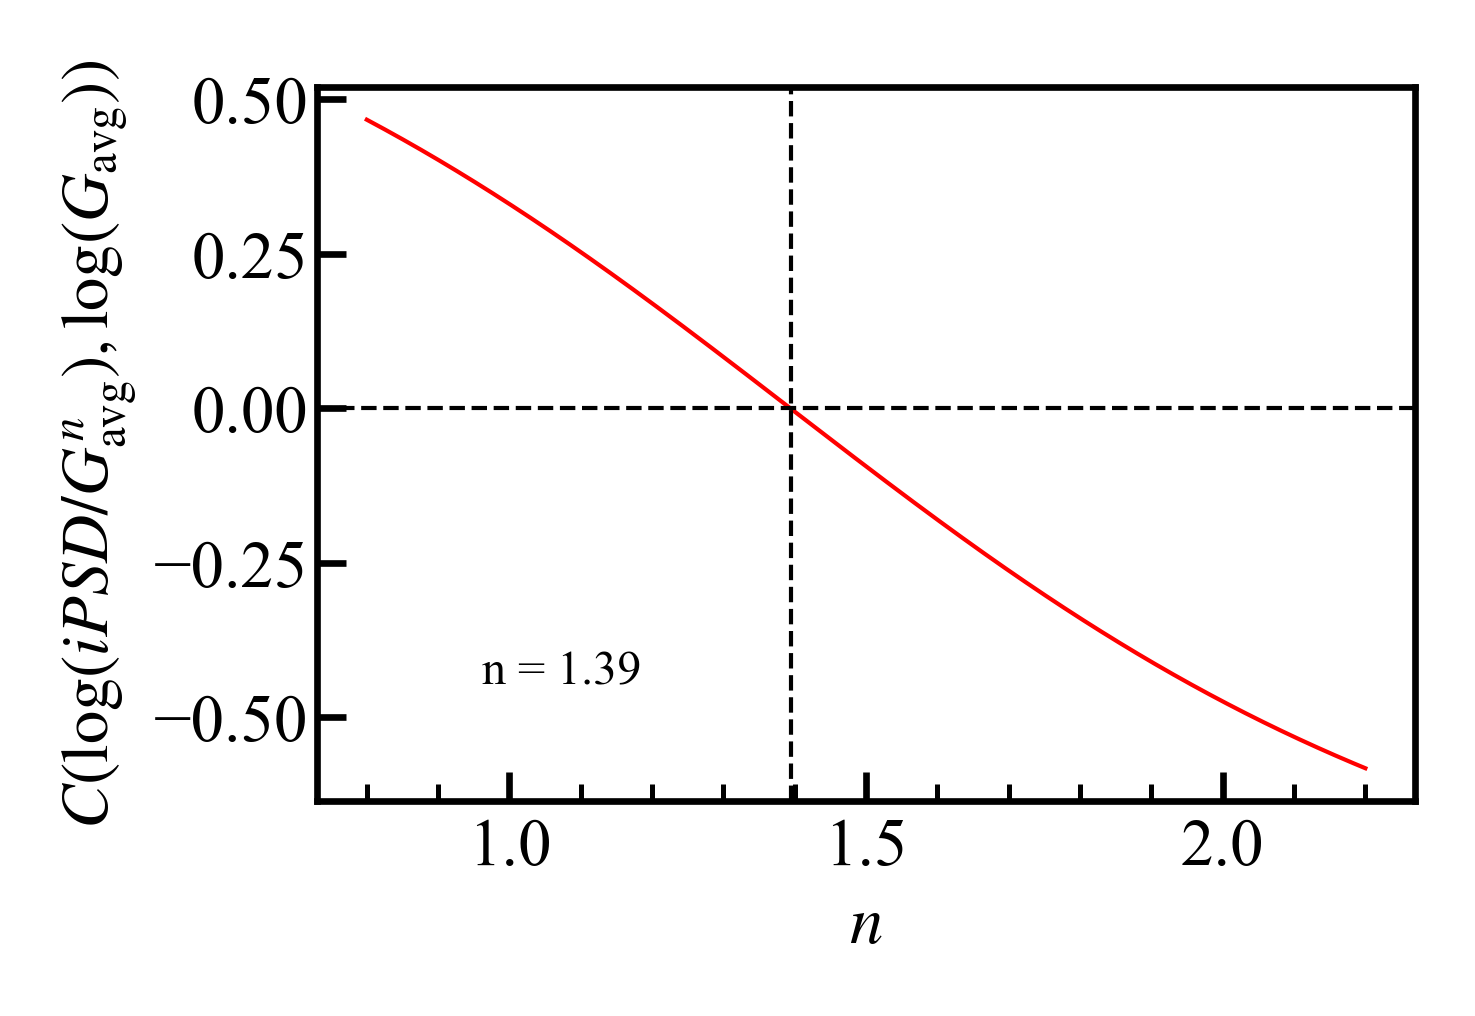

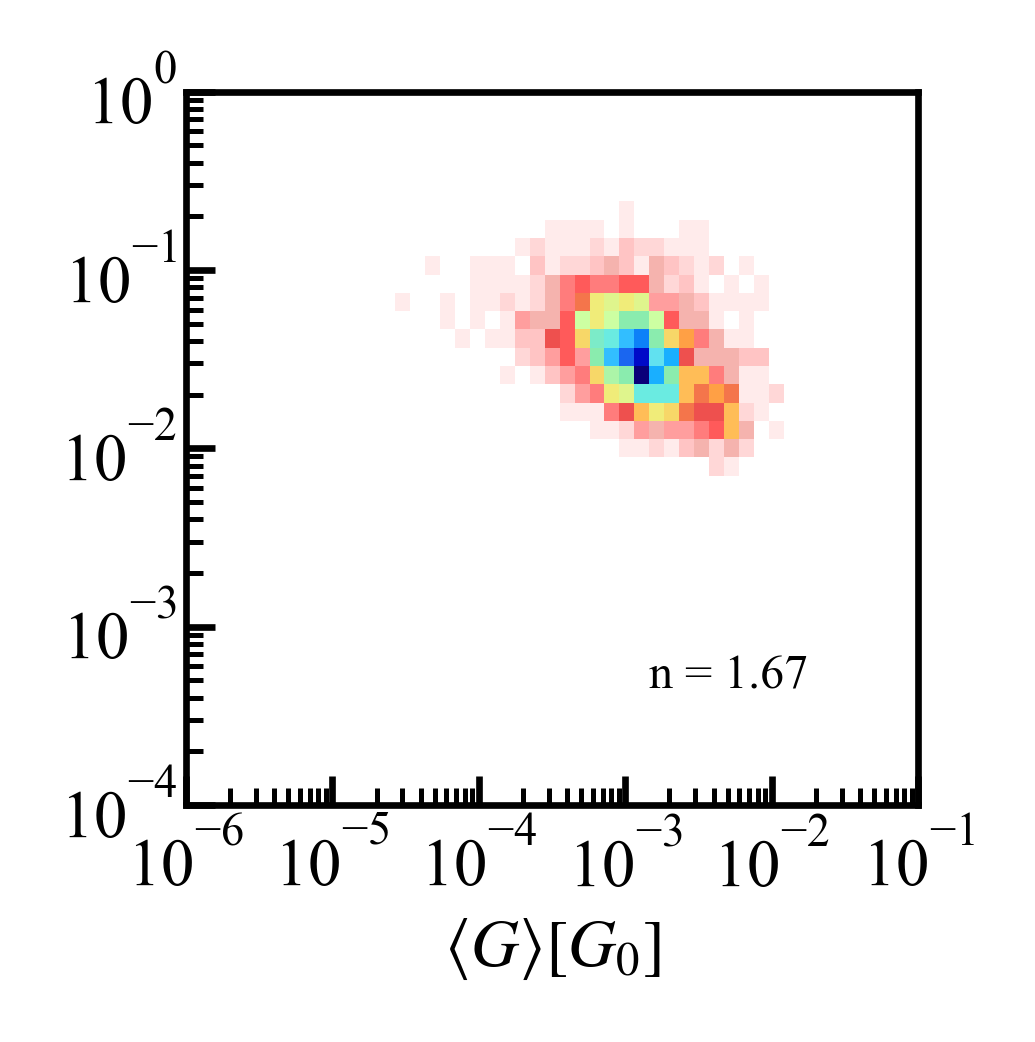

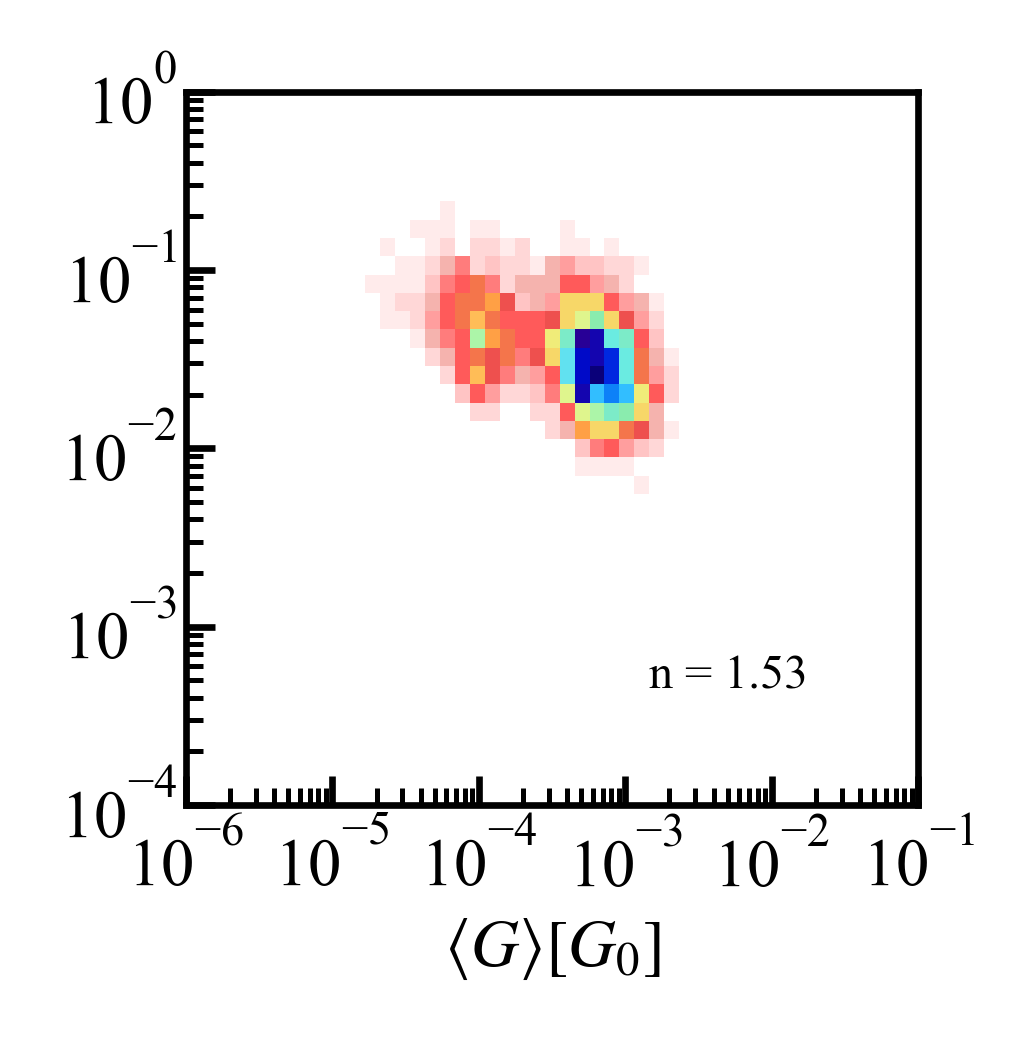

In [94]:
plot_correlation(n = N, correlation = pull_corr, lw=0.5, c='blue')
plot_correlation(n = N, correlation = push_corr, lw=0.5, c='red')

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_pull['avg_cond_on_step_2'][filt_inds_pull]),
                        noise_power=np.array(noise_stat_pull['conductance_noise_2'][filt_inds_pull]),
                        n = np.mean((N[pull_corr<0][0], N[pull_corr>0][-1])),
                        xrange=(1e-6, 0.1),
                        yrange=(1e-4, 1),
                        num_bins=(10, 10),
                        shift=-4,
                        cmap=hist_1.cmap_geo32)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_push['avg_cond_on_step_2'][filt_inds_push]),
                        noise_power=np.array(noise_stat_push['conductance_noise_2'][filt_inds_push]),
                        n = np.mean((N[pull_corr<0][0], N[push_corr>0][-1])),
                        xrange=(1e-6, 0.1),
                        yrange=(1e-4, 1),
                        num_bins=(10, 10),
                        shift=-4,
                        cmap=hist_1.cmap_geo32)

## No filter

In [90]:
N = np.linspace(0.8, 2.2, num=1000)
pull_corr = np.zeros_like(N)
push_corr = np.zeros_like(N)
for i, n in enumerate(N):
    pull_corr[i] = utils.calc_correlation(np.log10(noise_stat_pull['noise_power_2']/ \
                                                   noise_stat_pull['avg_cond_on_step_2']**n),
                                          np.log10(noise_stat_pull['avg_cond_on_step_2']))
    push_corr[i] = utils.calc_correlation(np.log10(noise_stat_push['noise_power_2']/ \
                                                   noise_stat_push['avg_cond_on_step_2']**n),
                                          np.log10(noise_stat_push['avg_cond_on_step_2']))

D:\Greta\mcbj_stm-bj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='$\\langle G \\rangle [G_0]$'>

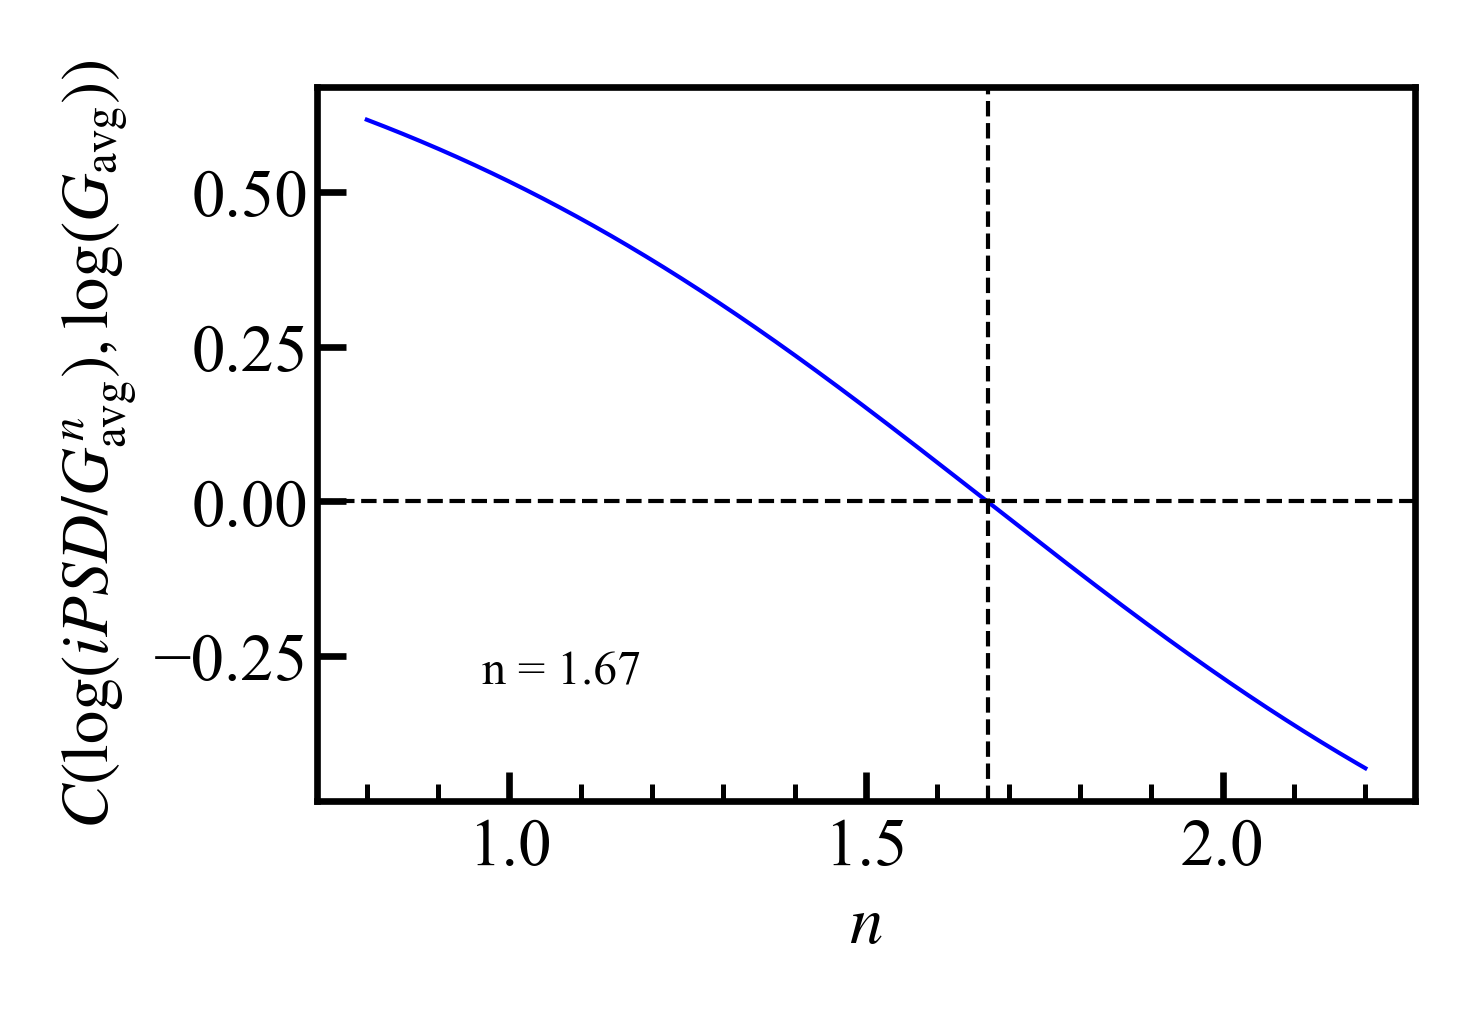

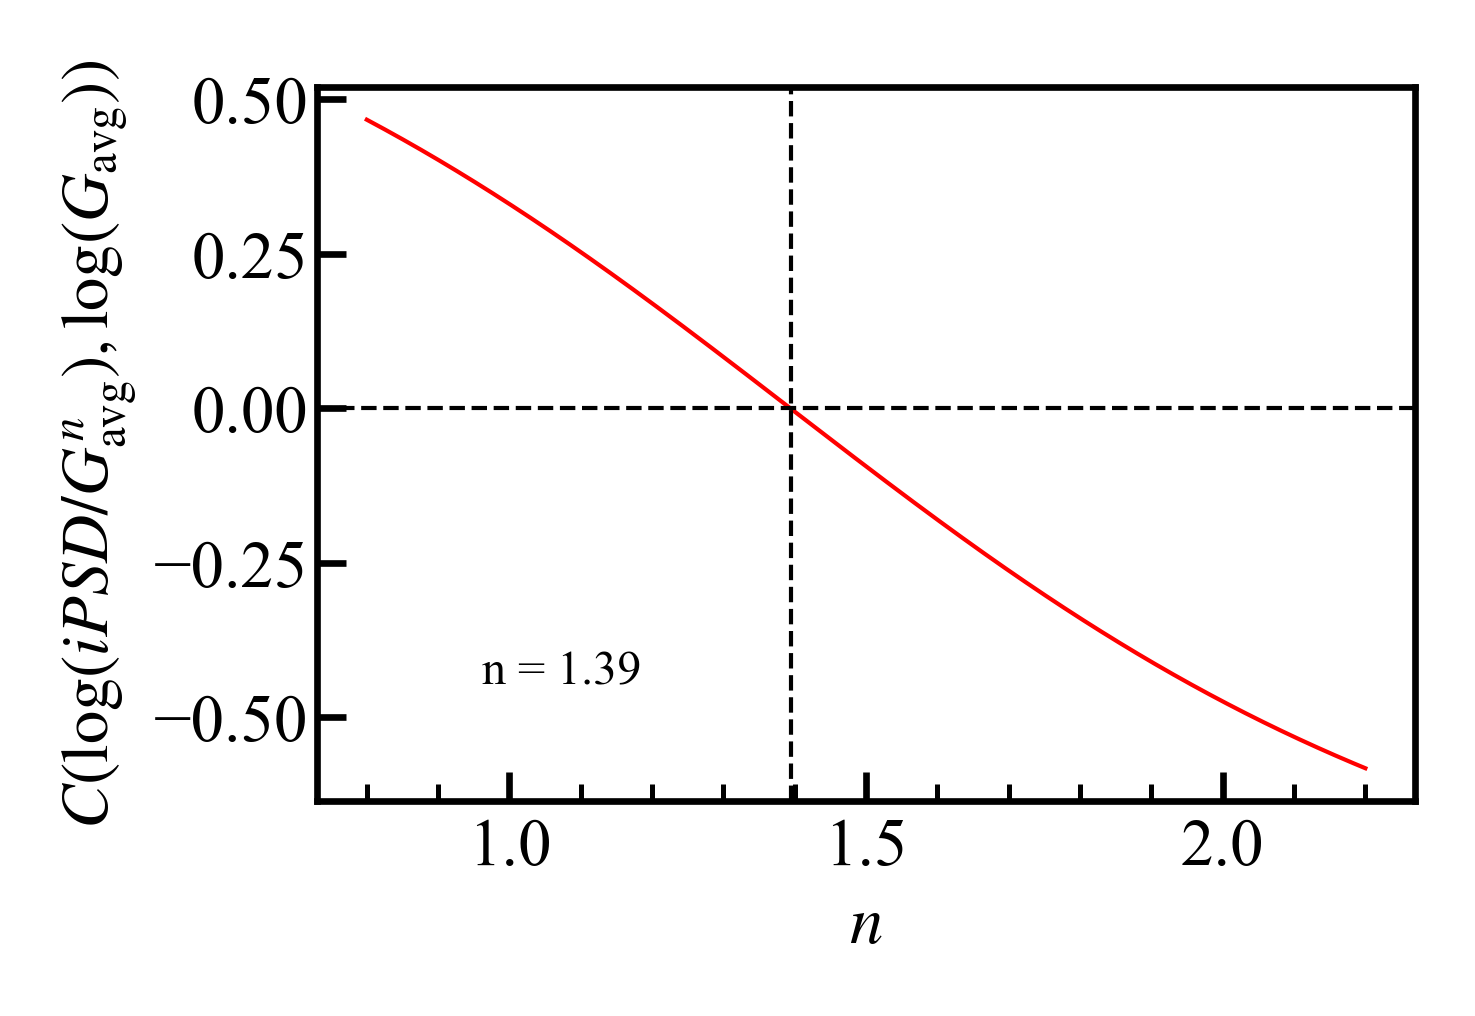

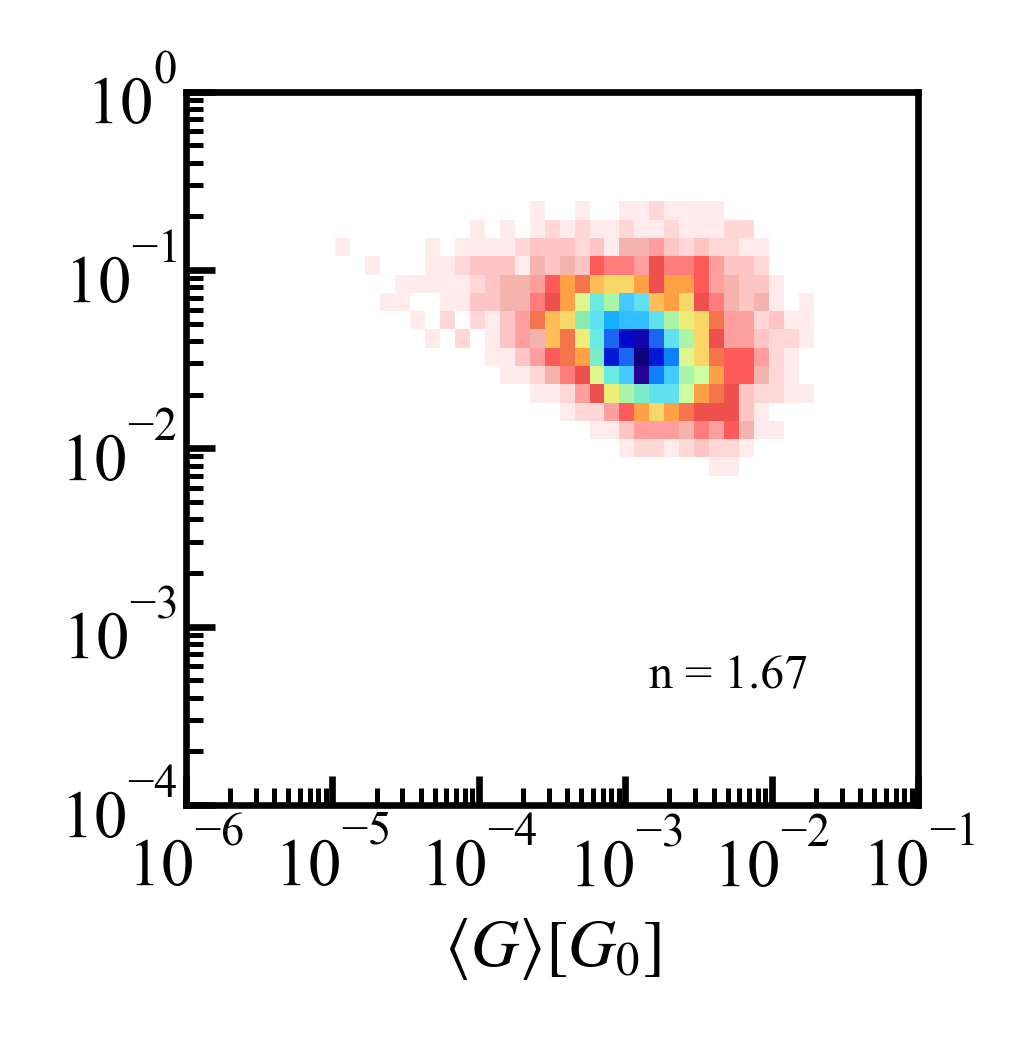

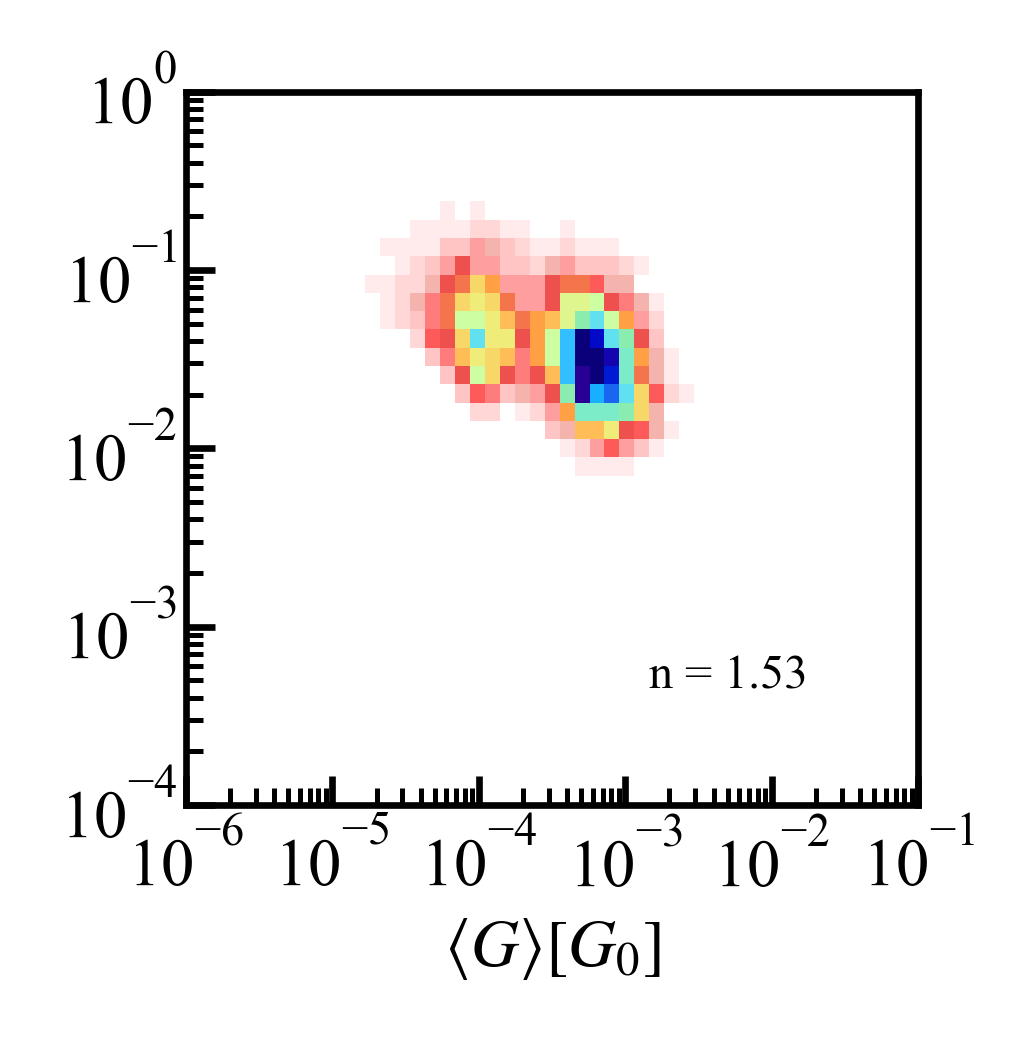

In [93]:
plot_correlation(n = N, correlation = pull_corr, lw=0.5, c='blue')
plot_correlation(n = N, correlation = push_corr, lw=0.5, c='red')

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_pull['avg_cond_on_step_2']),
                        noise_power=np.array(noise_stat_pull['conductance_noise_2']),
                        n = np.mean((N[pull_corr<0][0], N[pull_corr>0][-1])),
                        xrange=(1e-6, 0.1),
                        yrange=(1e-4, 1),
                        num_bins=(10, 10),
                        shift=-4,
                        cmap=hist_1.cmap_geo32)

plot_noise_power_2dhist(conductance_avgs=np.array(noise_stat_push['avg_cond_on_step_2']),
                        noise_power=np.array(noise_stat_push['conductance_noise_2']),
                        n = np.mean((N[pull_corr<0][0], N[push_corr>0][-1])),
                        xrange=(1e-6, 0.1),
                        yrange=(1e-4, 1),
                        num_bins=(10, 10),
                        shift=-4,
                        cmap=hist_1.cmap_geo32)